In [1]:
import warnings
warnings.filterwarnings("ignore")

from sklearn import set_config
set_config(transform_output="pandas")

import pandas as pd


import matplotlib.pyplot as plt
import seaborn as sns

import matplotlib.ticker as ticker

import numpy as np

from sklearn.preprocessing import StandardScaler
from sklearn.feature_selection import SelectKBest, f_regression
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix,accuracy_score

In [2]:
# veri seti yükleme
energy_data = pd.read_csv("energydata_complete.csv")

In [3]:
# veri setine ait ilk 5 kayıt
energy_data.head()

date  Appliances  lights     T1       RH_1    T2       RH_2  \
0  2016-01-11 17:00:00          60      30  19.89  47.596667  19.2  44.790000   
1  2016-01-11 17:10:00          60      30  19.89  46.693333  19.2  44.722500   
2  2016-01-11 17:20:00          50      30  19.89  46.300000  19.2  44.626667   
3  2016-01-11 17:30:00          50      40  19.89  46.066667  19.2  44.590000   
4  2016-01-11 17:40:00          60      40  19.89  46.333333  19.2  44.530000   

      T3       RH_3         T4  ...         T9   RH_9     T_out  Press_mm_hg  \
0  19.79  44.730000  19.000000  ...  17.033333  45.53  6.600000        733.5   
1  19.79  44.790000  19.000000  ...  17.066667  45.56  6.483333        733.6   
2  19.79  44.933333  18.926667  ...  17.000000  45.50  6.366667        733.7   
3  19.79  45.000000  18.890000  ...  17.000000  45.40  6.250000        733.8   
4  19.79  45.000000  18.890000  ...  17.000000  45.40  6.133333        733.9   

   RH_out  Windspeed  Visibility  Tdewpoint        rv1        rv2  
0    92.0   7.000000   63.000000        5.3  13.275433  13.275433  
1    92.0   6.666667   59.166667        5.2  18.606195  18.606195  
2    92.0   6.333333   55.333333        5.1  28.642668  28.642668  
3    92.0   6.000000   51.500000        5.0  45.410389  45.410389  
4    92.0   5.666667   47.666667        4.9  10.084097  10.084097  

[5 rows x 29 columns]

In [4]:
# veri setinin boyutları
energy_data.shape

(19735, 29)

In [5]:
# veri setindeki değişkenler
energy_data.columns

Index(['date', 'Appliances', 'lights', 'T1', 'RH_1', 'T2', 'RH_2', 'T3',
       'RH_3', 'T4', 'RH_4', 'T5', 'RH_5', 'T6', 'RH_6', 'T7', 'RH_7', 'T8',
       'RH_8', 'T9', 'RH_9', 'T_out', 'Press_mm_hg', 'RH_out', 'Windspeed',
       'Visibility', 'Tdewpoint', 'rv1', 'rv2'],
      dtype='object')

Veri Setindeki Değişkenlerin Açıklamaları

| No | **Sıcaklık Değişkenleri (°C)**                      | **Nem Değişkenleri (%)**                        | **Hava Durumu ve Ortam Koşulları**      | **Zaman Değişkenleri**         | **Diğer Değişkenler**       | **Hedef Değişken**                                        |
| -- | --------------------------------------------------- | ----------------------------------------------- | --------------------------------------- | ------------------------------ | --------------------------- | --------------------------------------------------------- |
| 1  | `T1` – Mutfak sıcaklığı                             | `RH_1` – Mutfak nemi                            | `Windspeed` – Rüzgar hızı (m/s)         | `date` – Tarih ve saat bilgisi | `rv1` – Rastgele değişken 1 | `Appliances` – Elektrikli cihazların enerji tüketimi (Wh) |
| 2  | `T2` – Oturma odası sıcaklığı                       | `RH_2` – Oturma odası nemi                      | `Visibility` – Görüş mesafesi (km)      |                                | `rv2` – Rastgele değişken 2 |                                                           |
| 3  | `T3` – Çamaşır odası sıcaklığı                      | `RH_3` – Çamaşır odası nemi                     | `Press_mm_hg` – Atmosfer basıncı (mmHg) |                                |                             |                                                           |
| 4  | `T4` – Ofis odası sıcaklığı                         | `RH_4` – Ofis odası nemi                        | `lights` – Işık tüketimi (Wh)           |                                |                             |                                                           |
| 5  | `T5` – Banyo sıcaklığı                              | `RH_5` – Banyo nemi                             |                                         |                                |                             |                                                           |
| 6  | `T6` – Dış ortam sıcaklığı (kuzey cephesi)          | `RH_6` – Dış ortam nemi (kuzey cephesi)         |                                         |                                |                             |                                                           |
| 7  | `T7` – Ütü odası sıcaklığı                          | `RH_7` – Ütü odası nemi                         |                                         |                                |                             |                                                           |
| 8  | `T8` – Genç odası 2 sıcaklığı                       | `RH_8` – Genç odası 2 nemi                      |                                         |                                |                             |                                                           |
| 9  | `T9` – Ebeveyn yatak odası sıcaklığı                | `RH_9` – Ebeveyn yatak odası nemi               |                                         |                                |                             |                                                           |
| 10 | `T_out` – Genel dış hava sıcaklığı (hava istasyonu) | `RH_out` – Genel dış hava nemi (hava istasyonu) |                                         |                                |                             |                                                           |
| 11 | `Tdewpoint` – Çiy noktası sıcaklığı                 |                                                 |                                         |                                |                             |                                                           |


In [6]:
energy_data.describe()

Appliances        lights            T1          RH_1            T2  \
count  19735.000000  19735.000000  19735.000000  19735.000000  19735.000000   
mean      97.694958      3.801875     21.686571     40.259739     20.341219   
std      102.524891      7.935988      1.606066      3.979299      2.192974   
min       10.000000      0.000000     16.790000     27.023333     16.100000   
25%       50.000000      0.000000     20.760000     37.333333     18.790000   
50%       60.000000      0.000000     21.600000     39.656667     20.000000   
75%      100.000000      0.000000     22.600000     43.066667     21.500000   
max     1080.000000     70.000000     26.260000     63.360000     29.856667   

               RH_2            T3          RH_3            T4          RH_4  \
count  19735.000000  19735.000000  19735.000000  19735.000000  19735.000000   
mean      40.420420     22.267611     39.242500     20.855335     39.026904   
std        4.069813      2.006111      3.254576      2.042884      4.341321   
min       20.463333     17.200000     28.766667     15.100000     27.660000   
25%       37.900000     20.790000     36.900000     19.530000     35.530000   
50%       40.500000     22.100000     38.530000     20.666667     38.400000   
75%       43.260000     23.290000     41.760000     22.100000     42.156667   
max       56.026667     29.236000     50.163333     26.200000     51.090000   

       ...            T9          RH_9         T_out   Press_mm_hg  \
count  ...  19735.000000  19735.000000  19735.000000  19735.000000   
mean   ...     19.485828     41.552401      7.411665    755.522602   
std    ...      2.014712      4.151497      5.317409      7.399441   
min    ...     14.890000     29.166667     -5.000000    729.300000   
25%    ...     18.000000     38.500000      3.666667    750.933333   
50%    ...     19.390000     40.900000      6.916667    756.100000   
75%    ...     20.600000     44.338095     10.408333    760.933333   
max    ...     24.500000     53.326667     26.100000    772.300000   

             RH_out     Windspeed    Visibility     Tdewpoint           rv1  \
count  19735.000000  19735.000000  19735.000000  19735.000000  19735.000000   
mean      79.750418      4.039752     38.330834      3.760707     24.988033   
std       14.901088      2.451221     11.794719      4.194648     14.496634   
min       24.000000      0.000000      1.000000     -6.600000      0.005322   
25%       70.333333      2.000000     29.000000      0.900000     12.497889   
50%       83.666667      3.666667     40.000000      3.433333     24.897653   
75%       91.666667      5.500000     40.000000      6.566667     37.583769   
max      100.000000     14.000000     66.000000     15.500000     49.996530   

                rv2  
count  19735.000000  
mean      24.988033  
std       14.496634  
min        0.005322  
25%       12.497889  
50%       24.897653  
75%       37.583769  
max       49.996530  

[8 rows x 28 columns]

In [7]:
energy_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19735 entries, 0 to 19734
Data columns (total 29 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   date         19735 non-null  object 
 1   Appliances   19735 non-null  int64  
 2   lights       19735 non-null  int64  
 3   T1           19735 non-null  float64
 4   RH_1         19735 non-null  float64
 5   T2           19735 non-null  float64
 6   RH_2         19735 non-null  float64
 7   T3           19735 non-null  float64
 8   RH_3         19735 non-null  float64
 9   T4           19735 non-null  float64
 10  RH_4         19735 non-null  float64
 11  T5           19735 non-null  float64
 12  RH_5         19735 non-null  float64
 13  T6           19735 non-null  float64
 14  RH_6         19735 non-null  float64
 15  T7           19735 non-null  float64
 16  RH_7         19735 non-null  float64
 17  T8           19735 non-null  float64
 18  RH_8         19735 non-null  float64
 19  T9  

In [8]:
# eksik değer kontrolü
energy_data.isnull().sum()

date           0
Appliances     0
lights         0
T1             0
RH_1           0
T2             0
RH_2           0
T3             0
RH_3           0
T4             0
RH_4           0
T5             0
RH_5           0
T6             0
RH_6           0
T7             0
RH_7           0
T8             0
RH_8           0
T9             0
RH_9           0
T_out          0
Press_mm_hg    0
RH_out         0
Windspeed      0
Visibility     0
Tdewpoint      0
rv1            0
rv2            0
dtype: int64

In [9]:
# tekrarlayan satır kontrolü
energy_data[energy_data.duplicated()]

Empty DataFrame
Columns: [date, Appliances, lights, T1, RH_1, T2, RH_2, T3, RH_3, T4, RH_4, T5, RH_5, T6, RH_6, T7, RH_7, T8, RH_8, T9, RH_9, T_out, Press_mm_hg, RH_out, Windspeed, Visibility, Tdewpoint, rv1, rv2]
Index: []

[0 rows x 29 columns]

In [10]:
# date sütununu ileride yapılacak analizler için datetime formatına çevirme
energy_data["date"] = pd.to_datetime(energy_data["date"])
energy_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19735 entries, 0 to 19734
Data columns (total 29 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   date         19735 non-null  datetime64[ns]
 1   Appliances   19735 non-null  int64         
 2   lights       19735 non-null  int64         
 3   T1           19735 non-null  float64       
 4   RH_1         19735 non-null  float64       
 5   T2           19735 non-null  float64       
 6   RH_2         19735 non-null  float64       
 7   T3           19735 non-null  float64       
 8   RH_3         19735 non-null  float64       
 9   T4           19735 non-null  float64       
 10  RH_4         19735 non-null  float64       
 11  T5           19735 non-null  float64       
 12  RH_5         19735 non-null  float64       
 13  T6           19735 non-null  float64       
 14  RH_6         19735 non-null  float64       
 15  T7           19735 non-null  float64       
 16  RH_7

In [11]:
# verileri trai/val/test için bölmeden önce tarihe göre sıralama
energy_data.sort_values("date", ascending=True, inplace=True)
energy_data

date  Appliances  lights         T1       RH_1  \
0     2016-01-11 17:00:00          60      30  19.890000  47.596667   
1     2016-01-11 17:10:00          60      30  19.890000  46.693333   
2     2016-01-11 17:20:00          50      30  19.890000  46.300000   
3     2016-01-11 17:30:00          50      40  19.890000  46.066667   
4     2016-01-11 17:40:00          60      40  19.890000  46.333333   
...                   ...         ...     ...        ...        ...   
19730 2016-05-27 17:20:00         100       0  25.566667  46.560000   
19731 2016-05-27 17:30:00          90       0  25.500000  46.500000   
19732 2016-05-27 17:40:00         270      10  25.500000  46.596667   
19733 2016-05-27 17:50:00         420      10  25.500000  46.990000   
19734 2016-05-27 18:00:00         430      10  25.500000  46.600000   

              T2       RH_2         T3       RH_3         T4  ...         T9  \
0      19.200000  44.790000  19.790000  44.730000  19.000000  ...  17.033333   
1      19.200000  44.722500  19.790000  44.790000  19.000000  ...  17.066667   
2      19.200000  44.626667  19.790000  44.933333  18.926667  ...  17.000000   
3      19.200000  44.590000  19.790000  45.000000  18.890000  ...  17.000000   
4      19.200000  44.530000  19.790000  45.000000  18.890000  ...  17.000000   
...          ...        ...        ...        ...        ...  ...        ...   
19730  25.890000  42.025714  27.200000  41.163333  24.700000  ...  23.200000   
19731  25.754000  42.080000  27.133333  41.223333  24.700000  ...  23.200000   
19732  25.628571  42.768571  27.050000  41.690000  24.700000  ...  23.200000   
19733  25.414000  43.036000  26.890000  41.290000  24.700000  ...  23.200000   
19734  25.264286  42.971429  26.823333  41.156667  24.700000  ...  23.200000   

          RH_9      T_out  Press_mm_hg     RH_out  Windspeed  Visibility  \
0      45.5300   6.600000        733.5  92.000000   7.000000   63.000000   
1      45.5600   6.483333        733.6  92.000000   6.666667   59.166667   
2      45.5000   6.366667        733.7  92.000000   6.333333   55.333333   
3      45.4000   6.250000        733.8  92.000000   6.000000   51.500000   
4      45.4000   6.133333        733.9  92.000000   5.666667   47.666667   
...        ...        ...          ...        ...        ...         ...   
19730  46.7900  22.733333        755.2  55.666667   3.333333   23.666667   
19731  46.7900  22.600000        755.2  56.000000   3.500000   24.500000   
19732  46.7900  22.466667        755.2  56.333333   3.666667   25.333333   
19733  46.8175  22.333333        755.2  56.666667   3.833333   26.166667   
19734  46.8450  22.200000        755.2  57.000000   4.000000   27.000000   

       Tdewpoint        rv1        rv2  
0       5.300000  13.275433  13.275433  
1       5.200000  18.606195  18.606195  
2       5.100000  28.642668  28.642668  
3       5.000000  45.410389  45.410389  
4       4.900000  10.084097  10.084097  
...          ...        ...        ...  
19730  13.333333  43.096812  43.096812  
19731  13.300000  49.282940  49.282940  
19732  13.266667  29.199117  29.199117  
19733  13.233333   6.322784   6.322784  
19734  13.200000  34.118851  34.118851  

[19735 rows x 29 columns]

In [12]:
# Keşifsel veri analizi yapmadan önce verinin ayrılması

# Modelin eğitim sonunda gelecekteki tüketim davranışlarını doğru bir şekilde tahmin edebilmesi için eğitimde geçmiş döneme ait verilerin kullanılması gerekmektedir. 
# Çünkü gerçek hayatta bir model de geçmişe bakarak gelecek veriyi tahmin etmeye çalışır. Bu yüzden eğitim/validasyon/test ayrımında 
# eski, orta dönem ve yeni veriler kullanılarak zaman bütünlüğü korunmalıdır. Bu sayede gelecekteki verilerin geçmişteki verilere sızmasına (data leakage) 
# ve dolayısıyla modelin hatalı değerlendirme yapmasının önüne geçilmiş olunur.


# Veri uzunluğu
total_len = len(energy_data)

# Eğitim seti: %70
train_end = int(0.7 * total_len)

# Doğrulama seti: kalan %30’un yarısı
val_end = train_end + int((total_len-train_end)*0.5)

# Veriler sıralı olduğu için doğrudan indeksleme ile ayırılabilir
train_df = energy_data.iloc[:train_end]
val_df = energy_data.iloc[train_end:val_end]
test_df = energy_data.iloc[val_end:]

print(f"Train veri seti boyutları: {train_df.shape}")
print(f"Val veri seti boyutları: {val_df.shape}")
print(f"Test veri seti boyutları: {test_df.shape}")

Train veri seti boyutları: (13814, 29)
Val veri seti boyutları: (2960, 29)
Test veri seti boyutları: (2961, 29)


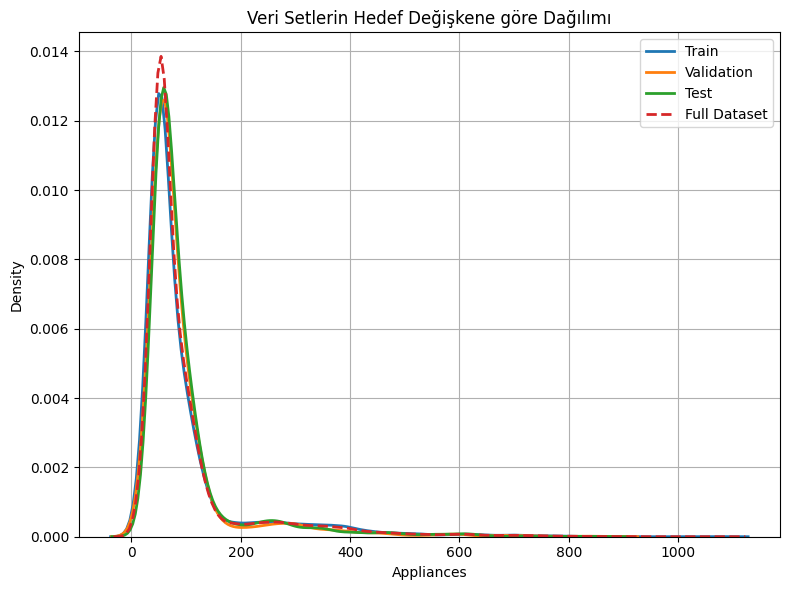

In [13]:
plt.figure(figsize=(8, 6))
sns.kdeplot(data=train_df['Appliances'], label='Train', linewidth=2)
sns.kdeplot(data=val_df['Appliances'], label='Validation', linewidth=2)
sns.kdeplot(data=test_df['Appliances'], label='Test', linewidth=2)
sns.kdeplot(data=energy_data['Appliances'], label='Full Dataset', linestyle='--', linewidth=2)
plt.title('Veri Setlerin Hedef Değişkene göre Dağılımı')
plt.xlabel('Appliances')
plt.ylabel('Density')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

Bölme işlemi sonrası tüm veri setler yoğunluk açısından büyük oranda örtüşmektedir. Tüm veri setlerin benzer dağılıma sahip olması, modelin öğrenme ve test süreçlerinde tutarlılık sağlar.

In [14]:
# Temel istatistikler
full_stats = energy_data['Appliances'].describe()
train_stats = train_df['Appliances'].describe()
val_stats = val_df['Appliances'].describe()
test_stats = test_df['Appliances'].describe()

# Hepsini tek bir DataFrame'de gösterme
summary_df = pd.DataFrame({
    'Tüm Veri Seti': full_stats,
    'Train Veri Seti': train_stats,
    'Validation Veri Seti': val_stats,
    'Test Veri Seti': test_stats
})

print(summary_df)

       Tüm Veri Seti  Train Veri Seti  Validation Veri Seti  Test Veri Seti
count   19735.000000     13814.000000           2960.000000     2961.000000
mean       97.694958        98.775156             93.422297       96.926714
std       102.524891       106.857292             92.254684       90.888693
min        10.000000        10.000000             20.000000       20.000000
25%        50.000000        50.000000             50.000000       50.000000
50%        60.000000        60.000000             60.000000       60.000000
75%       100.000000       100.000000            100.000000      100.000000
max      1080.000000      1080.000000            870.000000      850.000000


Ortalama ve medyan değerleri birbirine çok yakın olduğundan merkezi eğilim korunmuştur. Standar sapmaların farklı olması ise veri sayısının farklılığından kaynaklanmaktadır. Genel olarak temel istatistikler büyük oranda tutarlıdır.

## Zamansal Analiz

In [15]:
def to_datetime(df):
    df = df.copy()
    df["hour"] = pd.to_datetime(df["date"]).dt.hour
    df["day"] = pd.to_datetime(df["date"]).dt.day
    df["weekday"] = pd.to_datetime(df["date"]).dt.weekday
    df["month"] = pd.to_datetime(df["date"]).dt.month
    return df

In [16]:
datasets = [train_df, val_df, test_df]
labels = ["Train", "Validation", "Test"]
colors = ["blue", "orange", "green"]

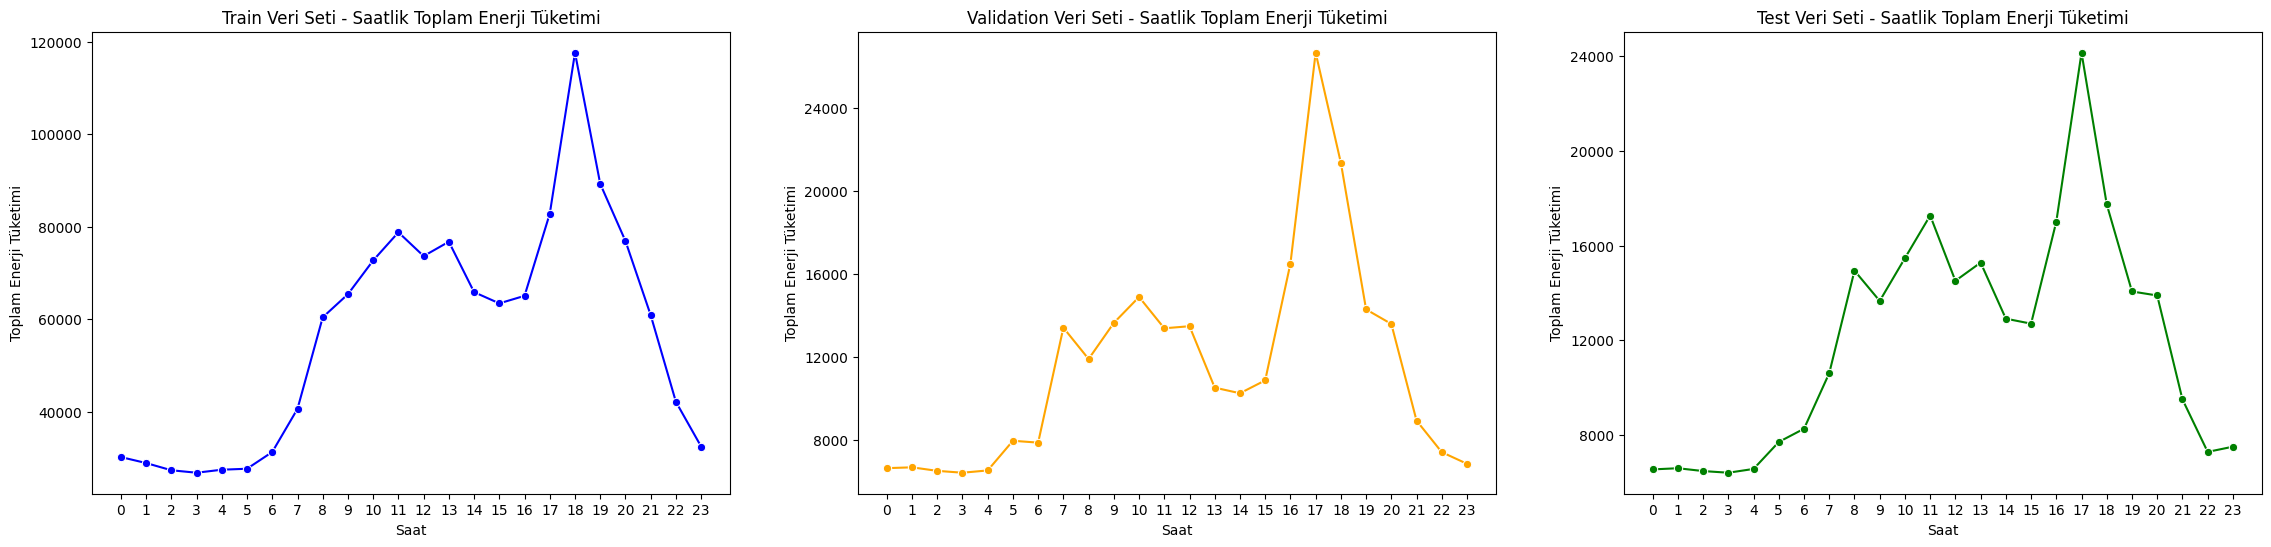

In [17]:
# Saatlik tüketim çizgi grafiği
fig, axs = plt.subplots(1, 3, figsize=(28, 6))
for i, (df, label, color) in enumerate(zip(datasets, labels, colors)):
    df = to_datetime(df)
    hours = df.groupby("hour", as_index=False)["Appliances"].sum()
    x_vals = hours.index  
    xticklabels = hours["hour"]
    sns.lineplot(x=x_vals, y=hours["Appliances"], ax=axs[i], marker="o", color=color, label=label)
    axs[i].set_title(f"{label} Veri Seti - Saatlik Toplam Enerji Tüketimi")
    axs[i].set_xlabel("Saat")
    axs[i].set_ylabel("Toplam Enerji Tüketimi")
    axs[i].set_xticks(x_vals)
    axs[i].set_xticklabels(xticklabels)
    axs[i].yaxis.set_major_locator(ticker.MaxNLocator(nbins=6, integer=True))
    axs[i].get_legend().remove()
plt.show()

Train, Validation ve Test veri setlerine ait toplam saatlik enerji tüketimlerine ait bu grafikler incelendiğinde genel olarak saat 22:00 ile 06:00 arası eneji tüketiminin en az olduğu zaman dilimi, saat 15:00 ile 19:00 arası emerji tüketiminin en yoğun olduğu dönem olarak gözükmektedir. Günün orta saatlerinde ise dengeli bir kullanım göze çarpmaktadır. Bu veriler normal bir ev yaşam döngüsündeki saatlik enerji tüketimini yansıtmaktadır. Çünkü tüm veri setlerinde enerji tüketimi sabah saatlerinde artmaya başlayıp akşam saatlerinde zirve yapmakta, gece ise tekrar düşmektedir. Bu nedenle bu desen tipik bir ev yaşam döngüsünü yansıtmaktadır.

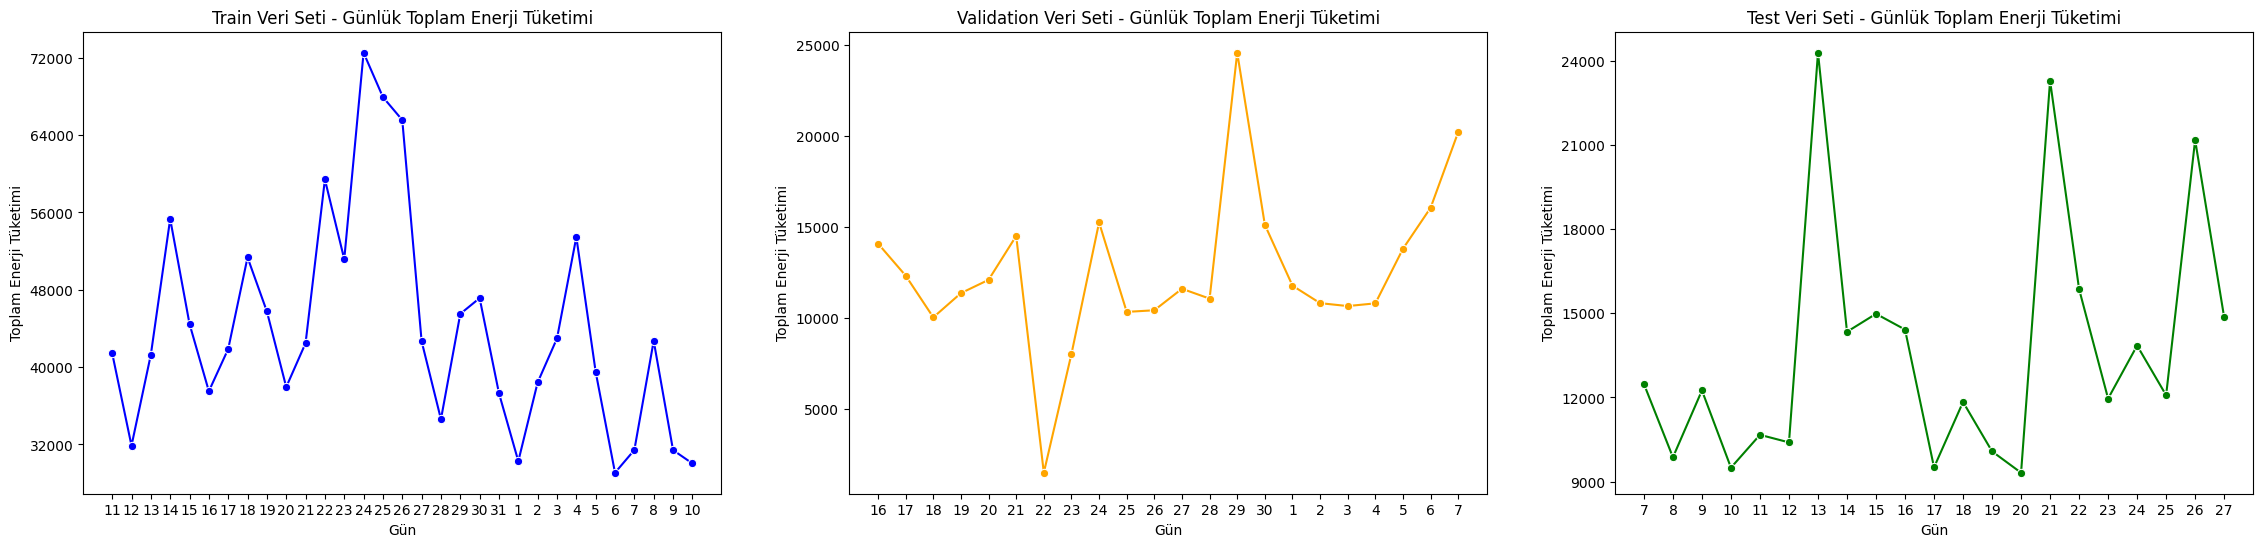

In [18]:
# Günlük tüketim çizgi grafiği
fig, axs = plt.subplots(1, 3, figsize=(28, 6))
for i, (df, label, color) in enumerate(zip(datasets, labels, colors)):
    df = to_datetime(df)
    days = df.groupby("day", as_index=False)["Appliances"].sum()
    custom_order = list(dict.fromkeys(df["day"].values))  
    days["day"] = pd.Categorical(days["day"], categories=custom_order, ordered=True)
    df_sorted = days.sort_values("day").reset_index(drop=True)
    x_vals = df_sorted.index  
    xticklabels = df_sorted["day"]
    sns.lineplot(x=x_vals, y=days["Appliances"], ax=axs[i], marker="o", color=color, label=label)
    axs[i].set_title(f"{label} Veri Seti - Günlük Toplam Enerji Tüketimi")
    axs[i].set_xlabel("Gün")
    axs[i].set_ylabel("Toplam Enerji Tüketimi")
    axs[i].set_xticks(x_vals)
    axs[i].set_xticklabels(xticklabels)
    axs[i].yaxis.set_major_locator(ticker.MaxNLocator(nbins=6, integer=True))
    axs[i].get_legend().remove()
plt.show()

Buradaki veriler incelendiğinde ise her üç veri seti özelinde de dalgalanmalar gözlemlenmektedir. Train veri setinde 24. gün civarında maksimum enerji tüketimi göze çarparken genel olarak 30000-70000 Wh arasında dalgalı bir enerji tüketimi vardır.  Validation ve Test veri setlerinde ise train veri setinden ayrı olarak belirgin şekilde enerji tüketiminde bir düşüş vardır. Maksimum enerji tüketimi her iki veri setinde de 25000 Wh civarında seyretmektedir. Bu değer train veri ise setinde 72000 Wh civarında görünmektedir. Ayrıca Validation veri setinde 22.günde önemli bir düşüş gözükmekte ve bu değer bir outlier olarak değerlendirilebilmektedir.

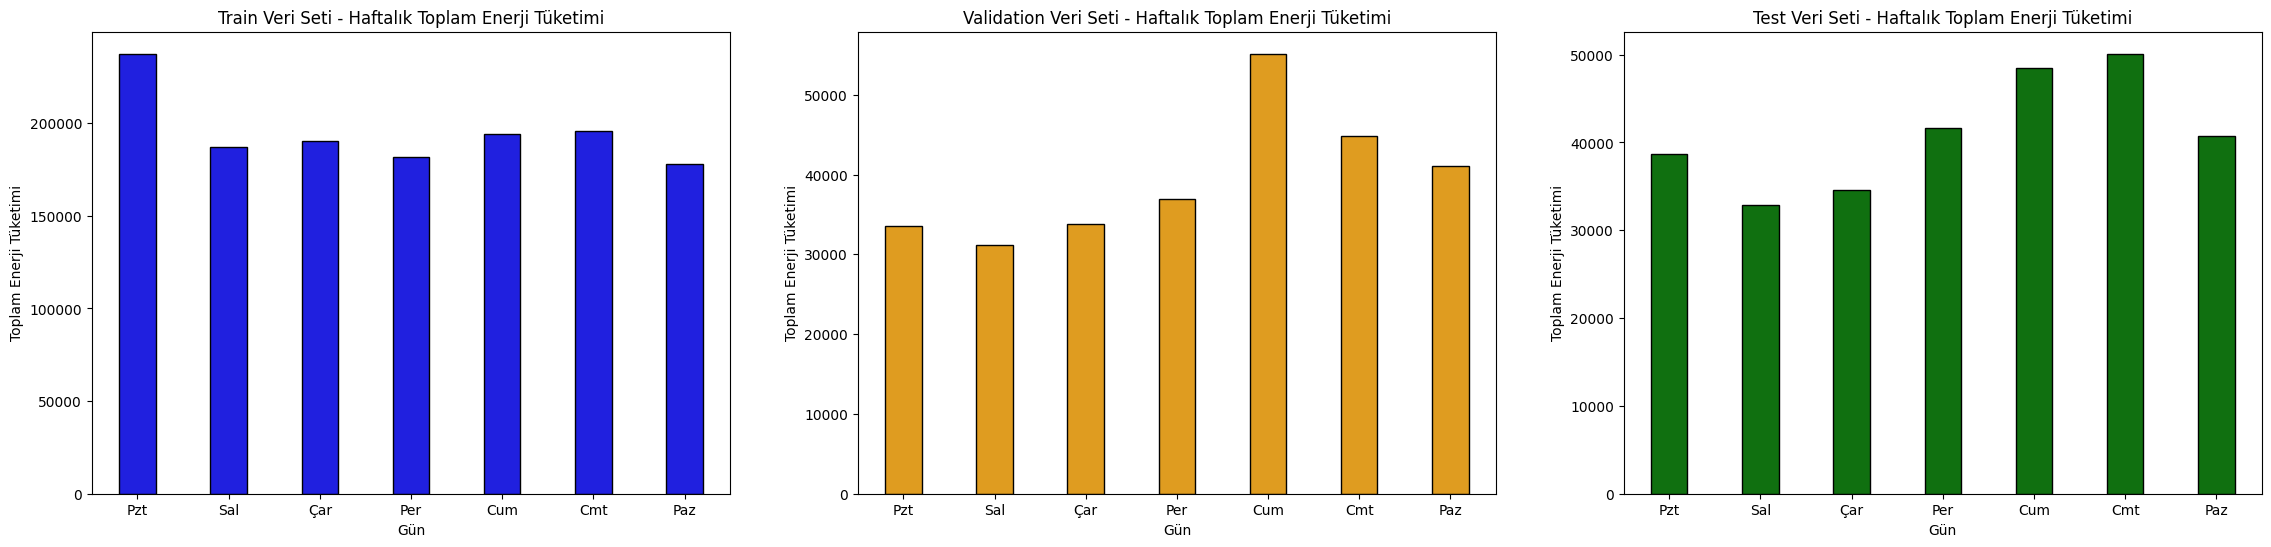

In [19]:
# Haftalık tüketim bar grafiği
fig, axs = plt.subplots(1, 3, figsize=(28, 6))
for i, (df, label, color) in enumerate(zip(datasets, labels, colors)):
    df = to_datetime(df)
    weekdays = df.groupby("weekday", as_index=False)["Appliances"].sum()
    x_vals = weekdays.index  
    xticklabels = ["Pzt", "Sal", "Çar", "Per", "Cum", "Cmt", "Paz"] 
    sns.barplot(x=x_vals, y=weekdays["Appliances"], ax=axs[i], color=color, width=0.4, label=label)
    for bar in axs[i].patches:
        bar.set_edgecolor("black")
    axs[i].set_title(f"{label} Veri Seti - Haftalık Toplam Enerji Tüketimi")
    axs[i].set_xlabel("Gün")
    axs[i].set_ylabel("Toplam Enerji Tüketimi")
    axs[i].set_xticks(x_vals)
    axs[i].set_xticklabels(xticklabels)
    axs[i].yaxis.set_major_locator(ticker.MaxNLocator(nbins=6, integer=True))
    axs[i].get_legend().remove()
plt.show()

Haftanın günlerini incelediğimizde ise train veri setinde haftanın pazartesi günü hariç dengeli bir tüketim gözükürken validation ve test veri setlerinde ise salı gününden itibaren toplam enerji tüketiminde bir artış görünmektedir. Ayrıca train setindeki haftanın pazartesi ve validation setindeki cuma gününde toplam enerji tüketiminde belirgin bir artış olması bu değerlerin outlier olma ihtimalini göstermektedir. Genel olarak ise validation ve test veri setinin dağılımı birbirine benzer davranış göstermektedir.

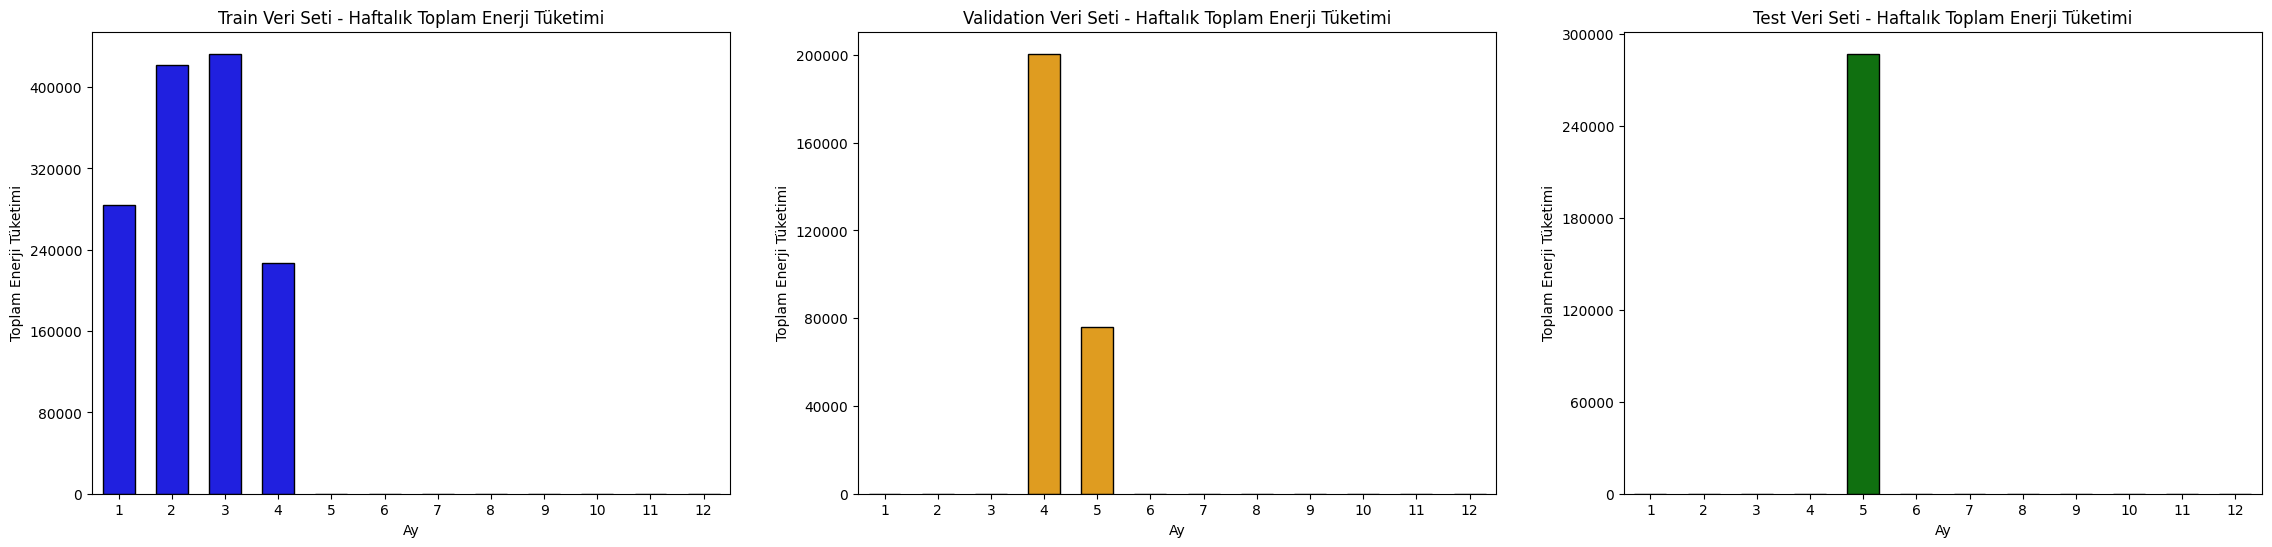

In [20]:
# Aylık tüketim bar grafiği
fig, axs = plt.subplots(1, 3, figsize=(28, 6))
for i, (df, label, color) in enumerate(zip(datasets, labels, colors)):
    df = to_datetime(df)
    months = df.groupby("month", as_index=False)["Appliances"].sum()
    full_months = pd.Series(range(1, 13))
    full_months = full_months.to_frame(name="month").merge(months, on="month", how="left").fillna(0)
    x_vals = full_months.index
    xticklabels = full_months["month"]
    sns.barplot(x=x_vals, y=full_months["Appliances"], ax=axs[i], color=color, width=0.6, label=label)
    for bar in axs[i].patches:
        bar.set_edgecolor("black")
    axs[i].set_title(f"{label} Veri Seti - Haftalık Toplam Enerji Tüketimi")
    axs[i].set_xlabel("Ay")
    axs[i].set_ylabel("Toplam Enerji Tüketimi")
    axs[i].set_xticks(x_vals)
    axs[i].set_xticklabels(xticklabels)
    axs[i].yaxis.set_major_locator(ticker.MaxNLocator(nbins=6, integer=True))
    axs[i].get_legend().remove()
plt.show()

Train veri seti daha fazla veri içerdiğinden daha anlamlı trendler görülmektedir. 2. ve 3. ayların yüksek olması, bu aylardaki mevsimlerde ısınma sistemleri nedeniyle daha fazla enerji tüketimi olduğu söylenebilir. Her üç grafikteki bilgileri birleştirirsek ise aslında 2., 3., 4. ve 5. aylarda yaklaşık 400000 Wh enerji tüketimi olarak birbirine yakın değerler gözükmektedir.

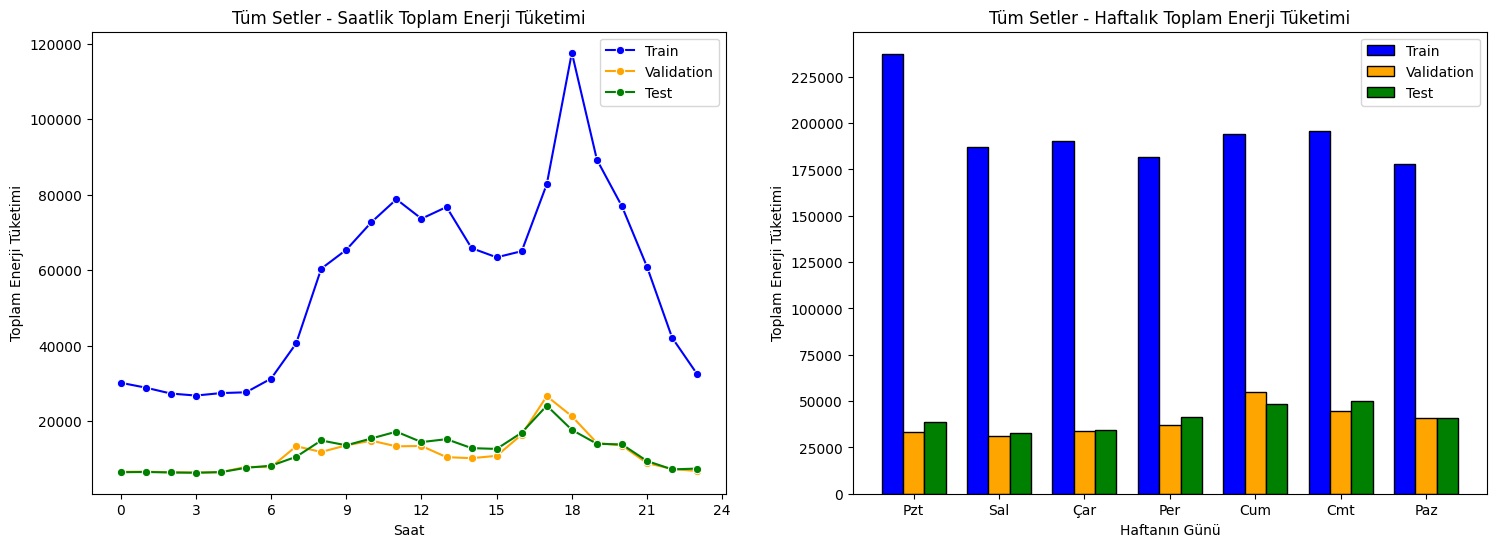

In [21]:
# Ortak saatlik ve haftalık grafik
fig, axs = plt.subplots(1, 2, figsize=(18, 6))
# ORTAK SAATLİK ÇİZGİ GRAFİĞİ
for df, label, color in zip(datasets, labels, colors):
    df_time = to_datetime(df)
    hours = df_time.groupby("hour", as_index=False)["Appliances"].sum()
    sns.lineplot(x=hours["hour"], y=hours["Appliances"], ax=axs[0], marker="o", label=label, color=color)

axs[0].set_title("Tüm Setler - Saatlik Toplam Enerji Tüketimi")
axs[0].set_xlabel("Saat")
axs[0].set_ylabel("Toplam Enerji Tüketimi")
axs[0].legend()
axs[0].xaxis.set_major_locator(ticker.MaxNLocator(integer=True))

# ORTAK HAFTANIN GÜNLERİ BAR GRAFİĞİ
width = 0.25
for i, (df, label, color) in enumerate(zip(datasets, labels, colors)):
    df_time = to_datetime(df)
    weekdays = df_time.groupby("weekday", as_index=False)["Appliances"].sum()
    x = weekdays["weekday"] + 1 + i * width
    axs[1].bar(x, weekdays["Appliances"], width=width, label=label, color=color, edgecolor="black")

axs[1].set_title("Tüm Setler - Haftalık Toplam Enerji Tüketimi")
axs[1].set_xlabel("Haftanın Günü")
axs[1].set_ylabel("Toplam Enerji Tüketimi")
axs[1].set_xticks([i + width for i in range(1, 8)])
axs[1].set_xticklabels(["Pzt", "Sal", "Çar", "Per", "Cum", "Cmt", "Paz"])
axs[1].legend()
axs[1].yaxis.set_major_locator(ticker.MaxNLocator(integer=True))
plt.show()

Buradaki veriler incelendiğinde ise her iki grafiktede de tüm veri setlerin davranışlarının benzer olduğu görülmektedir. Ancak train veri setindeki verilerin fazla olması nedeniyle bu veri setine ait değerler daha yüksek çıkmaktadır.

# ***Keşifsel Veri Analizi***

## Tek Değişkenli Analiz (Univariate Analysis)

In [23]:
numeric_cols = train_df.select_dtypes(["number"]).columns
numeric_cols

Index(['Appliances', 'lights', 'T1', 'RH_1', 'T2', 'RH_2', 'T3', 'RH_3', 'T4',
       'RH_4', 'T5', 'RH_5', 'T6', 'RH_6', 'T7', 'RH_7', 'T8', 'RH_8', 'T9',
       'RH_9', 'T_out', 'Press_mm_hg', 'RH_out', 'Windspeed', 'Visibility',
       'Tdewpoint', 'rv1', 'rv2'],
      dtype='object')

### Temel İstatistikler - Histogram + Yoğunluk - Boxplot

In [119]:
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = 'all'

In [130]:
def stats_table(datasets, labels, variable):
    rows = ["Ortalama", "Medyan", "Std Sapma", "Varyans", "Minimum", "Maksimum"]
    stat_values = []
    
    # Her bir veri kümesi (train, val, test) için istatistik hesaplama
    for df in datasets:
        stat_values.append([
            df[variable].mean(),
            df[variable].median(),
            df[variable].std(),
            df[variable].var(),
            df[variable].min(),
            df[variable].max()
        ])
    
    # Stat değerlerini dataframe'e çevir
    stats_df = pd.DataFrame(stat_values, columns=rows, index=labels).T
    
    # Columnları çoklu indeks olarak düzenle
    stats_df.columns = pd.MultiIndex.from_tuples([
        (f"{variable} Değişkeni İstatistik Özeti", label)
        for label in labels
    ])
    
    return stats_df

def hist_dens_plot(df, variable, label, color, ax=None):
    ax = ax or plt.gca()
    sns.histplot(df[variable], kde=True, bins=30, color=color, ax=ax)
    ax.set_title(f'{label} - {variable} Histogram + Yoğunluk Grafiği')
    ax.set_xlabel(variable)
    ax.set_ylabel('Frekans')
    ax.xaxis.set_major_locator(ticker.MaxNLocator(integer=True))

def boxplot(df, variable, label, color, ax=None):
    ax = ax or plt.gca()
    sns.boxplot(x=df[variable], color=color, ax=ax)
    ax.set_title(f'{label} - {variable} Boxplot Grafiği')
    ax.set_xlabel(variable)
    ax.set_ylabel('Değerler')
    ax.xaxis.set_major_locator(ticker.MaxNLocator(integer=True))

def univariate_variable_analysis(variable):
    fig, axs = plt.subplots(2, 3, figsize=(20,10))
    for i, (df, label, color) in enumerate(zip(datasets, labels, colors)):
        hist_dens_plot(df,variable,label, color,axs[0, i])
        boxplot(df,variable,label, color, axs[1, i])
    plt.tight_layout()
    plt.show()

#### Sıcaklık Değişkenleri

T1 Değişkeni İstatistik Özeti                      
                                  Train Validation       Test
Ortalama                      21.069756  22.013743  24.237147
Medyan                        21.200000  21.926667  24.290000
Std Sapma                      1.242105   0.962917   0.824672
Varyans                        1.542824   0.927208   0.680084
Minimum                       16.790000  20.000000  22.700000
Maksimum                      24.100000  24.890000  26.260000

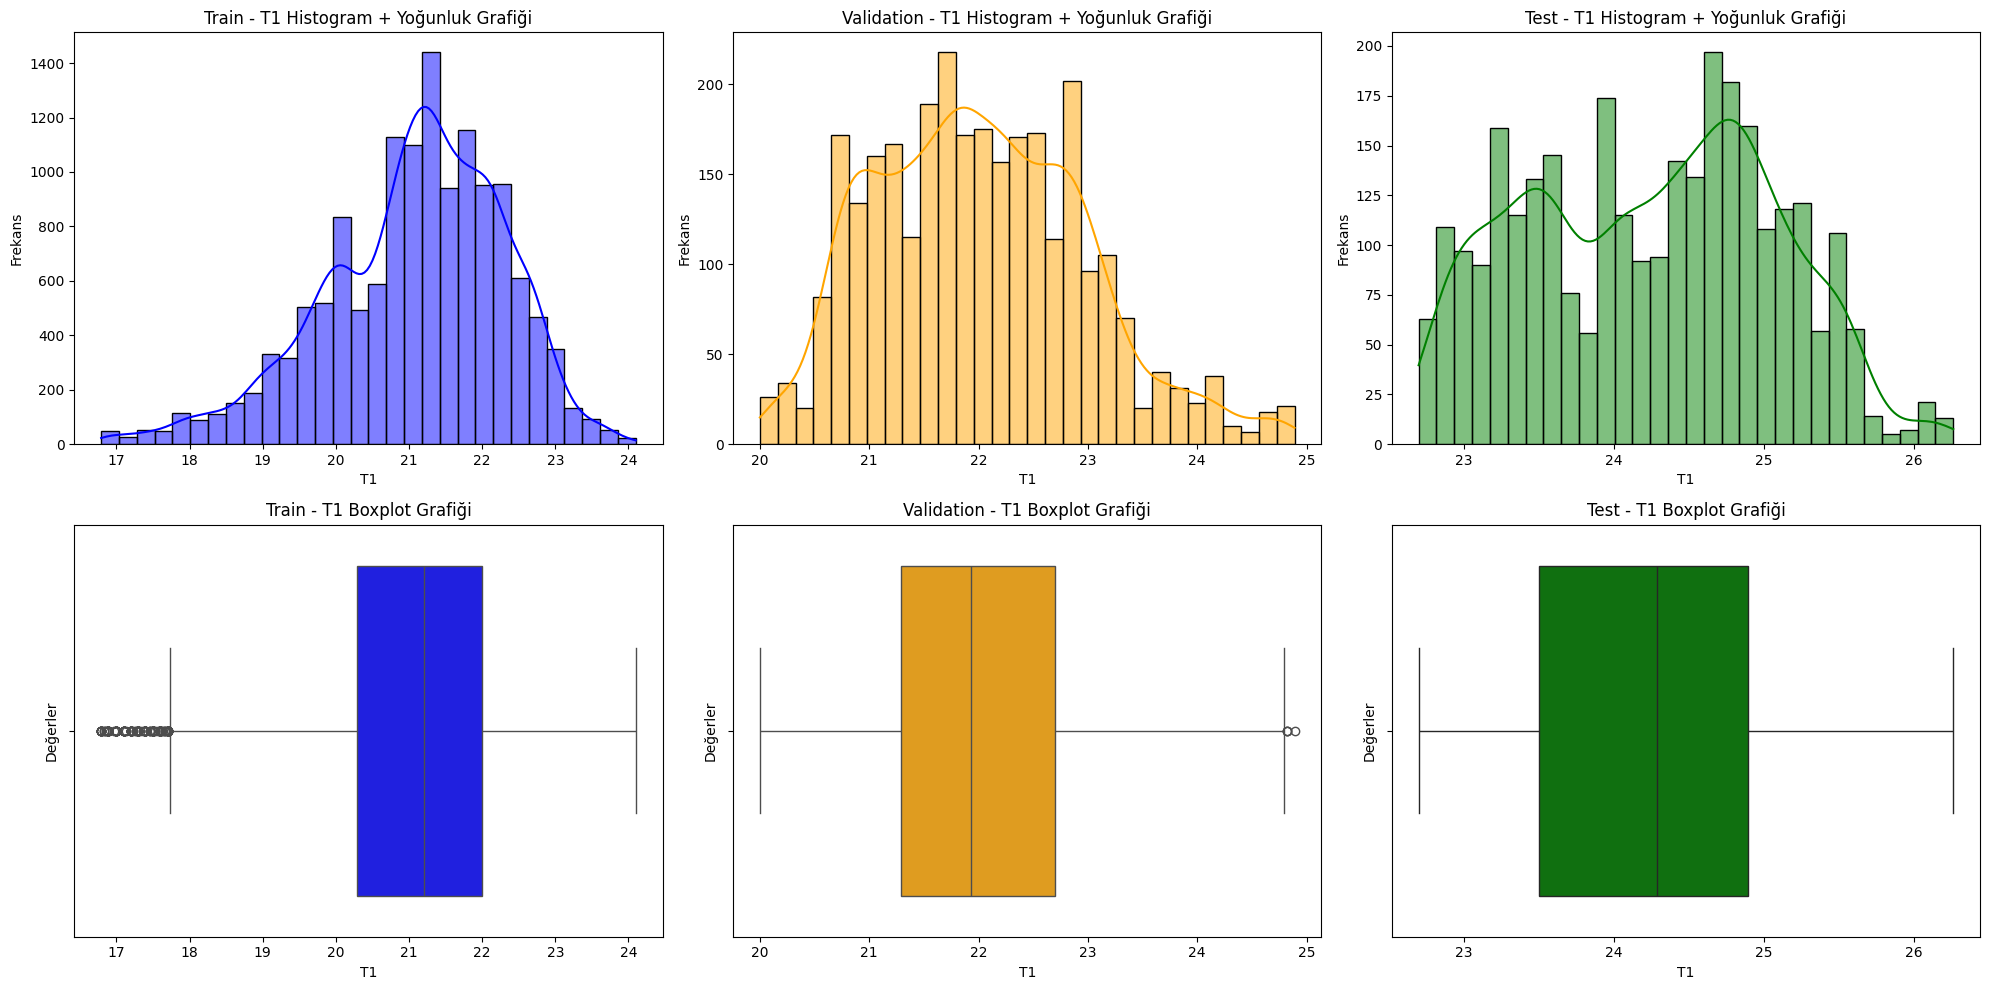

In [133]:
variable = "T1"
stats_table(datasets, labels, variable)
univariate_variable_analysis(variable)

T2 Değişkeni İstatistik Özeti                      
                                  Train Validation       Test
Ortalama                      19.584244  20.626035  23.588027
Medyan                        19.500000  20.238750  23.347143
Std Sapma                      1.485123   2.171908   1.937332
Varyans                        2.205589   4.717183   3.753255
Minimum                       16.100000  17.100000  20.200000
Maksimum                      24.600000  27.100000  29.856667

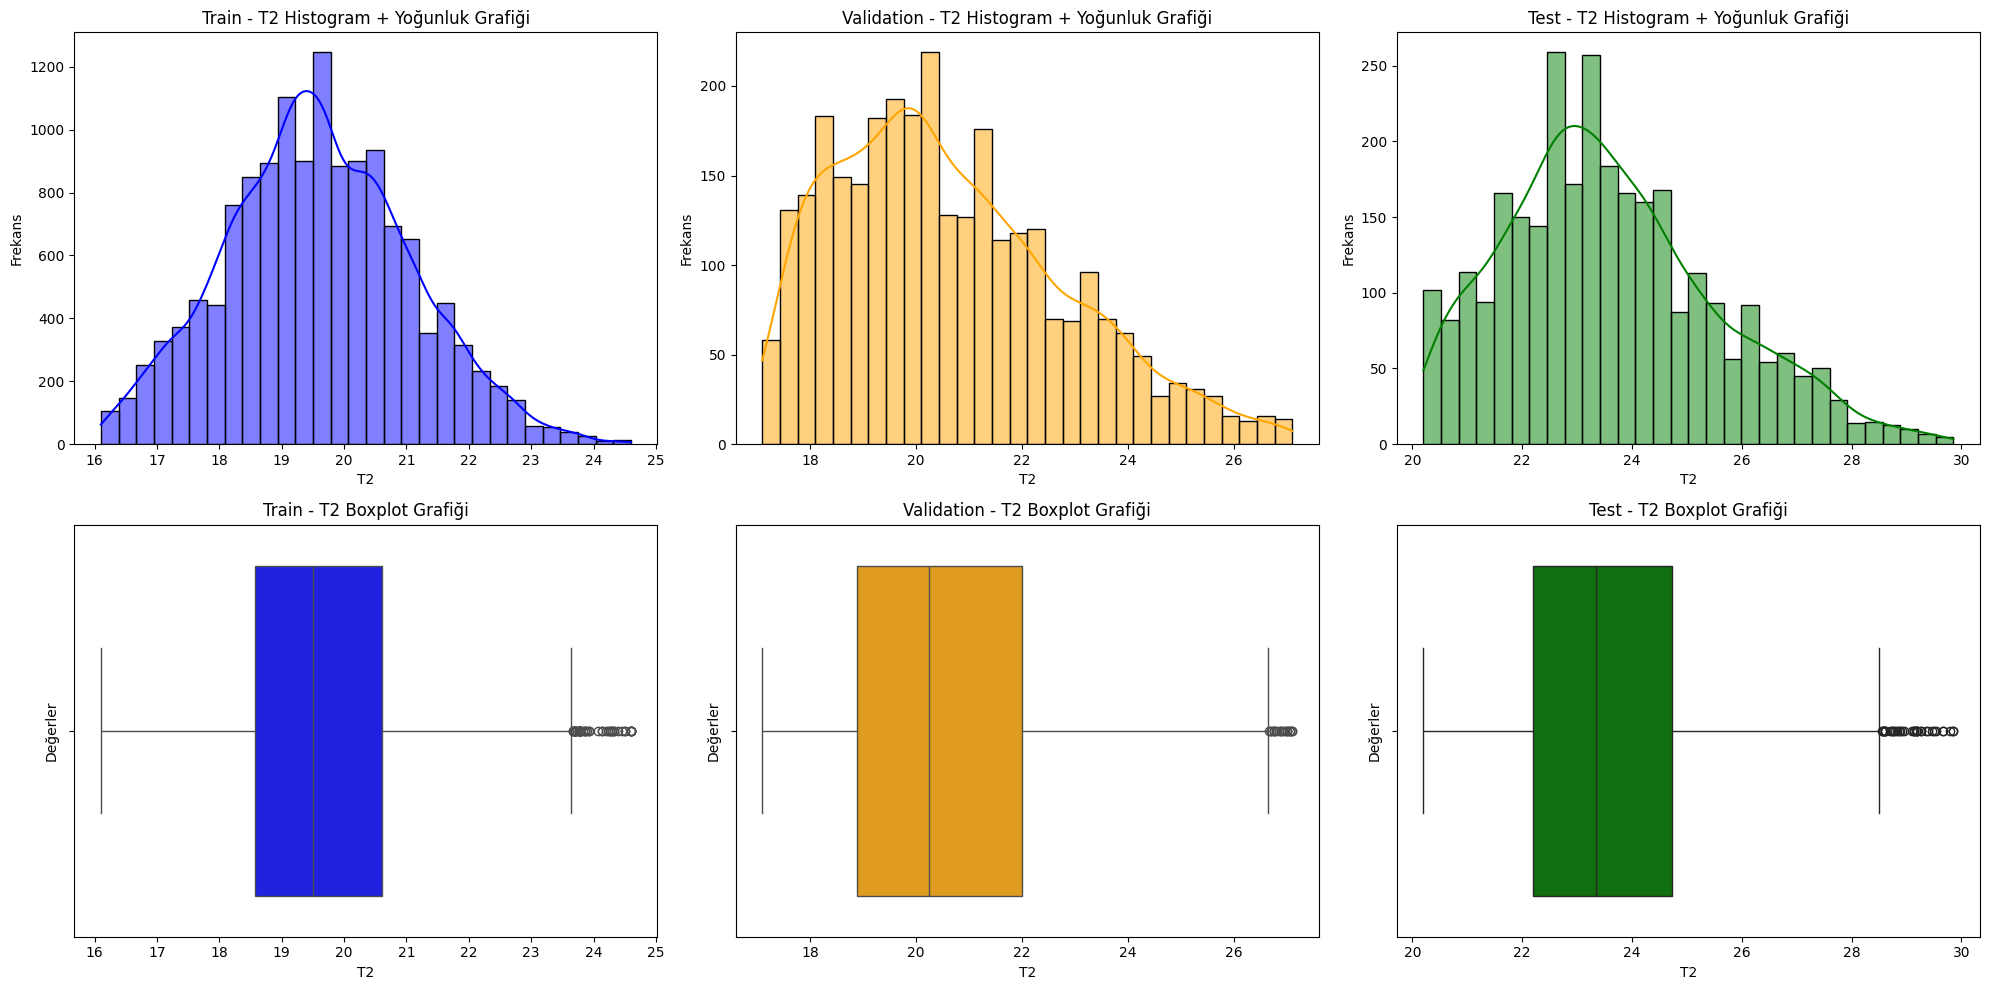

In [134]:
variable = "T2"
stats_table(datasets, labels, variable)
univariate_variable_analysis(variable)

T3 Değişkeni İstatistik Özeti                      
                                  Train Validation       Test
Ortalama                      21.418166  22.951462  25.546920
Medyan                        21.390000  22.856667  25.390000
Std Sapma                      1.465726   1.026308   1.076954
Varyans                        2.148353   1.053307   1.159831
Minimum                       17.200000  21.000000  23.000000
Maksimum                      26.700000  27.600000  29.236000

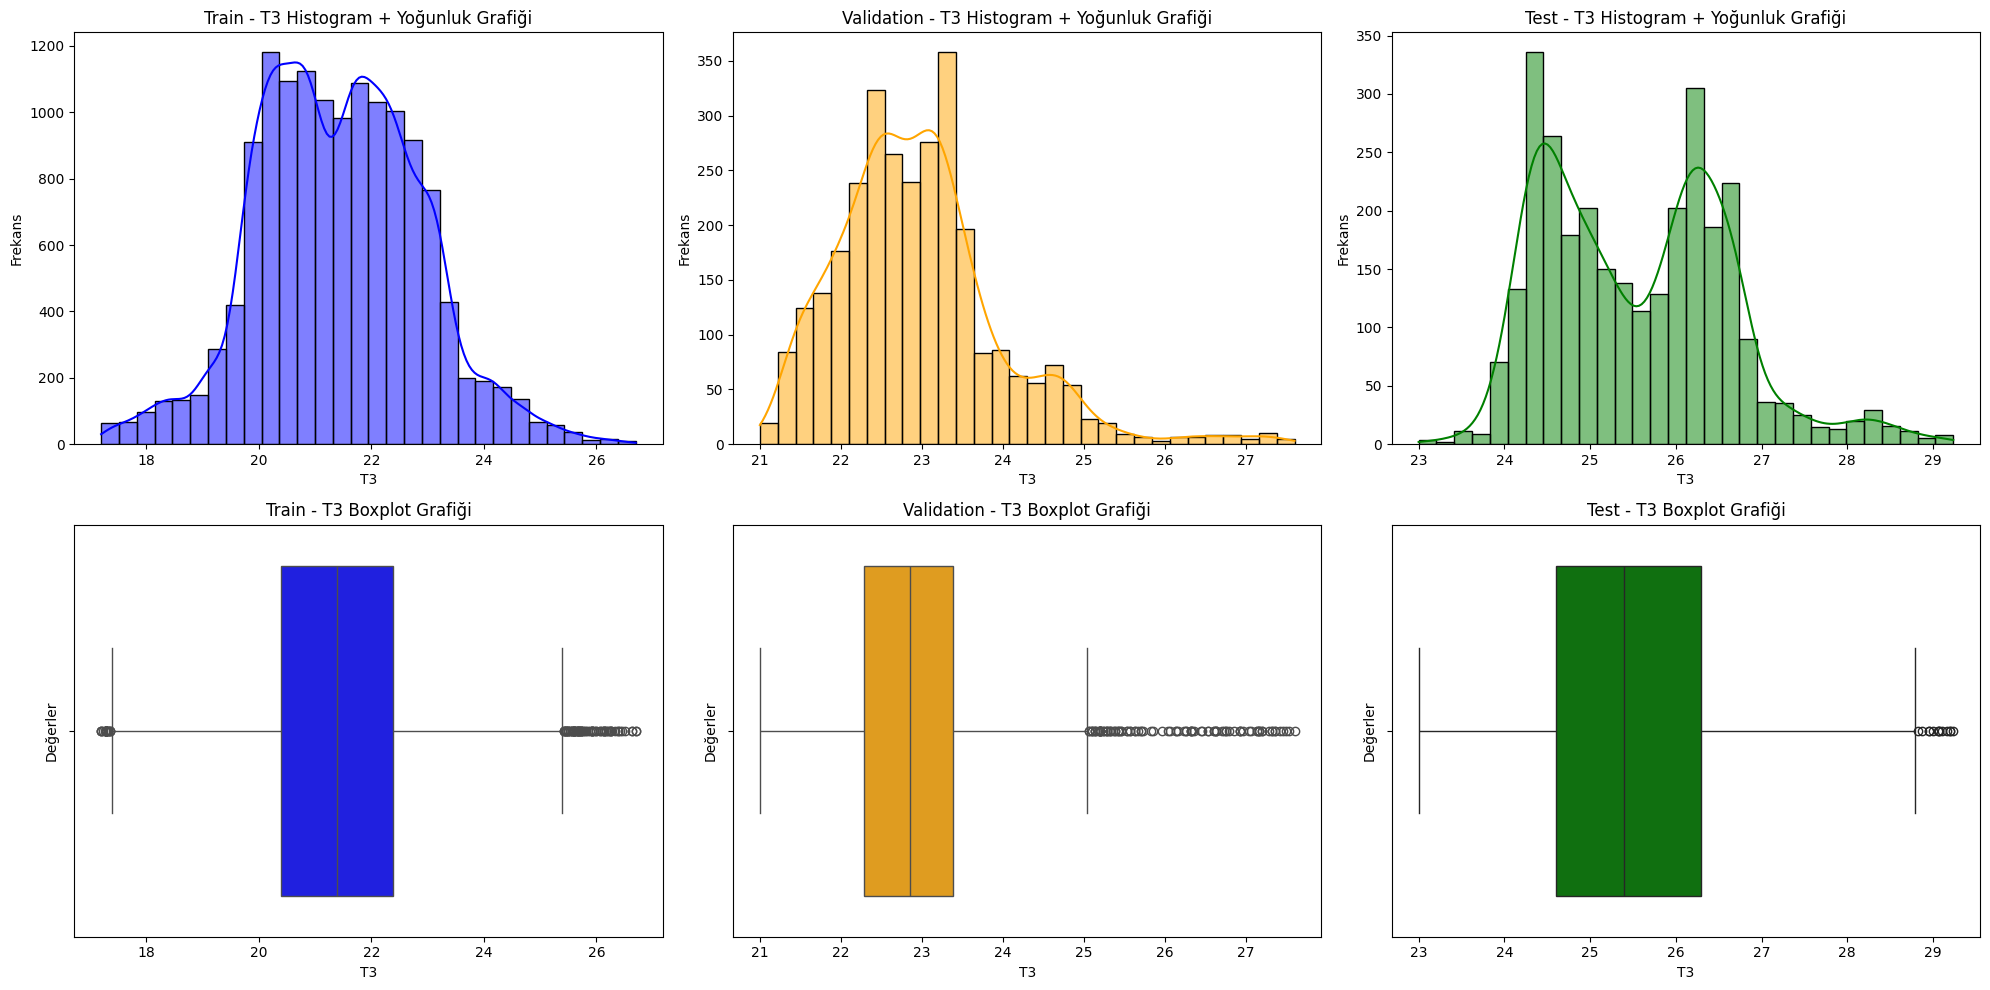

In [135]:
variable = "T3"
stats_table(datasets, labels, variable)
univariate_variable_analysis(variable)

T4 Değişkeni İstatistik Özeti                      
                                  Train Validation       Test
Ortalama                      19.960589  21.677485  24.207735
Medyan                        20.100000  21.890000  24.100000
Std Sapma                      1.469368   1.184103   0.831895
Varyans                        2.159042   1.402099   0.692049
Minimum                       15.100000  19.200000  22.500000
Maksimum                      23.760000  24.290000  26.200000

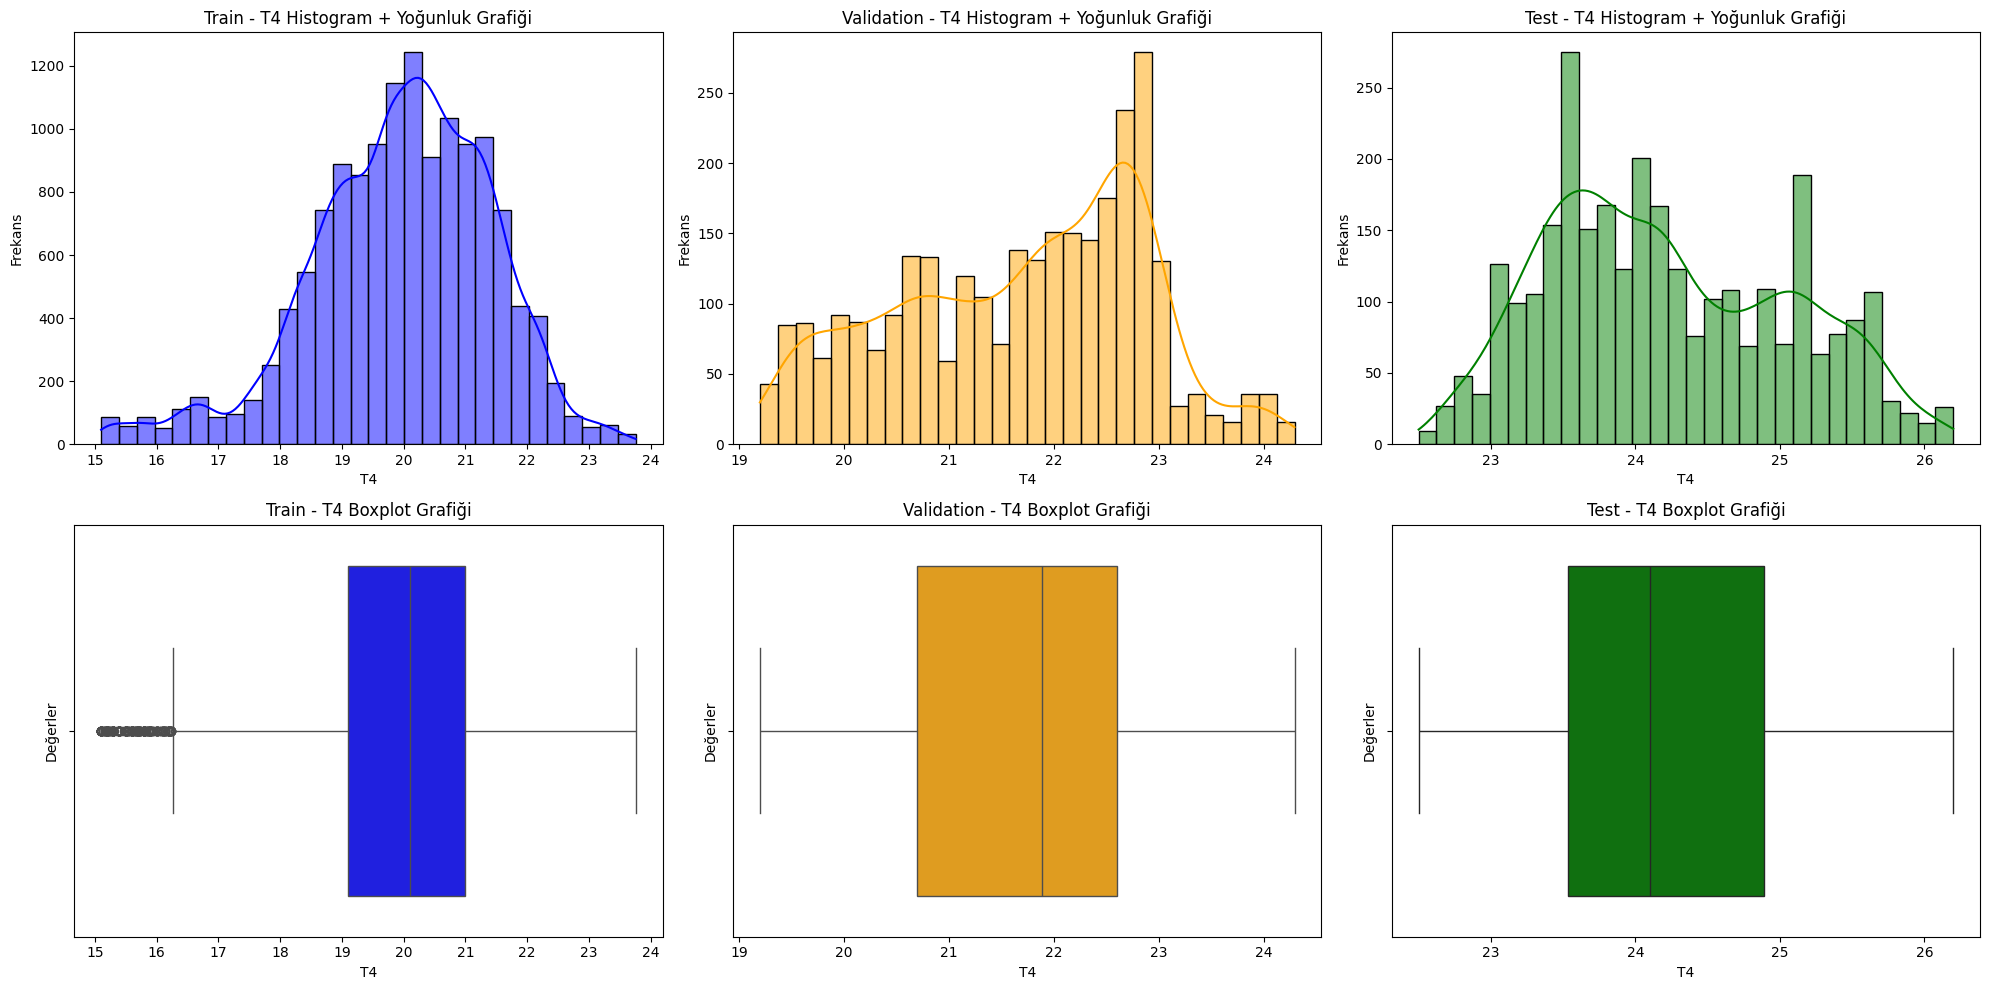

In [136]:
variable = "T4"
stats_table(datasets, labels, variable)
univariate_variable_analysis(variable)

T5 Değişkeni İstatistik Özeti                      
                                  Train Validation       Test
Ortalama                      18.803833  20.146626  22.715319
Medyan                        18.700000  20.200000  22.926667
Std Sapma                      1.281387   0.766843   1.212337
Varyans                        1.641952   0.588048   1.469760
Minimum                       15.330000  18.600000  19.200000
Maksimum                      22.967778  22.890000  25.795000

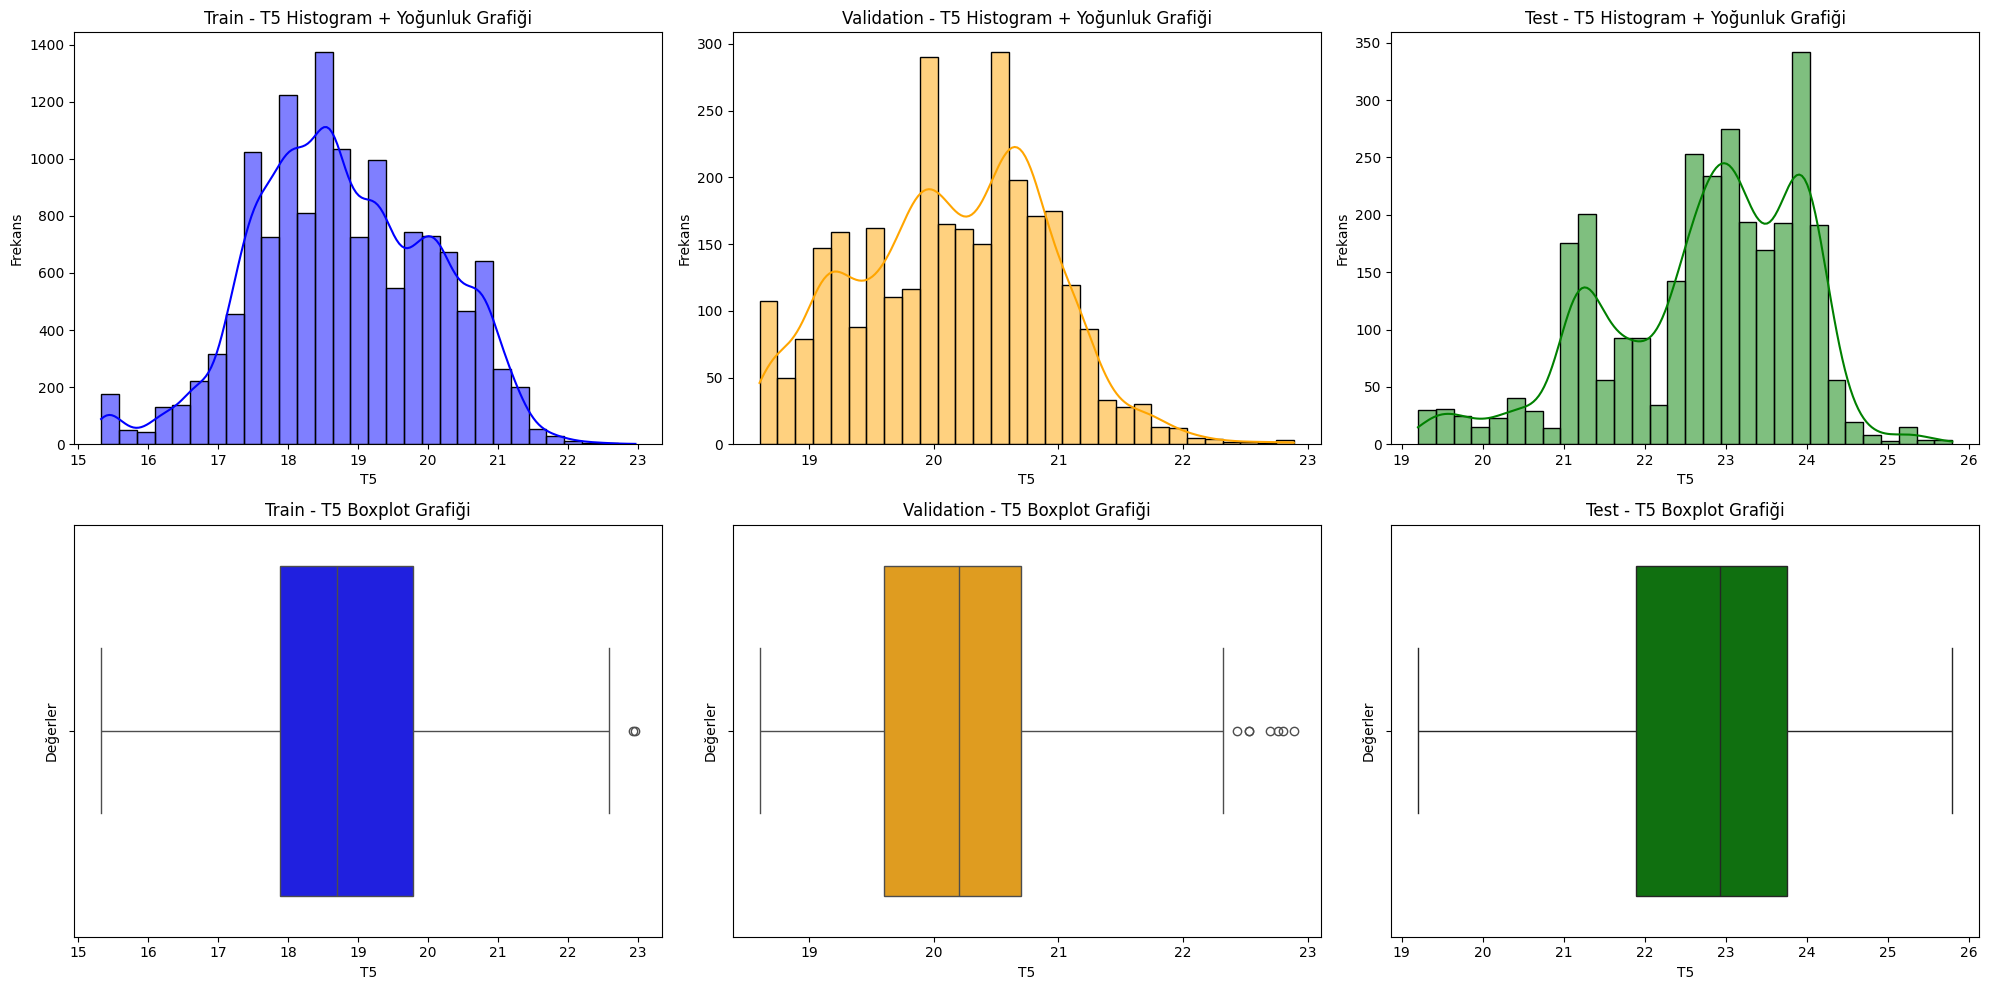

In [137]:
variable = "T5"
stats_table(datasets, labels, variable)
univariate_variable_analysis(variable)

T6 Değişkeni İstatistik Özeti                      
                                  Train Validation       Test
Ortalama                       5.958728   8.899465  16.030433
Medyan                         5.933333   8.278333  15.430000
Std Sapma                      4.643022   5.557483   5.577060
Varyans                       21.557655  30.885615  31.103597
Minimum                       -6.065000  -1.000000   1.900000
Maksimum                      20.463333  24.468571  28.290000

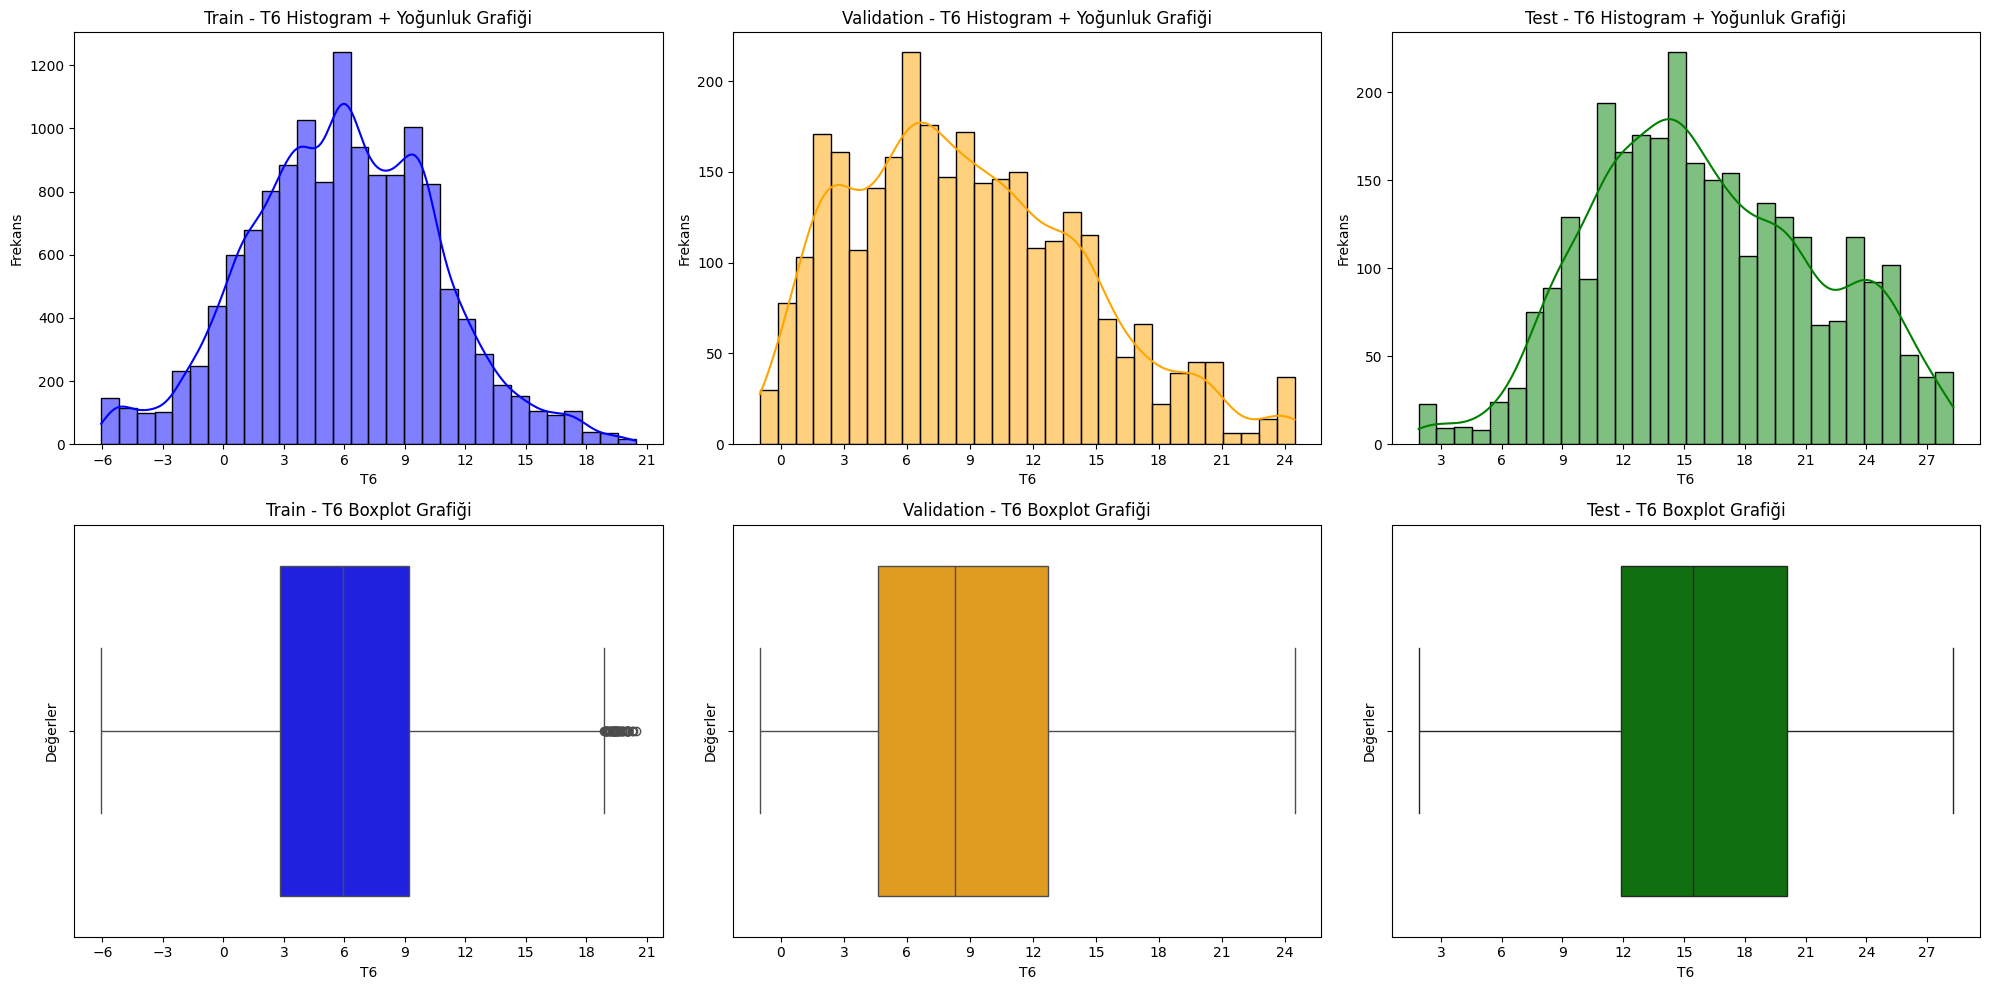

In [138]:
variable = "T6"
stats_table(datasets, labels, variable)
univariate_variable_analysis(variable)

T7 Değişkeni İstatistik Özeti                      
                                  Train Validation       Test
Ortalama                      19.382978  20.883140  23.776022
Medyan                        19.272000  21.000000  23.642857
Std Sapma                      1.569715   1.158401   0.705305
Varyans                        2.464004   1.341893   0.497455
Minimum                       15.390000  18.890000  22.500000
Maksimum                      23.566667  24.000000  26.000000

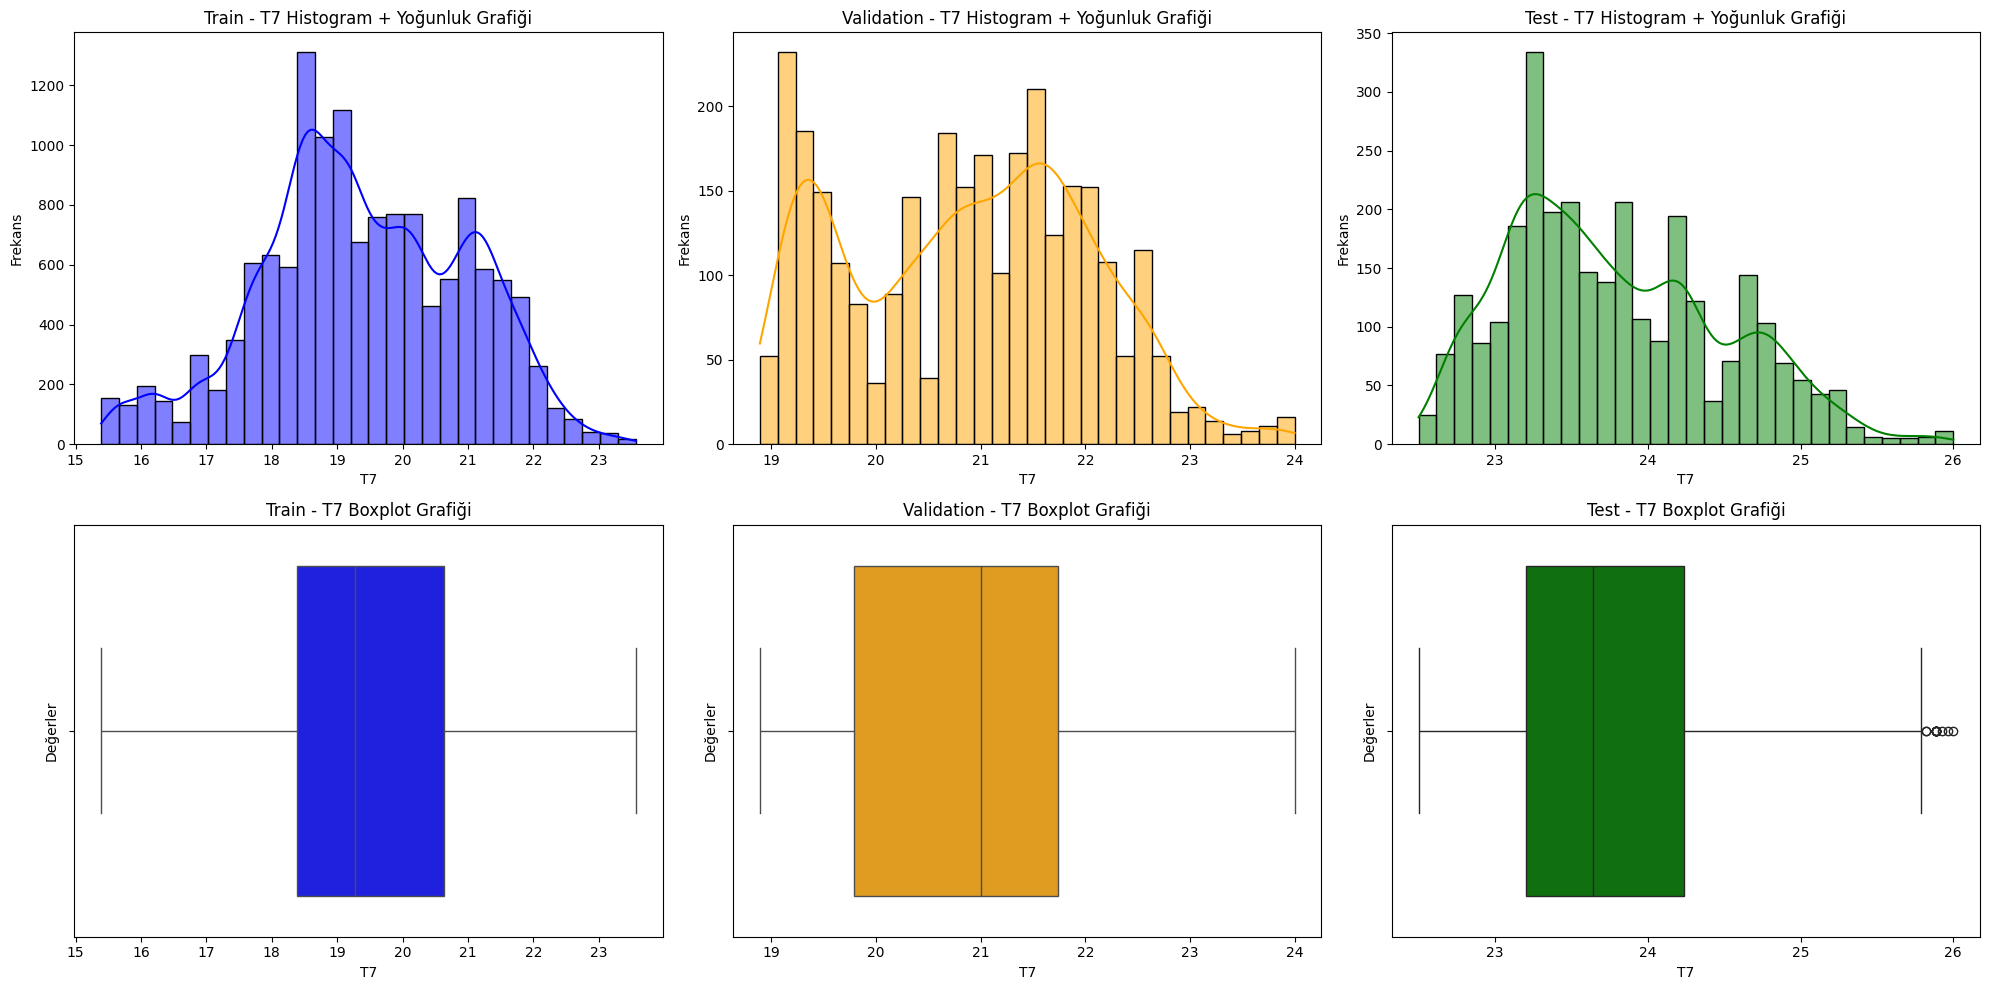

In [139]:
variable = "T7"
stats_table(datasets, labels, variable)
univariate_variable_analysis(variable)

T8 Değişkeni İstatistik Özeti                      
                                  Train Validation       Test
Ortalama                      21.331662  22.660842  24.651383
Medyan                        21.500000  22.700000  24.540000
Std Sapma                      1.735114   0.982793   0.974000
Varyans                        3.010622   0.965882   0.948677
Minimum                       16.306667  20.290000  22.700000
Maksimum                      25.200000  25.000000  27.230000

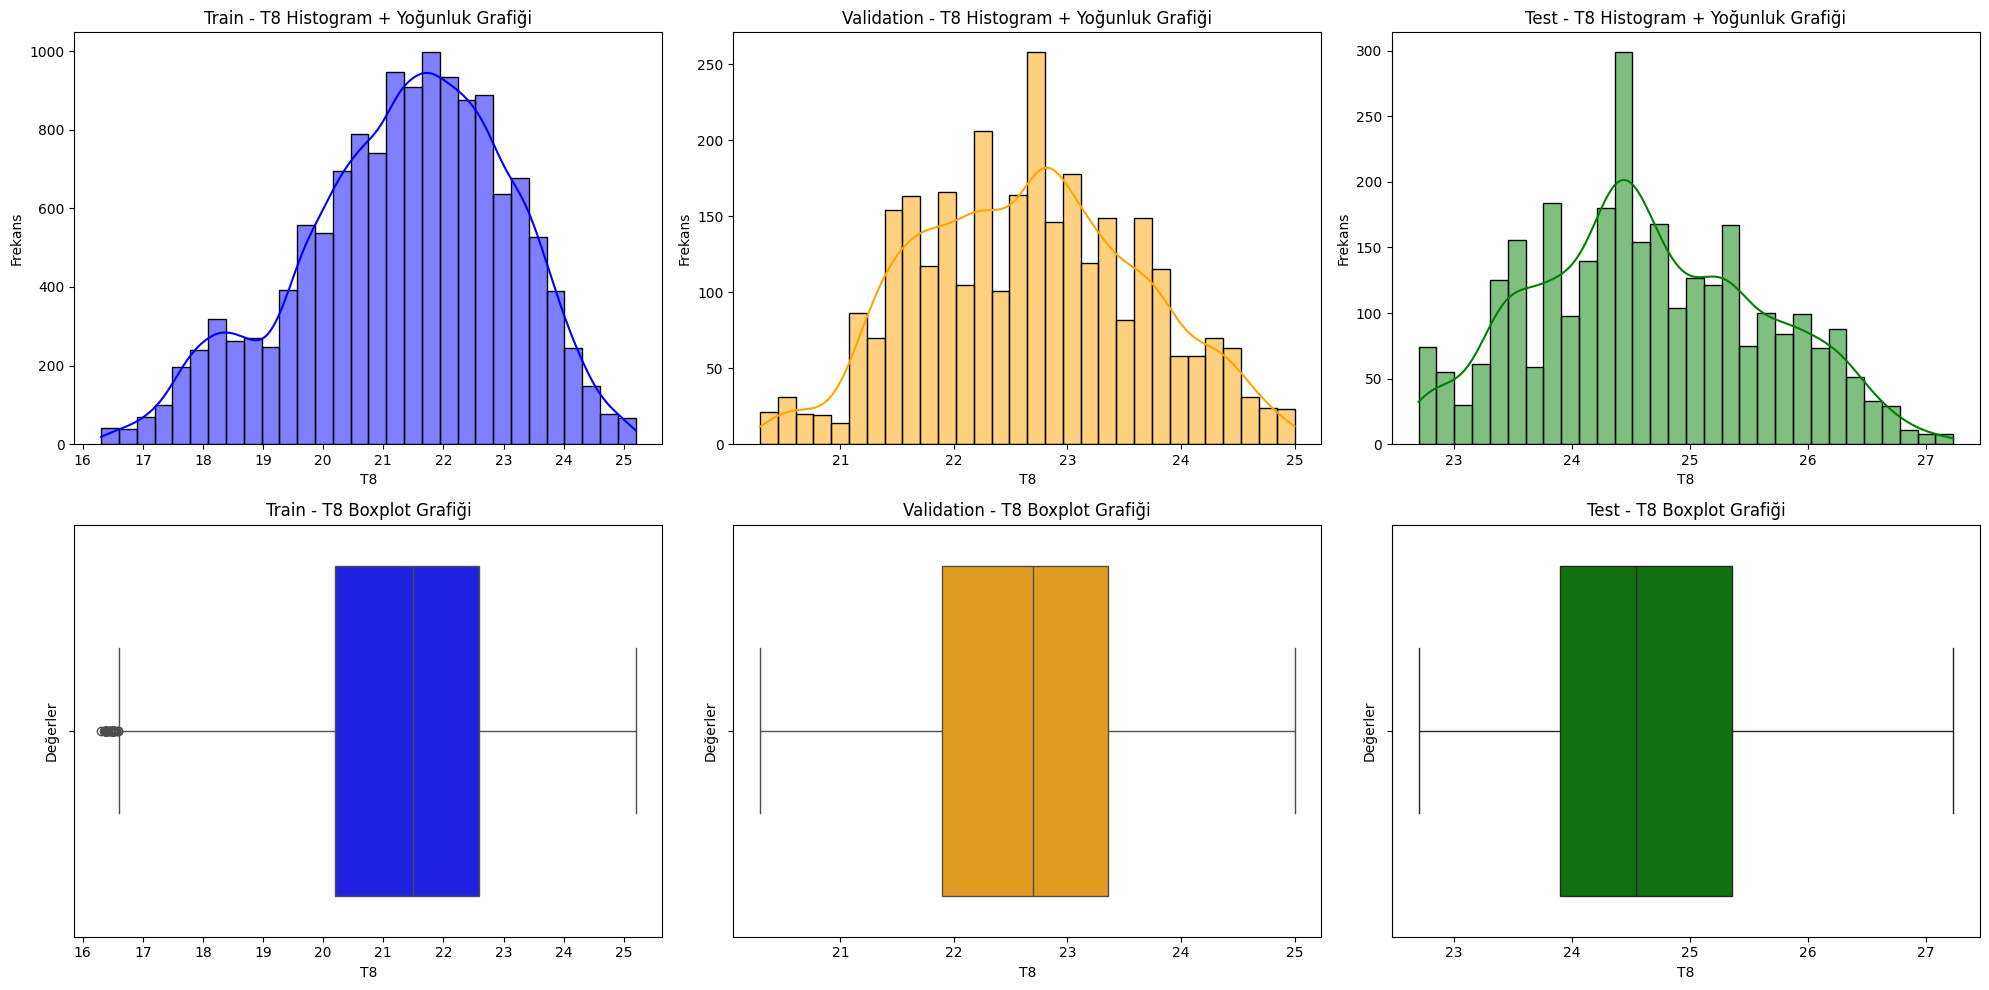

In [140]:
variable = "T8"
stats_table(datasets, labels, variable)
univariate_variable_analysis(variable)

T9 Değişkeni İstatistik Özeti                      
                                  Train Validation       Test
Ortalama                      18.594411  20.080059  23.050539
Medyan                        18.426667  20.200000  22.890000
Std Sapma                      1.417519   0.724510   0.621962
Varyans                        2.009361   0.524914   0.386836
Minimum                       14.890000  18.600000  21.517647
Maksimum                      23.840000  22.030000  24.500000

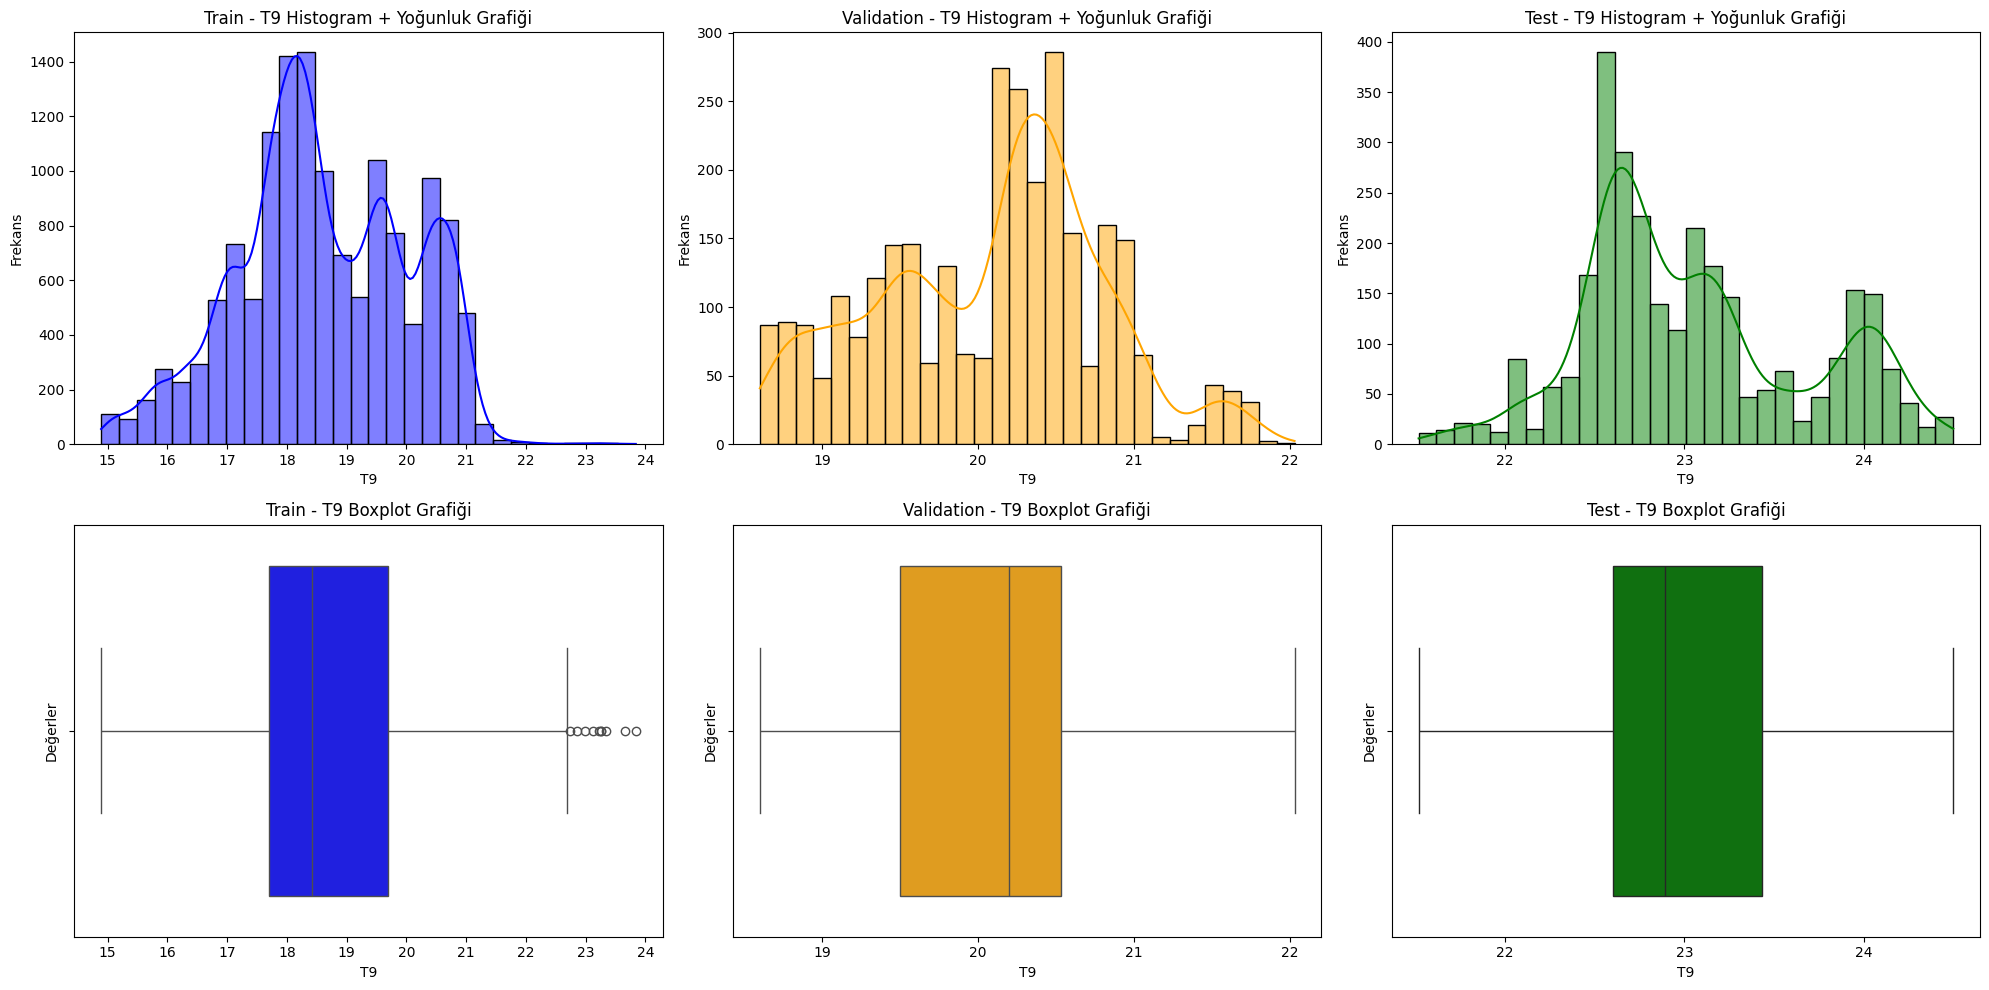

In [141]:
variable = "T9"
stats_table(datasets, labels, variable)
univariate_variable_analysis(variable)

T_out Değişkeni İstatistik Özeti                      
                                     Train Validation       Test
Ortalama                          5.717090   8.219144  14.510182
Medyan                            5.666667   7.554167  14.300000
Std Sapma                         4.148212   4.751680   4.601584
Varyans                          17.207664  22.578464  21.174580
Minimum                          -5.000000  -0.500000   3.600000
Maksimum                         19.700000  22.800000  26.100000

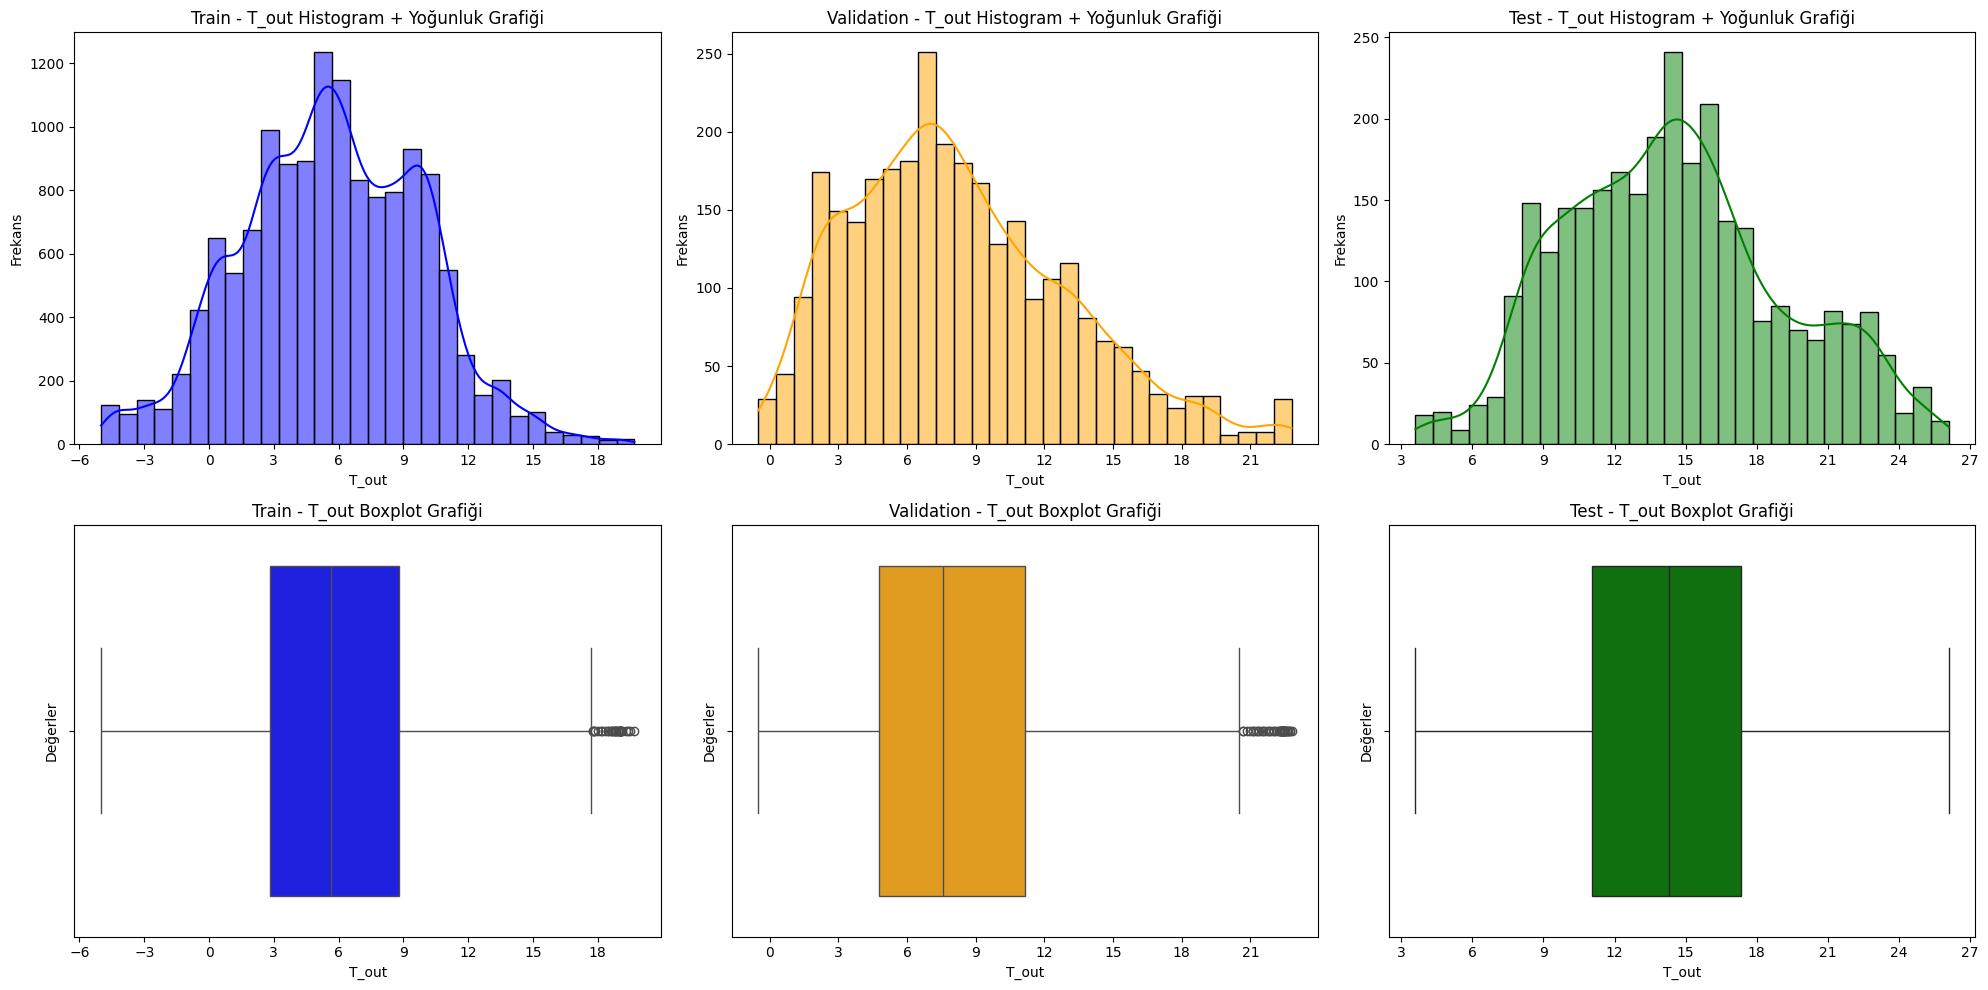

In [142]:
variable = "T_out"
stats_table(datasets, labels, variable)
univariate_variable_analysis(variable)

Tdewpoint Değişkeni İstatistik Özeti                      
                                         Train Validation       Test
Ortalama                              2.755081   2.895462   9.317224
Medyan                                2.833333   2.400000   9.400000
Std Sapma                             3.684821   2.363191   3.464981
Varyans                              13.577907   5.584673  12.006094
Minimum                              -6.600000  -3.000000   0.100000
Maksimum                             11.400000  10.300000  15.500000

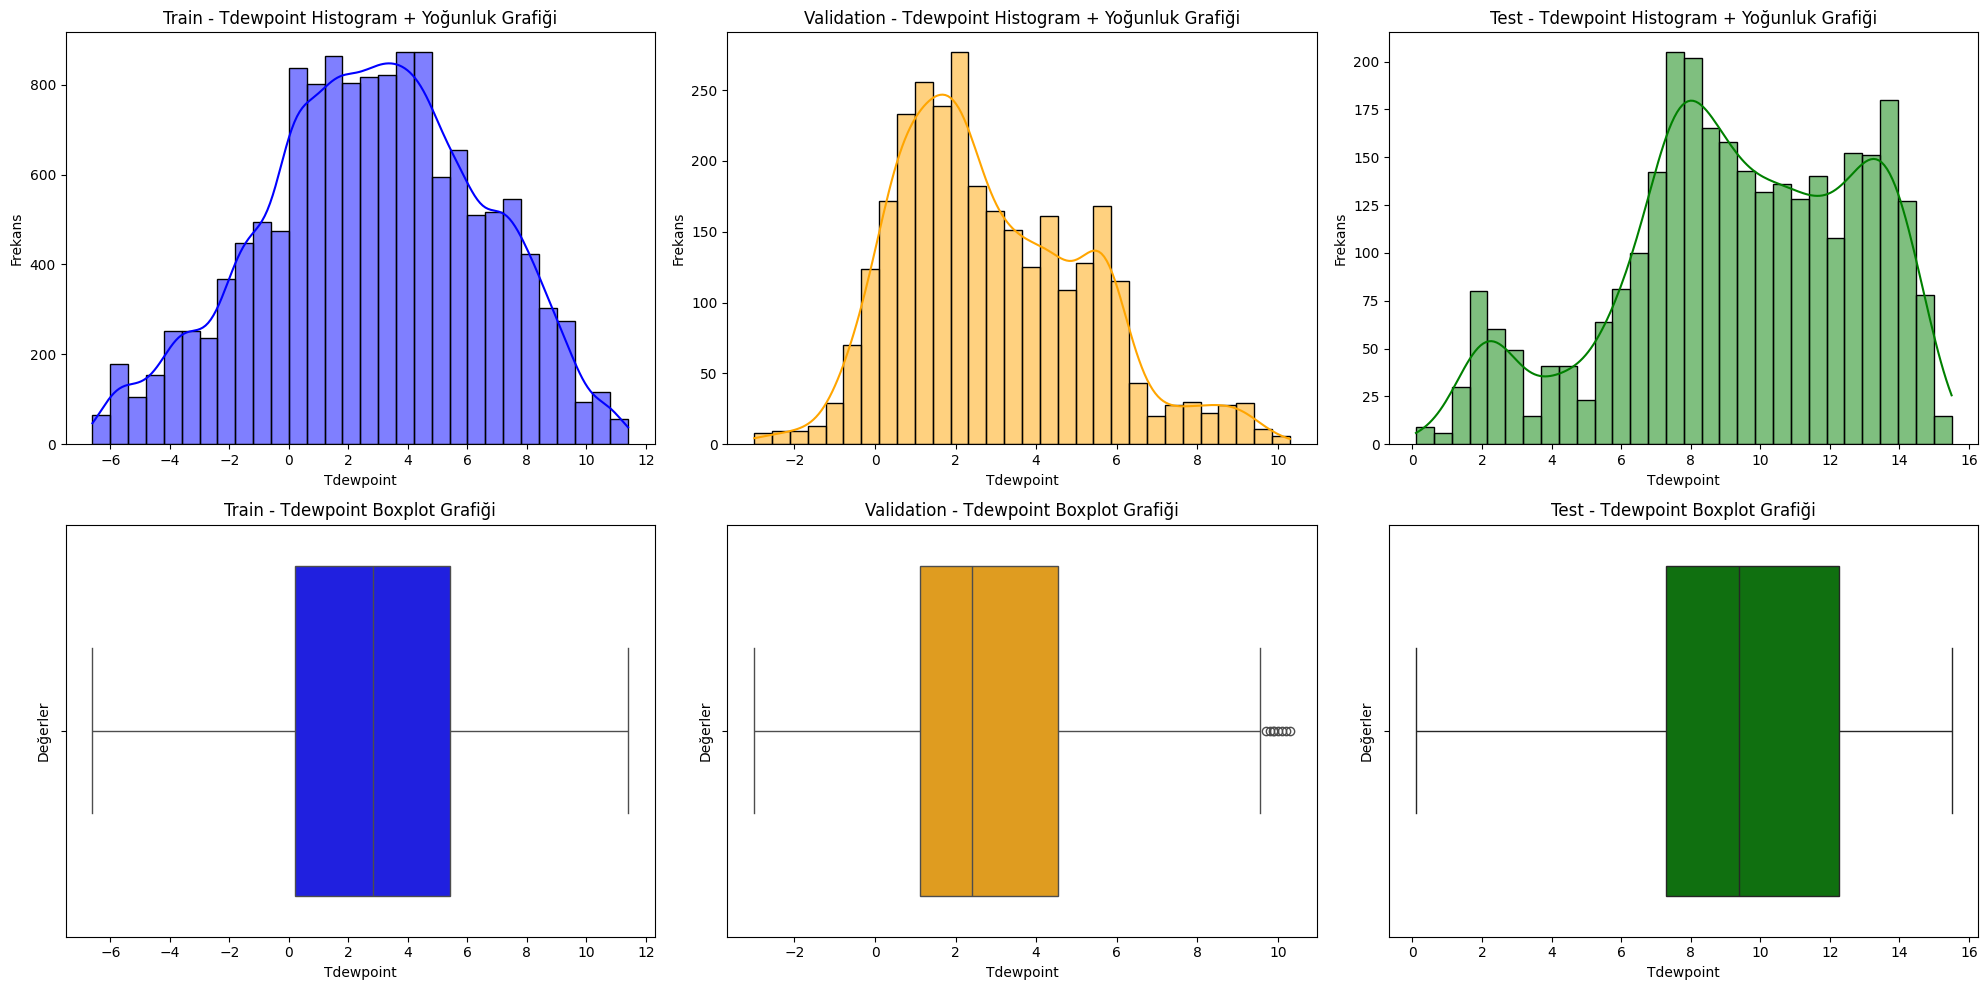

In [143]:
variable = "Tdewpoint"
stats_table(datasets, labels, variable)
univariate_variable_analysis(variable)

#### Nem Değişkenleri

RH_1 Değişkeni İstatistik Özeti                      
                                    Train Validation       Test
Ortalama                        40.403839  37.078062  42.768073
Medyan                          40.090000  37.066667  41.825584
Std Sapma                        3.555143   2.683877   4.782642
Varyans                         12.639039   7.203196  22.873665
Minimum                         31.426667  27.023333  30.790000
Maksimum                        63.360000  57.496667  54.666667

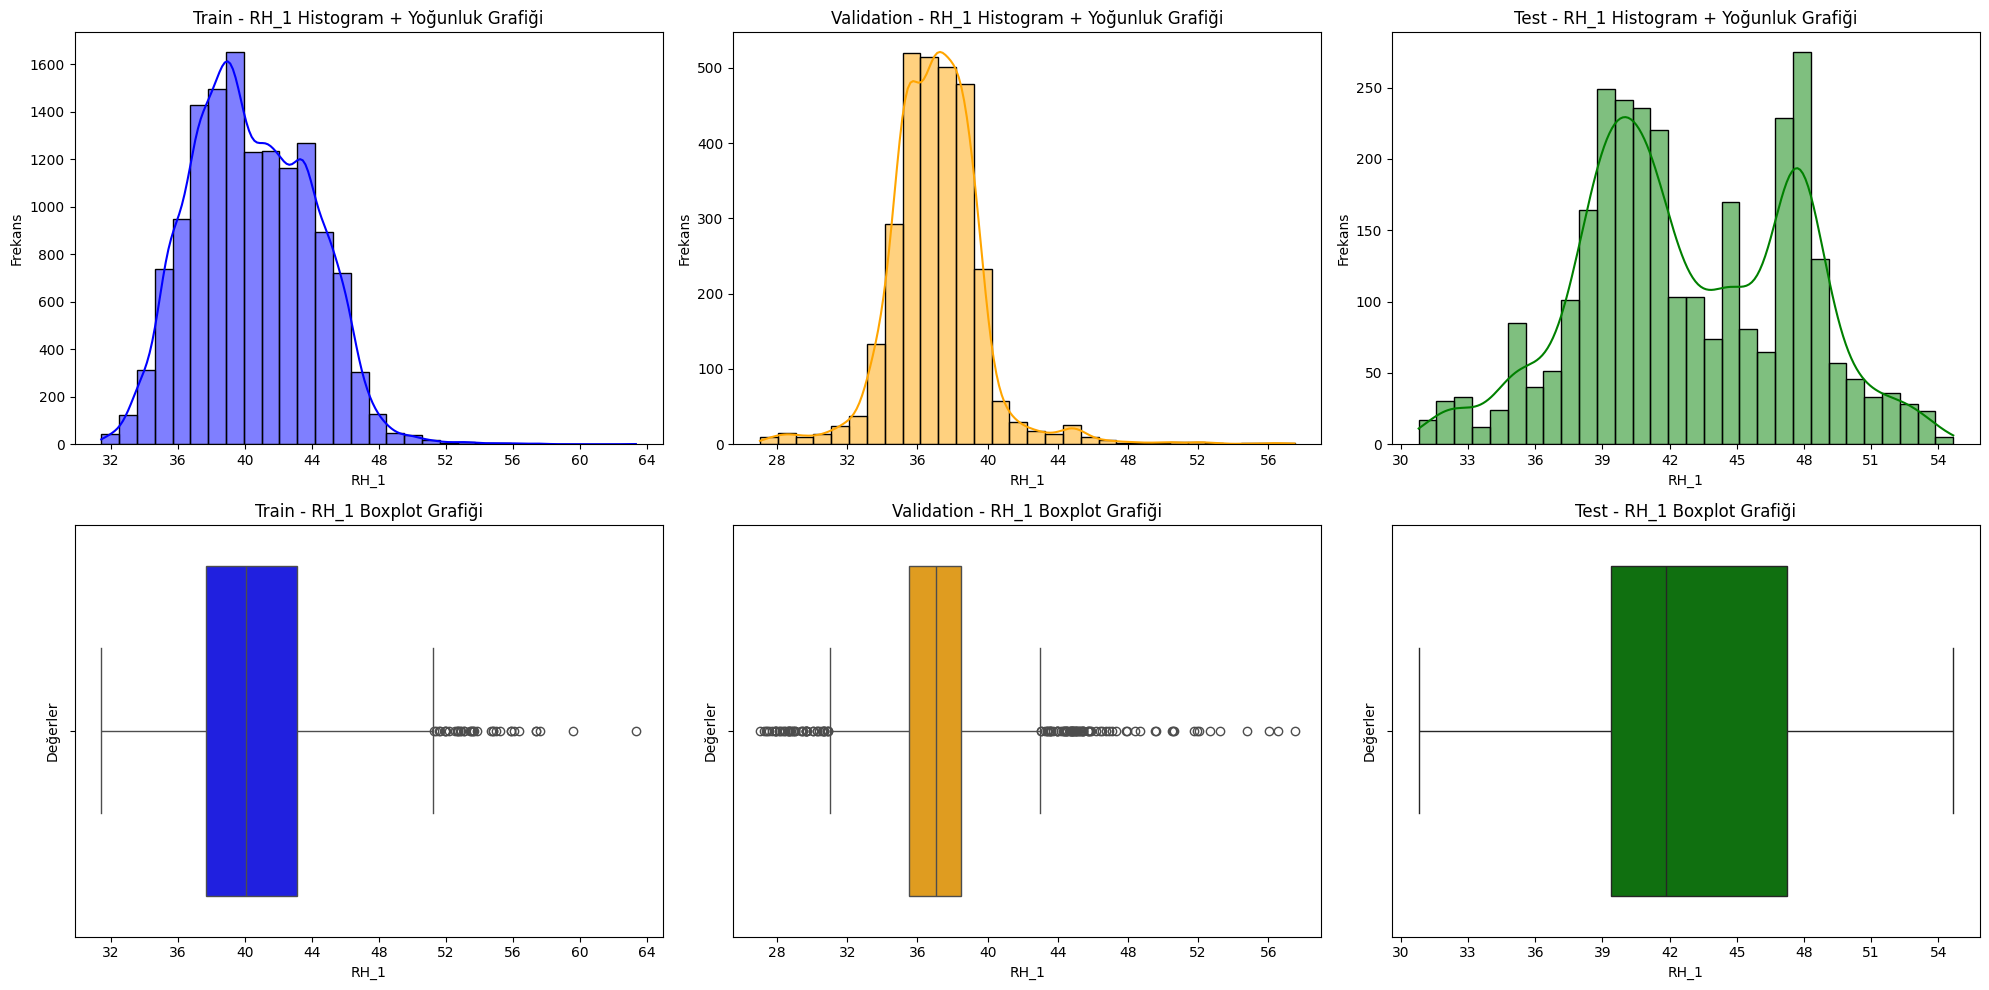

In [144]:
variable = "RH_1"
stats_table(datasets, labels, variable)
univariate_variable_analysis(variable)

RH_2 Değişkeni İstatistik Özeti                      
                                    Train Validation       Test
Ortalama                        40.881499  37.236720  41.451966
Medyan                          40.966667  37.790000  41.500000
Std Sapma                        3.255742   4.138846   5.625356
Varyans                         10.599854  17.130043  31.644629
Minimum                         30.160000  20.463333  26.290000
Maksimum                        50.363333  56.026667  54.090000

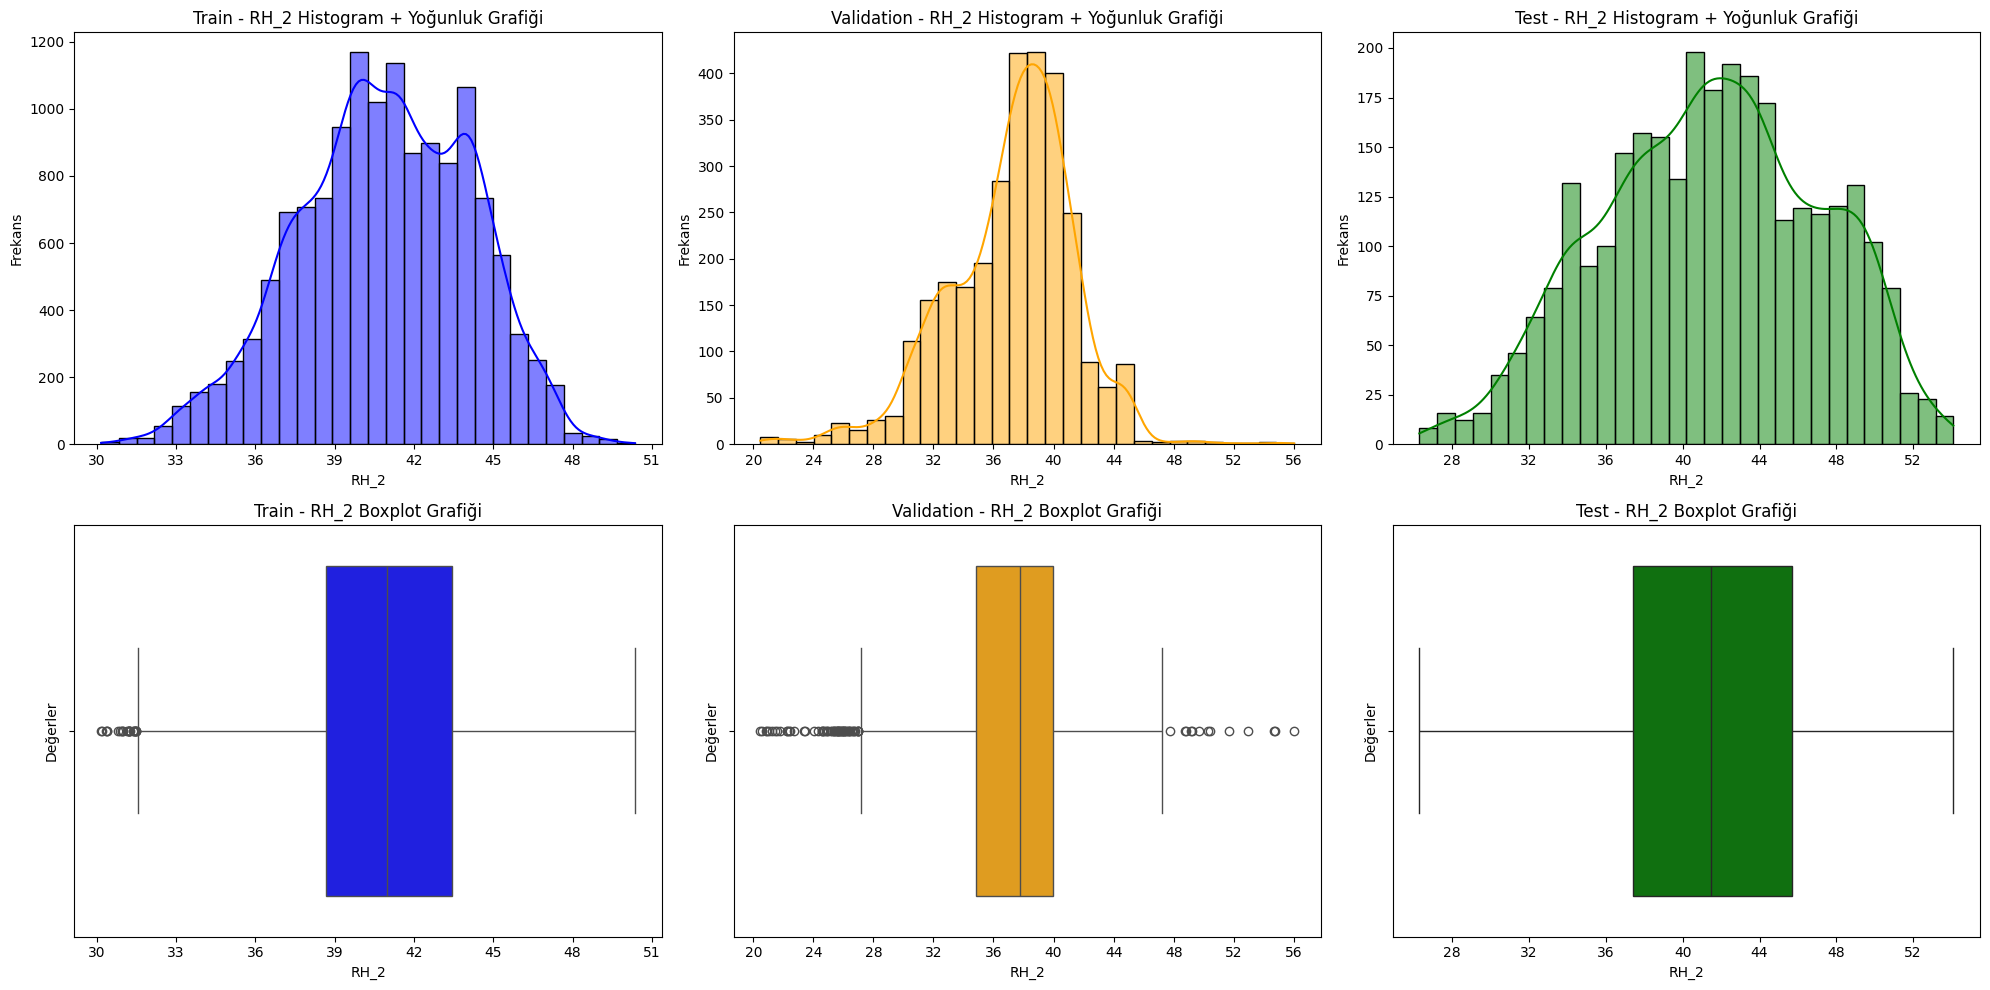

In [145]:
variable = "RH_2"
stats_table(datasets, labels, variable)
univariate_variable_analysis(variable)

RH_3 Değişkeni İstatistik Özeti                      
                                    Train Validation       Test
Ortalama                        39.798476  36.094951  39.795183
Medyan                          39.090000  36.060000  39.230000
Std Sapma                        3.126425   1.406474   3.372152
Varyans                          9.774534   1.978169  11.371411
Minimum                         32.626667  30.663333  28.766667
Maksimum                        50.163333  41.090000  47.693333

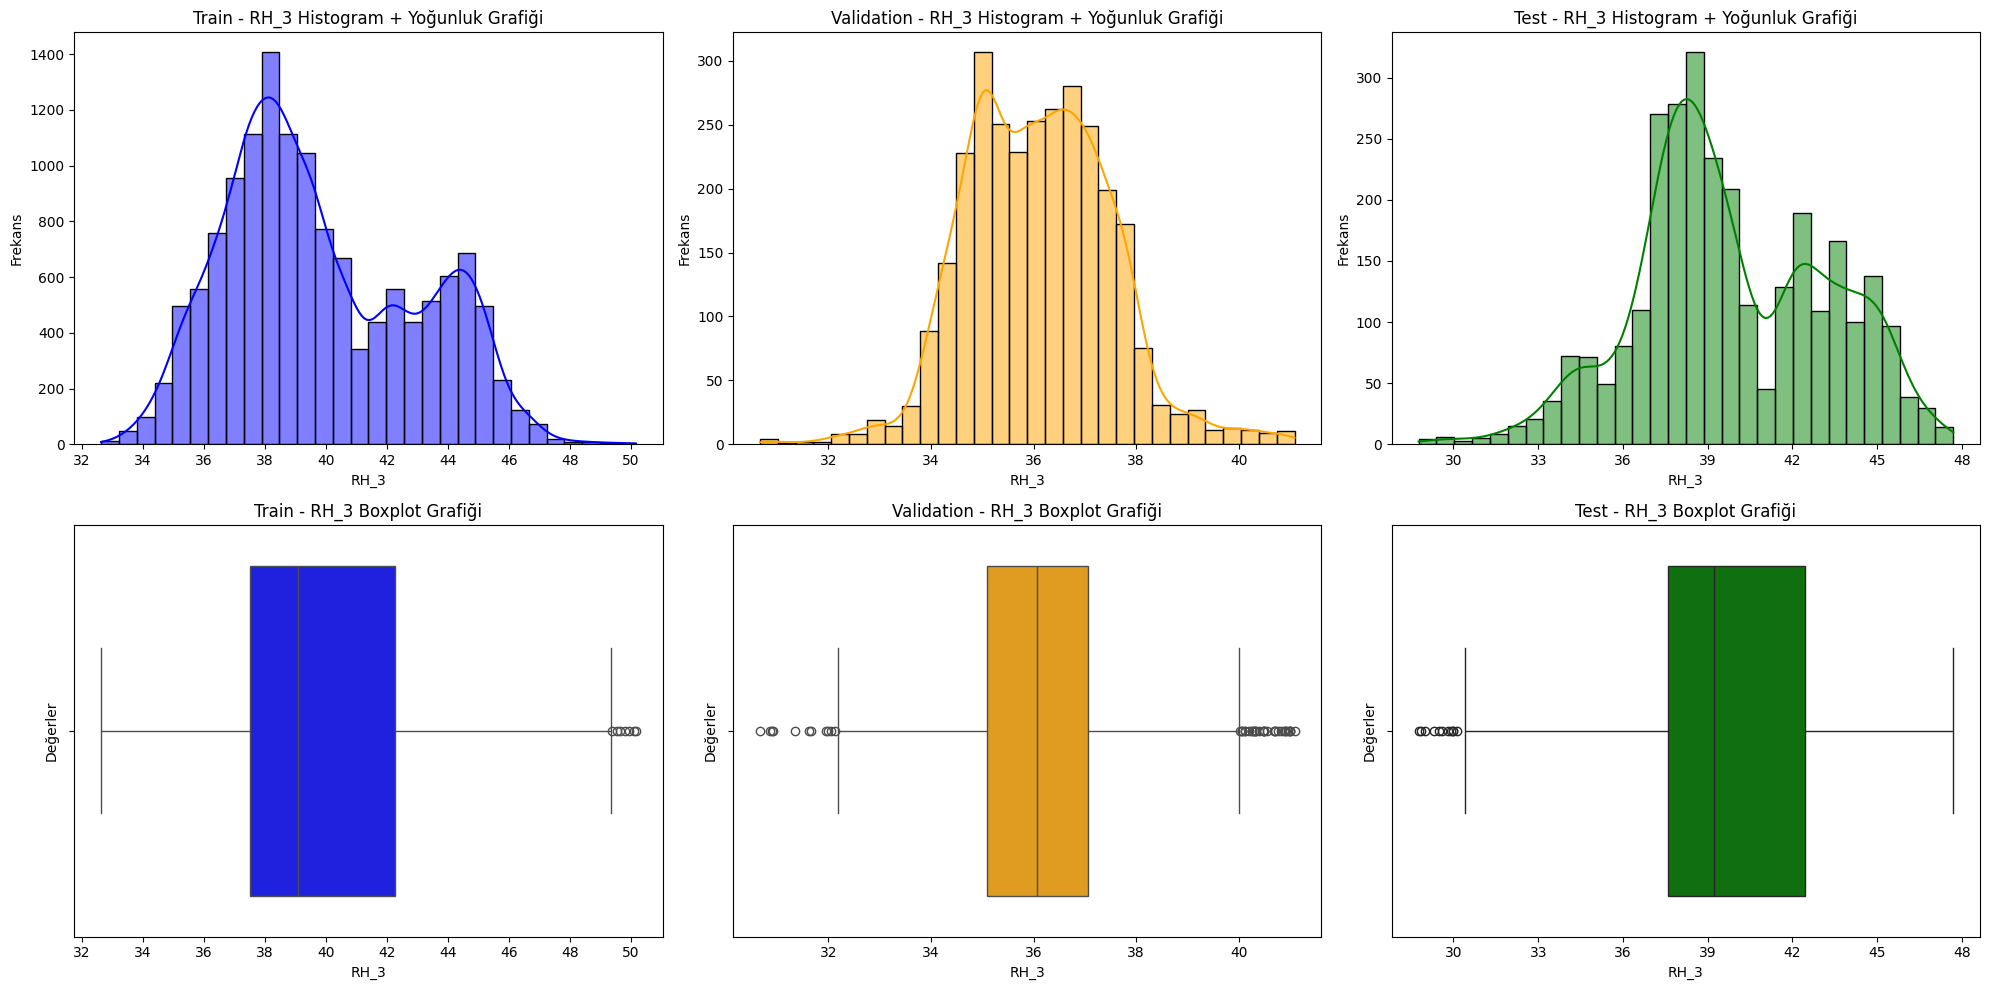

In [146]:
variable = "RH_3"
stats_table(datasets, labels, variable)
univariate_variable_analysis(variable)

RH_4 Değişkeni İstatistik Özeti                      
                                    Train Validation       Test
Ortalama                        39.465291  35.112061  40.895209
Medyan                          38.863333  35.000000  40.400000
Std Sapma                        4.241896   2.012542   4.233115
Varyans                         17.993680   4.050324  17.919267
Minimum                         30.723333  27.660000  28.716000
Maksimum                        51.090000  40.730000  50.760000

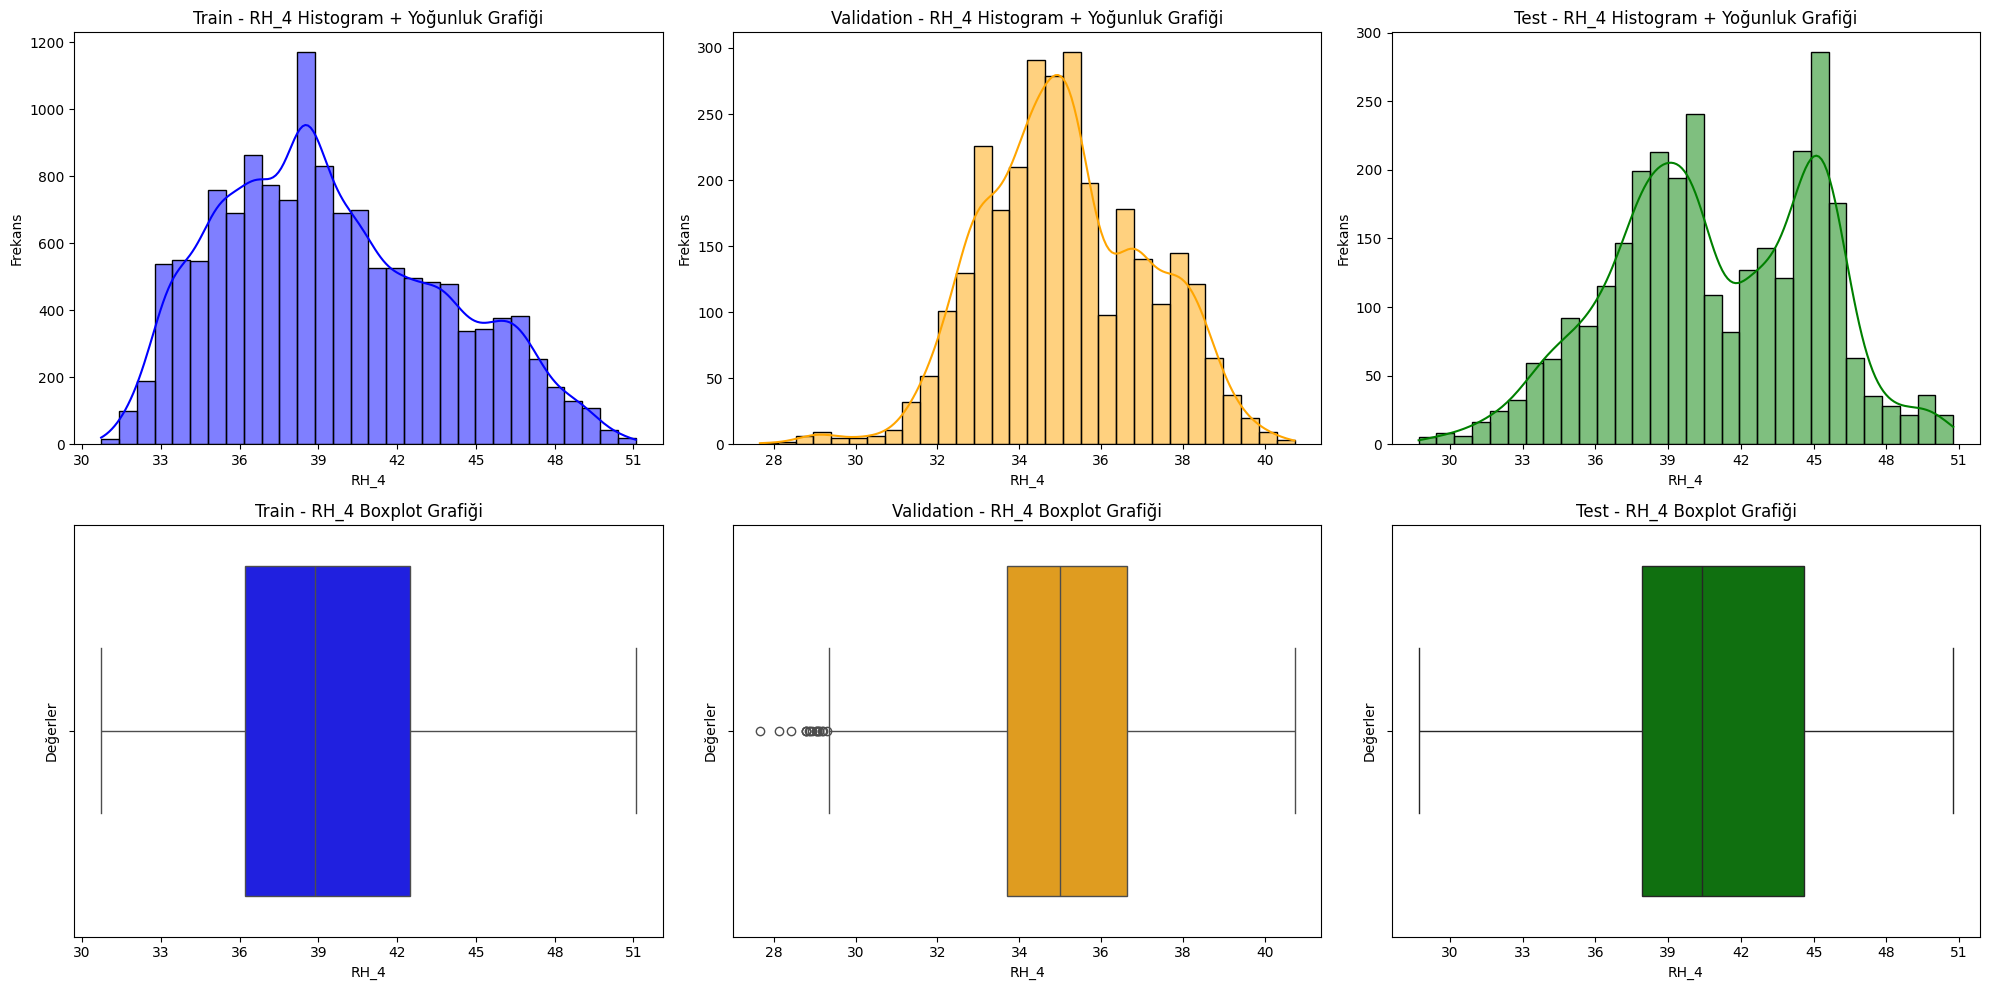

In [147]:
variable = "RH_4"
stats_table(datasets, labels, variable)
univariate_variable_analysis(variable)

RH_5 Değişkeni İstatistik Özeti                      
                                    Train Validation       Test
Ortalama                        51.881423  47.409656  50.138986
Medyan                          49.760000  45.200000  50.090000
Std Sapma                        8.982769   8.454799   8.798896
Varyans                         80.690140  71.483619  77.420568
Minimum                         37.400000  35.363333  29.815000
Maksimum                        96.321667  90.266667  88.950000

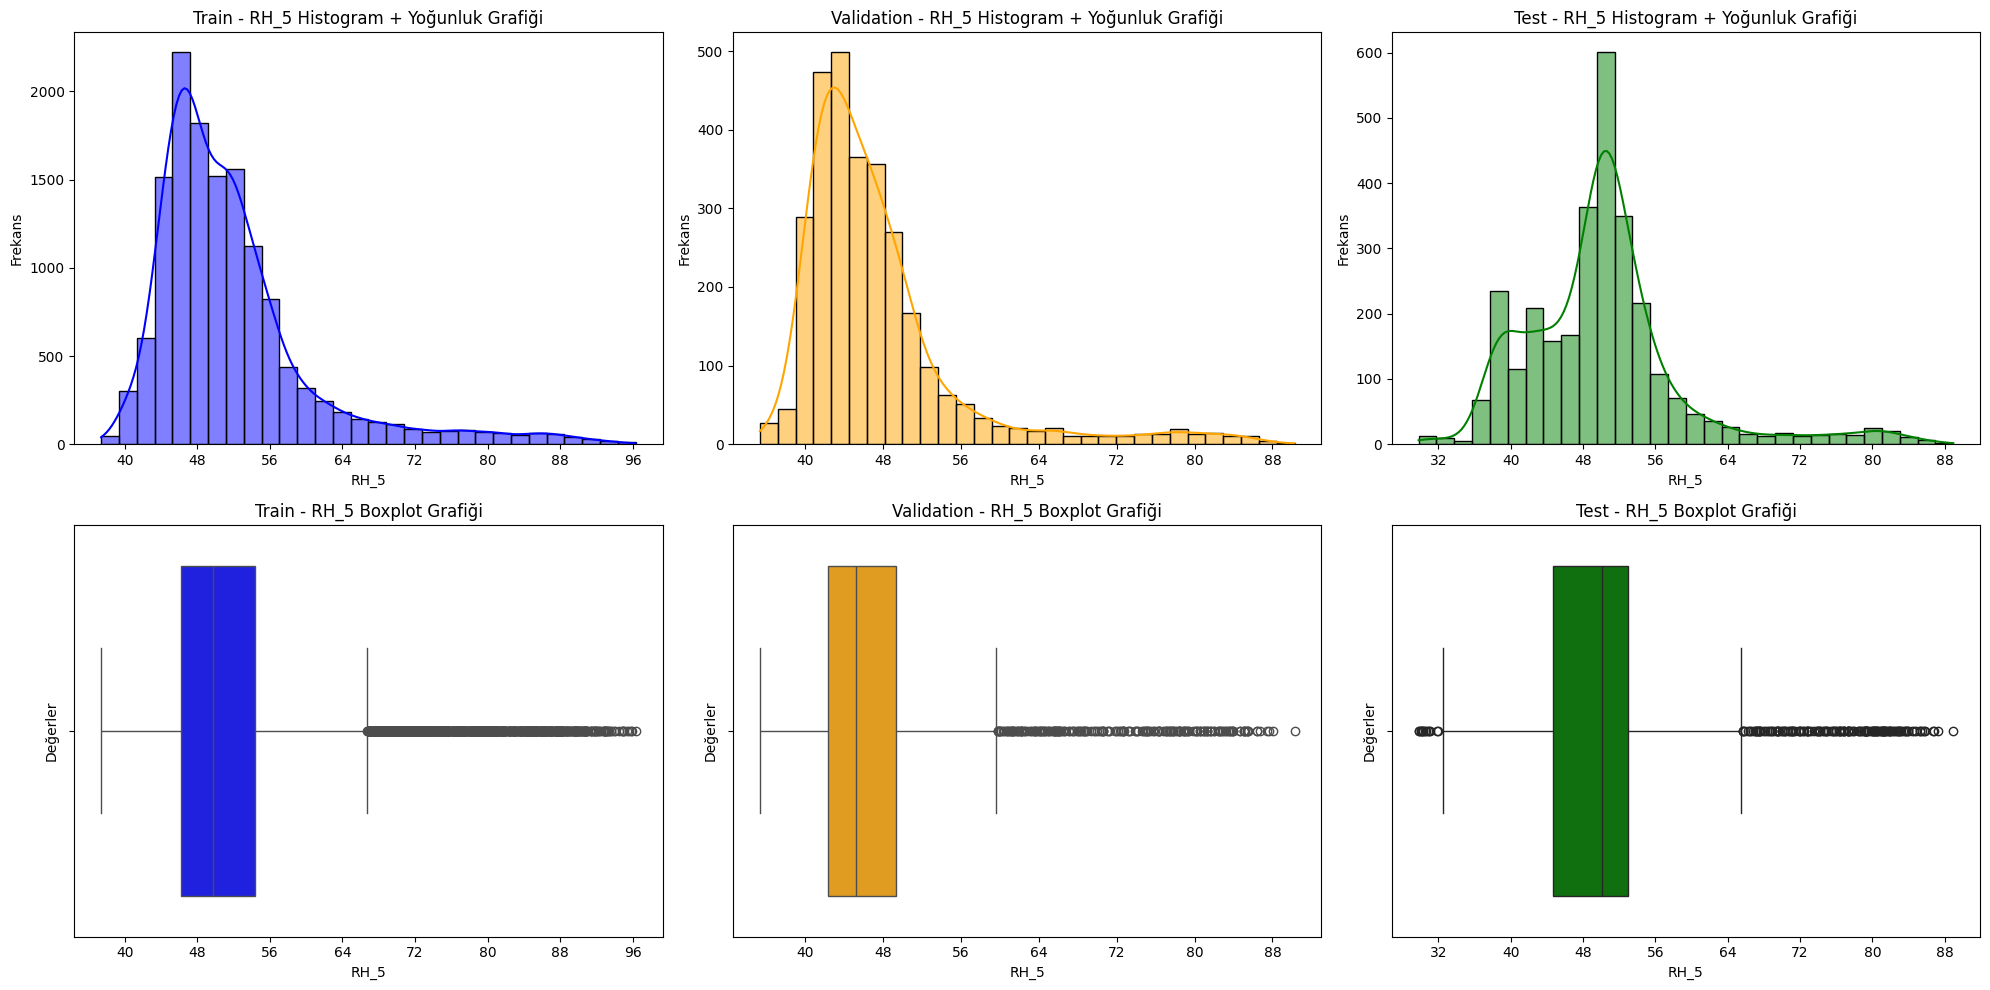

In [148]:
variable = "RH_5"
stats_table(datasets, labels, variable)
univariate_variable_analysis(variable)

RH_6 Değişkeni İstatistik Özeti                        
                                    Train  Validation        Test
Ortalama                        67.363204   26.841024   22.865765
Medyan                          73.575000   27.728333   20.080000
Std Sapma                       25.742773   20.655840   20.291838
Varyans                        662.690377  426.663730  411.758689
Minimum                          1.000000    1.000000    1.000000
Maksimum                        99.900000   60.466667   58.790000

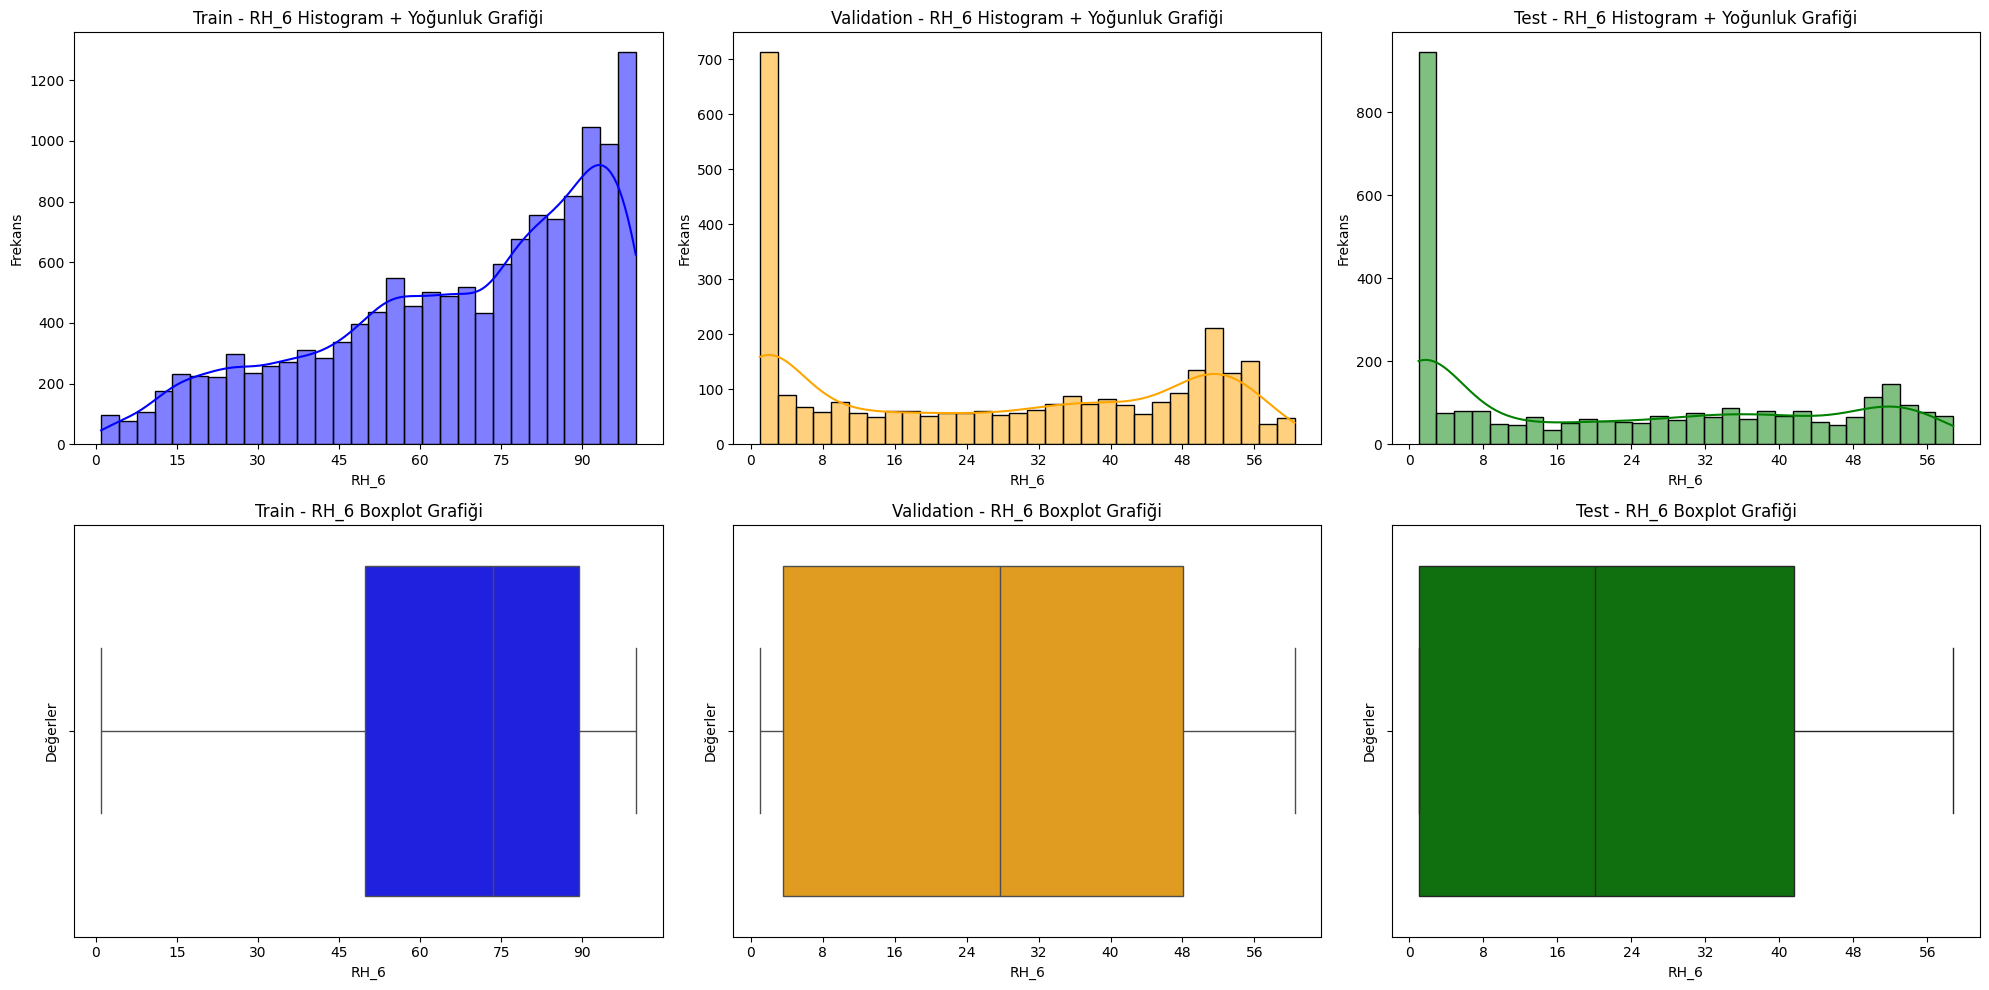

In [149]:
variable = "RH_6"
stats_table(datasets, labels, variable)
univariate_variable_analysis(variable)

RH_7 Değişkeni İstatistik Özeti                      
                                    Train Validation       Test
Ortalama                        35.609929  31.385668  38.354944
Medyan                          35.290000  31.290000  38.442857
Std Sapma                        5.047636   2.825659   4.737095
Varyans                         25.478632   7.984348  22.440066
Minimum                         23.200000  24.066667  26.700000
Maksimum                        51.400000  41.000000  48.290000

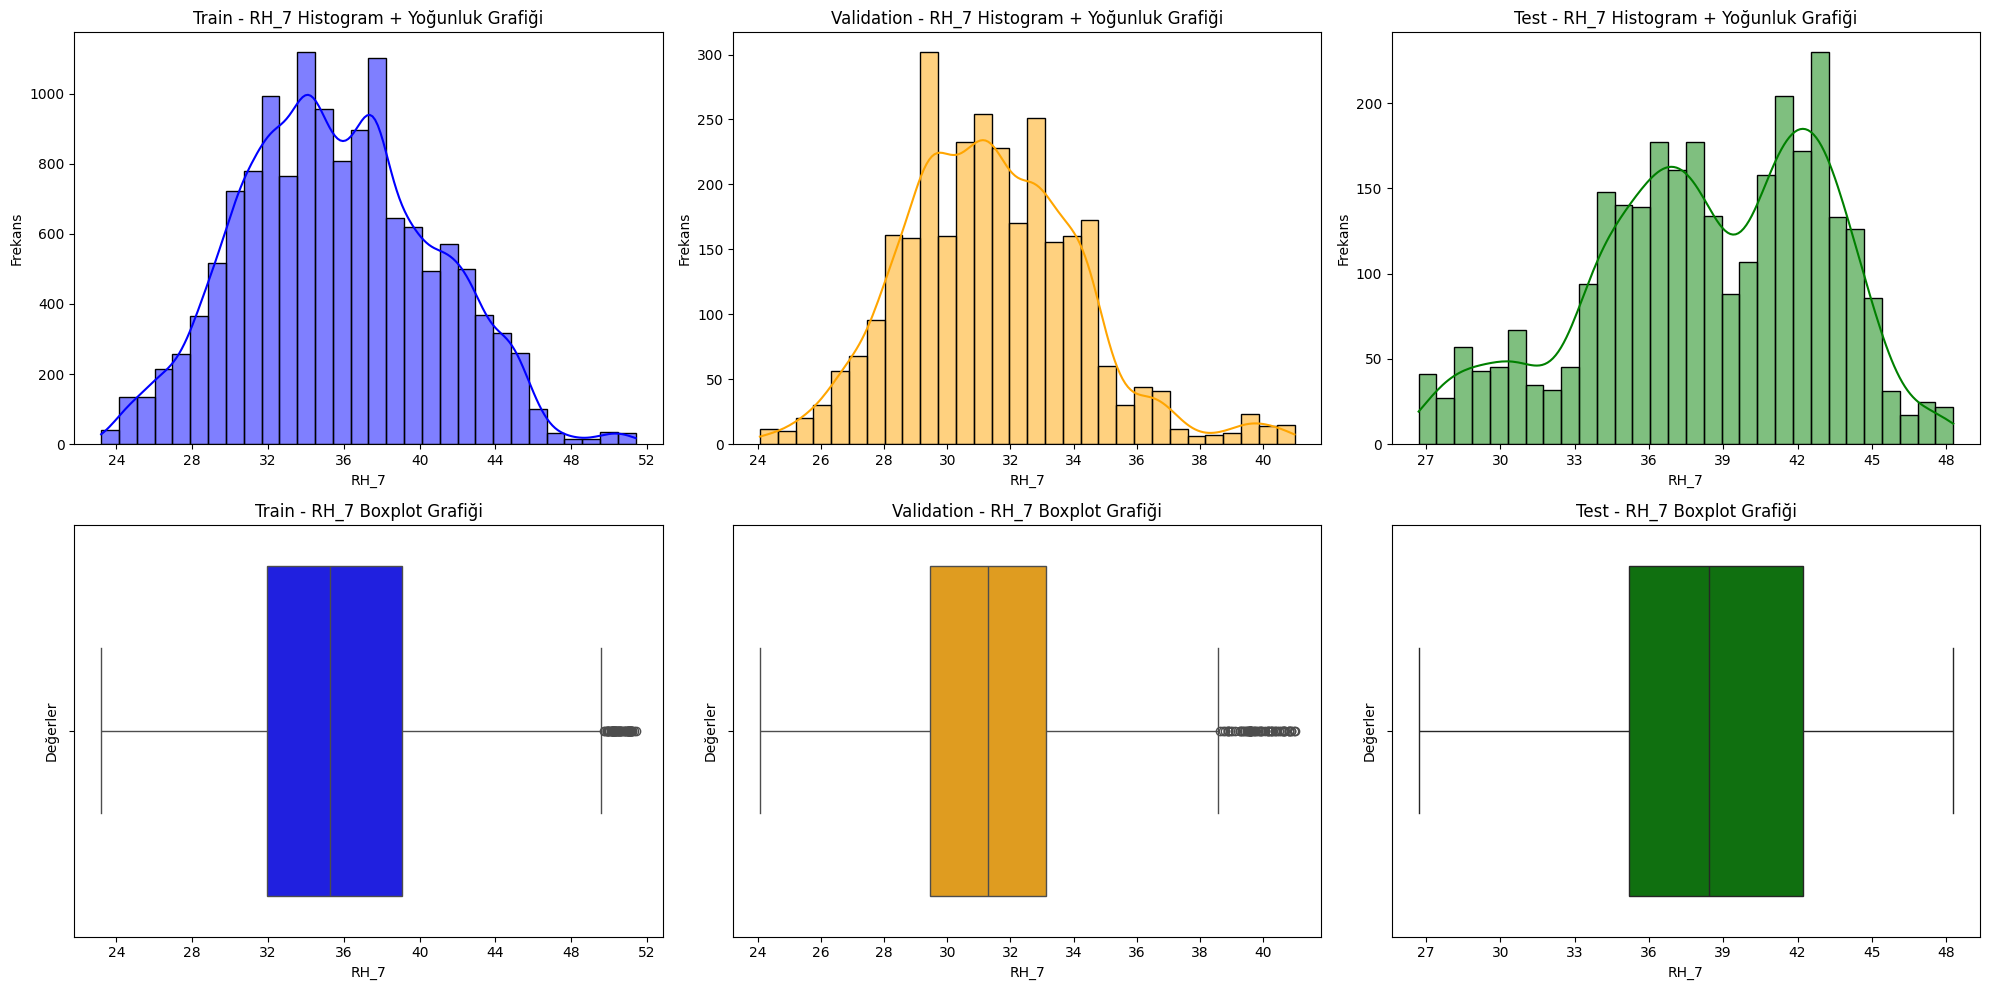

In [150]:
variable = "RH_7"
stats_table(datasets, labels, variable)
univariate_variable_analysis(variable)

RH_8 Değişkeni İstatistik Özeti                      
                                    Train Validation       Test
Ortalama                        43.313175  39.599459  44.512876
Medyan                          42.930000  39.290000  44.360000
Std Sapma                        5.313774   2.908521   5.240194
Varyans                         28.236191   8.459493  27.459636
Minimum                         29.600000  32.126667  31.326667
Maksimum                        58.780000  47.466667  55.000000

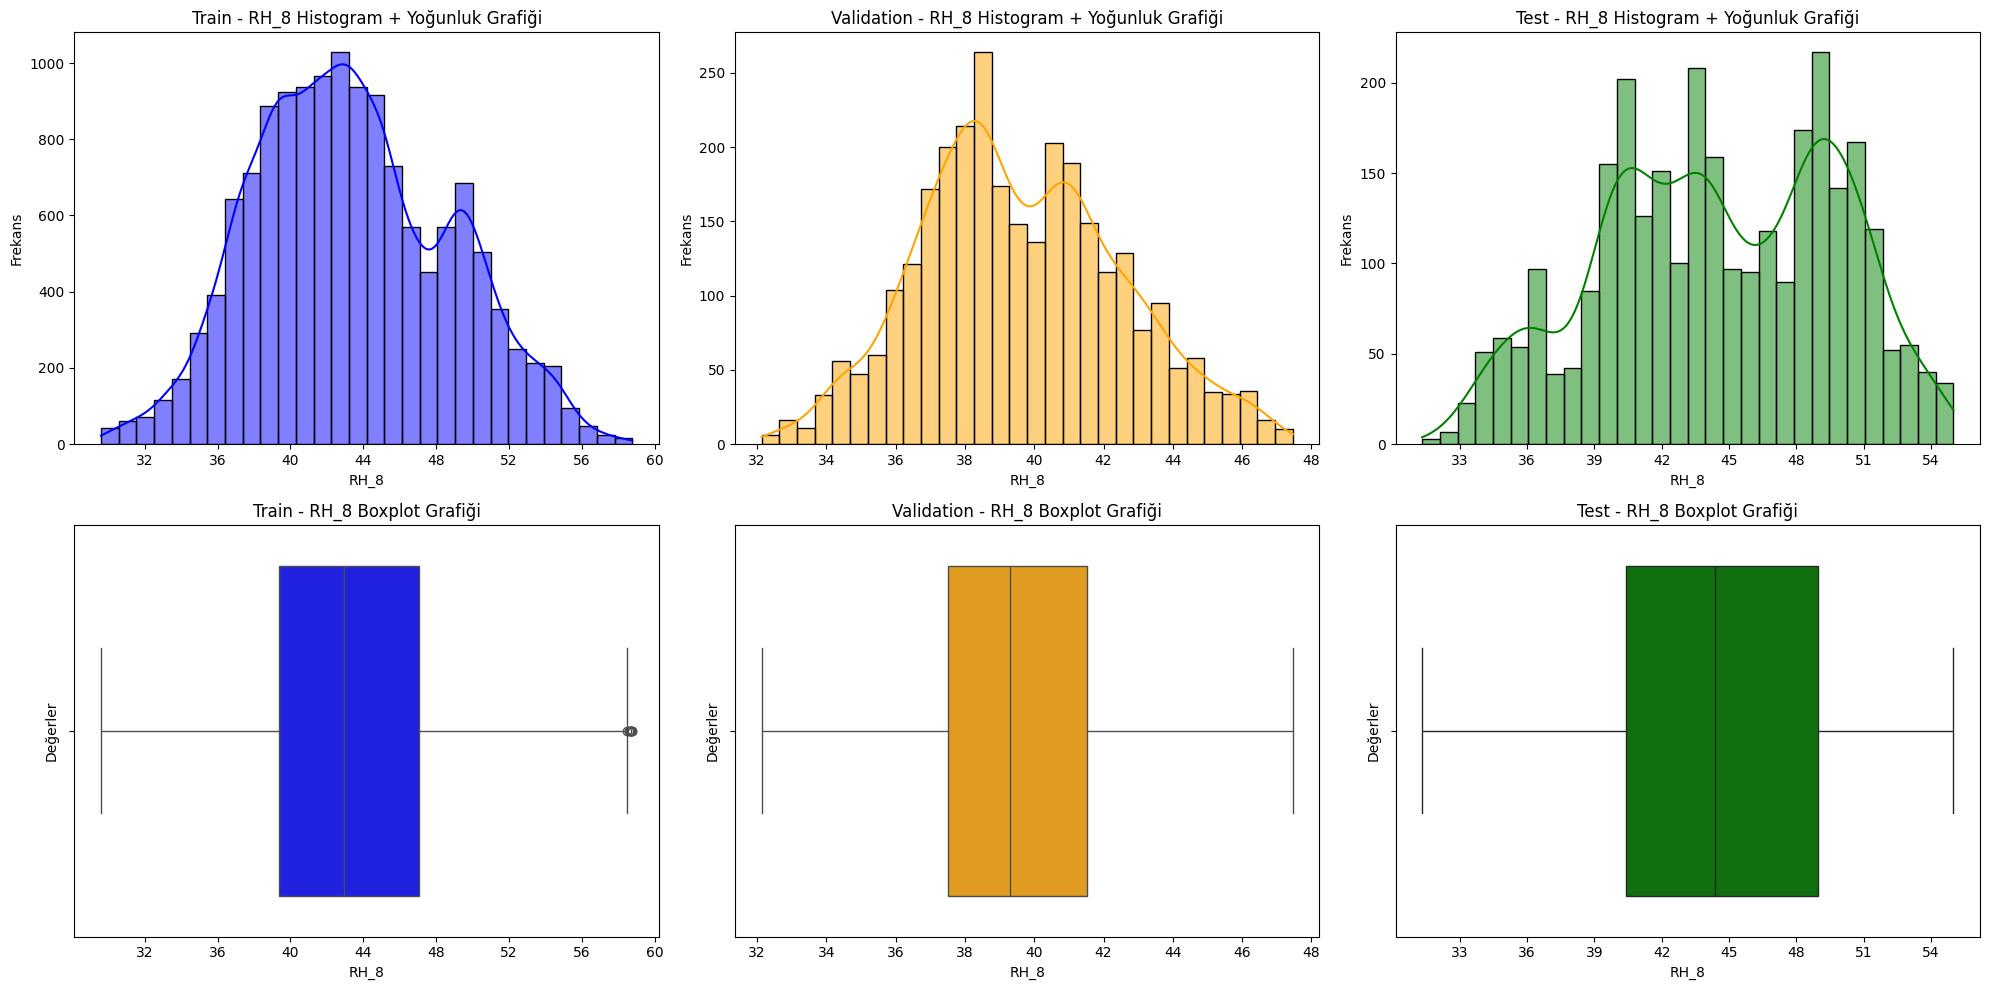

In [151]:
variable = "RH_8"
stats_table(datasets, labels, variable)
univariate_variable_analysis(variable)

RH_9 Değişkeni İstatistik Özeti                      
                                    Train Validation       Test
Ortalama                        41.955006  37.951196  43.274111
Medyan                          41.230000  38.133333  43.652000
Std Sapma                        3.928012   2.580127   4.422287
Varyans                         15.429279   6.657057  19.556620
Minimum                         32.730000  29.166667  29.850000
Maksimum                        53.326667  45.400000  51.536000

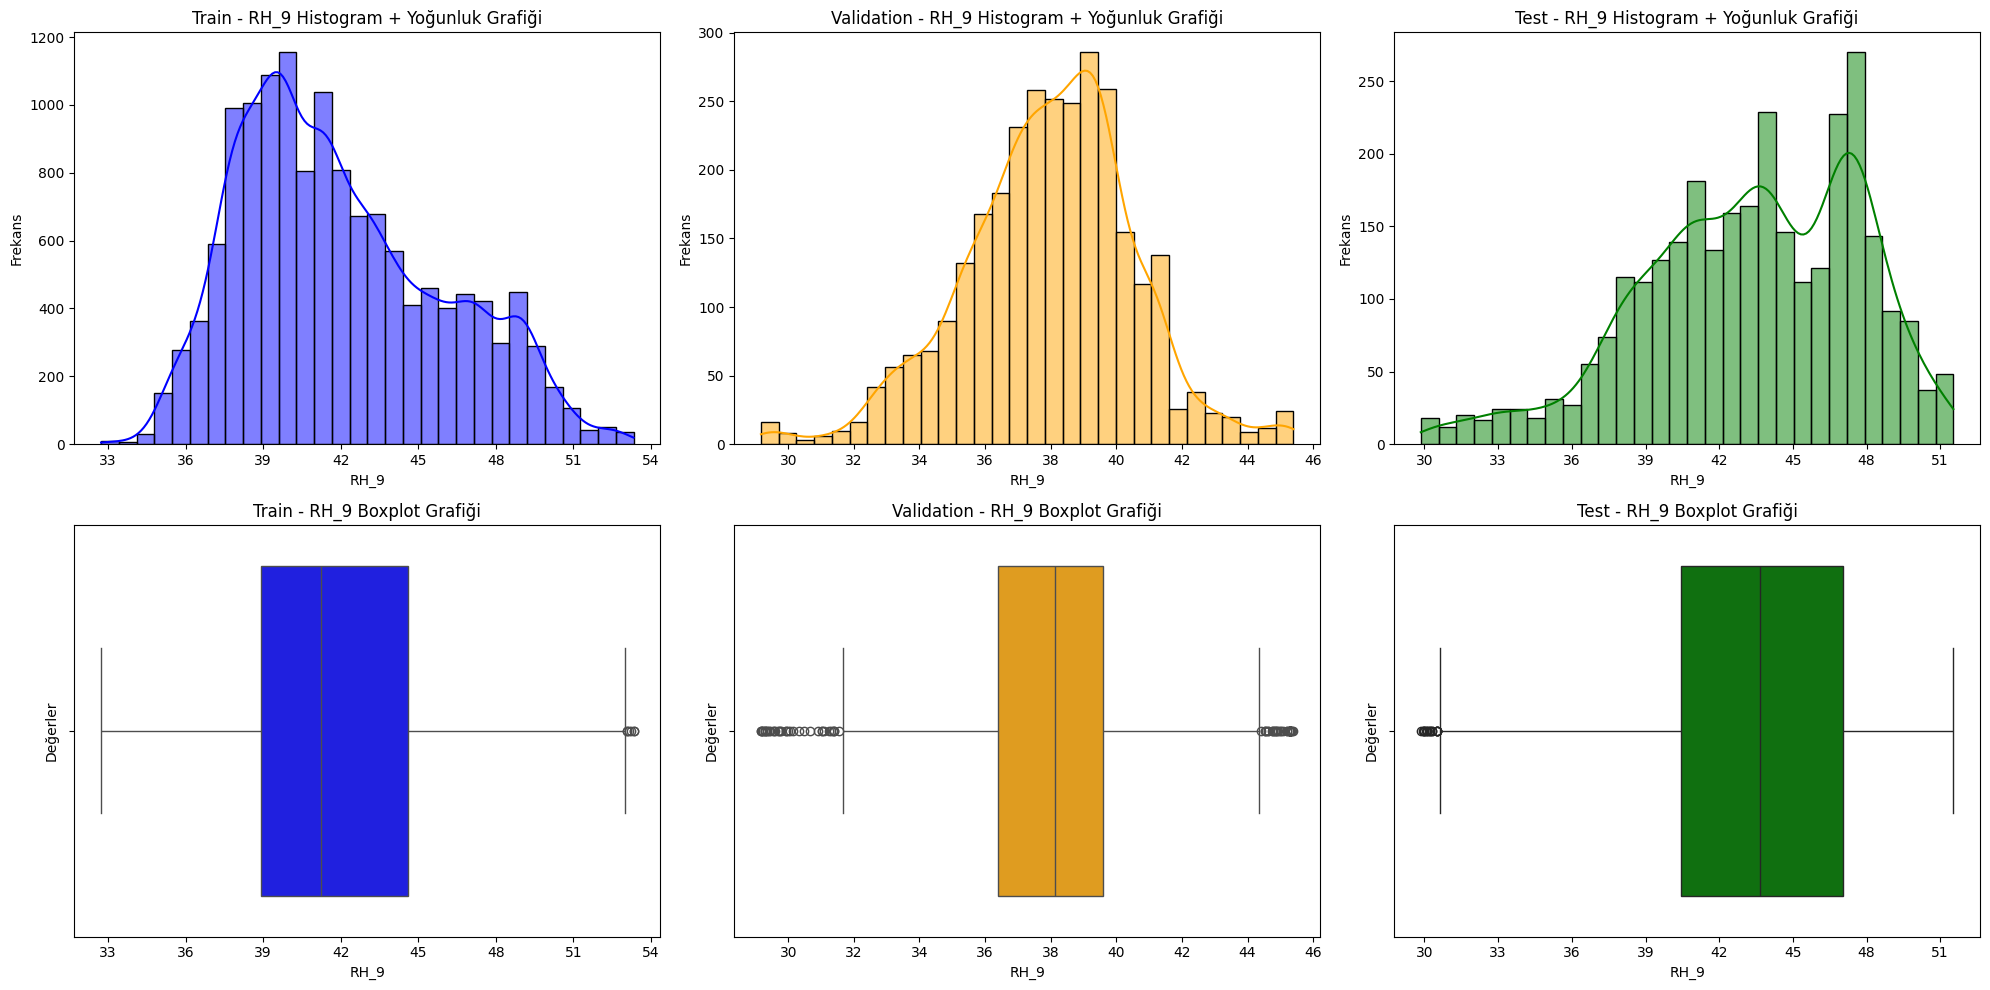

In [152]:
variable = "RH_9"
stats_table(datasets, labels, variable)
univariate_variable_analysis(variable)

RH_out Değişkeni İstatistik Özeti                        
                                      Train  Validation        Test
Ortalama                          82.581077   72.394764   73.897670
Medyan                            86.000000   75.333333   77.333333
Std Sapma                         12.322477   18.071813   17.874593
Varyans                          151.843433  326.590437  319.501082
Minimum                           44.000000   28.000000   24.000000
Maksimum                         100.000000   99.000000  100.000000

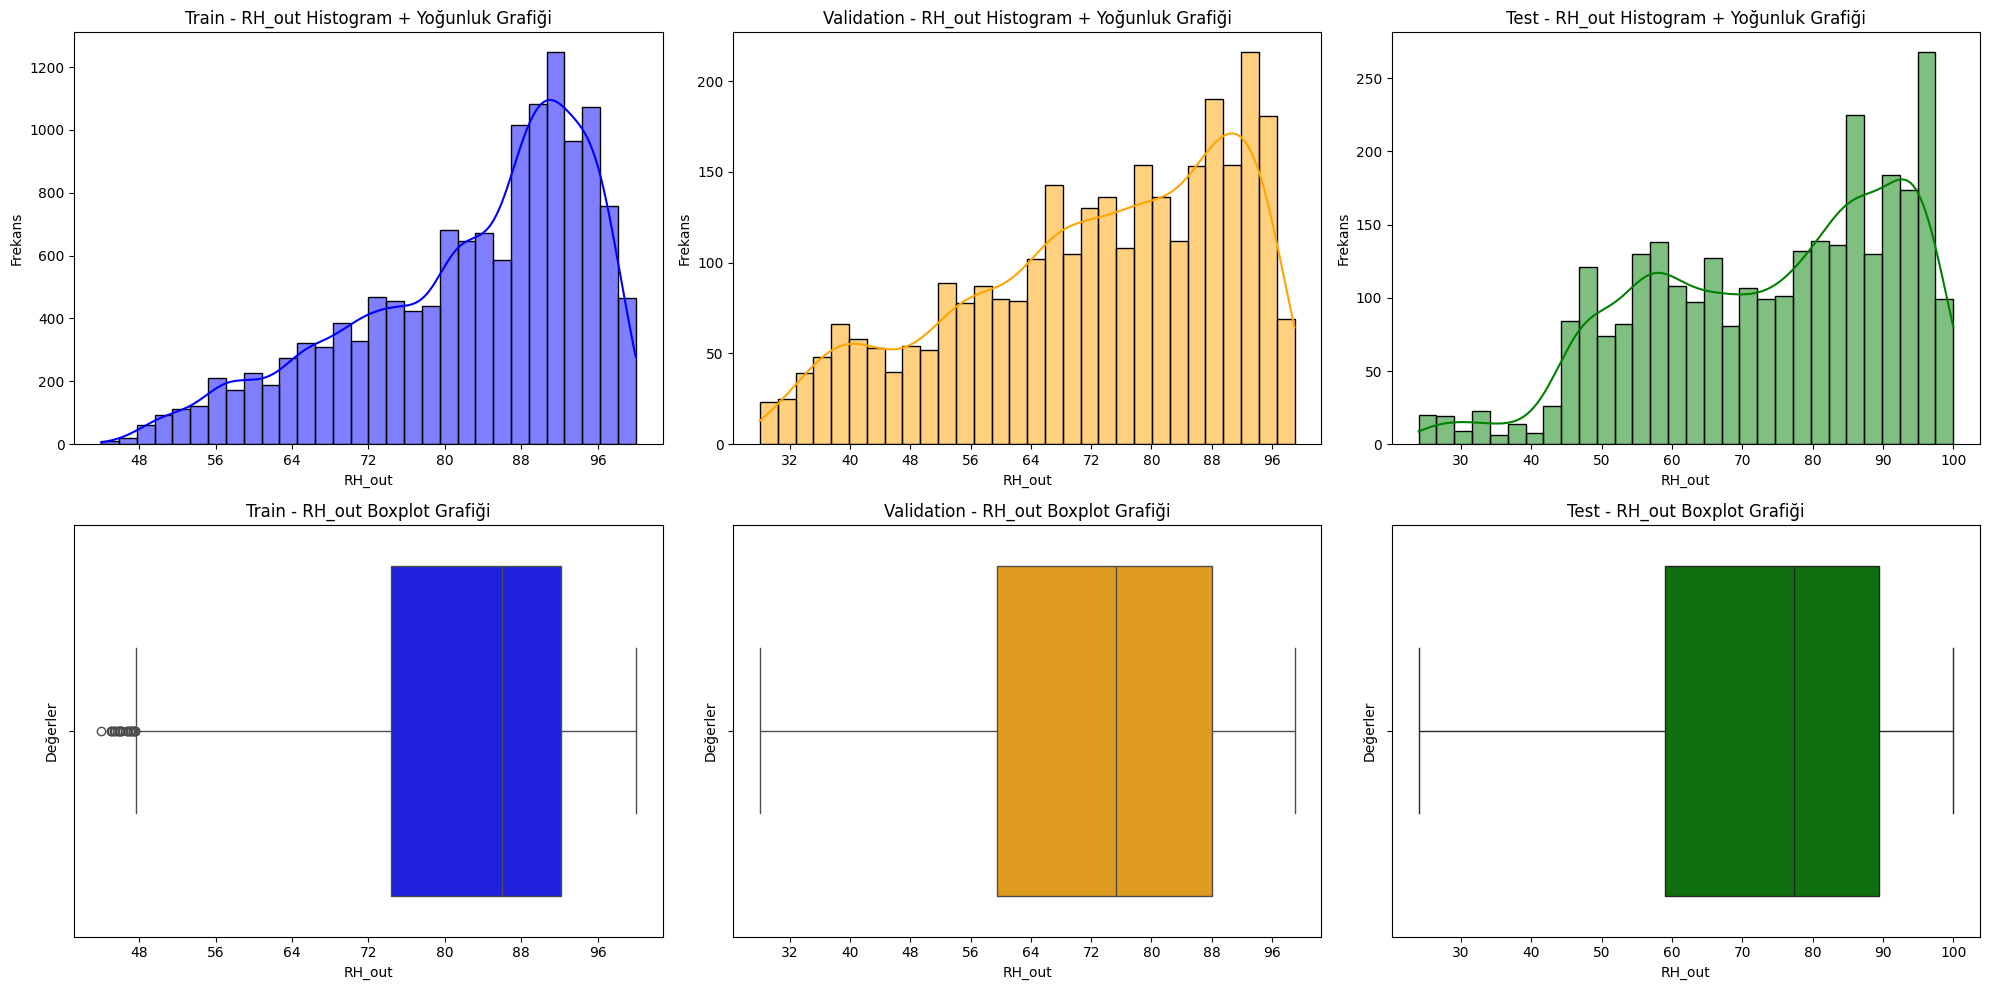

In [153]:
variable = "RH_out"
stats_table(datasets, labels, variable)
univariate_variable_analysis(variable)

#### Hava Durumu ve Ortam Koşulları Değişkenleri

lights Değişkeni İstatistik Özeti                      
                                      Train Validation       Test
Ortalama                           4.551904   2.121622   1.982438
Medyan                             0.000000   0.000000   0.000000
Std Sapma                          8.616680   5.480501   5.883529
Varyans                           74.247179  30.035896  34.615908
Minimum                            0.000000   0.000000   0.000000
Maksimum                          70.000000  30.000000  30.000000

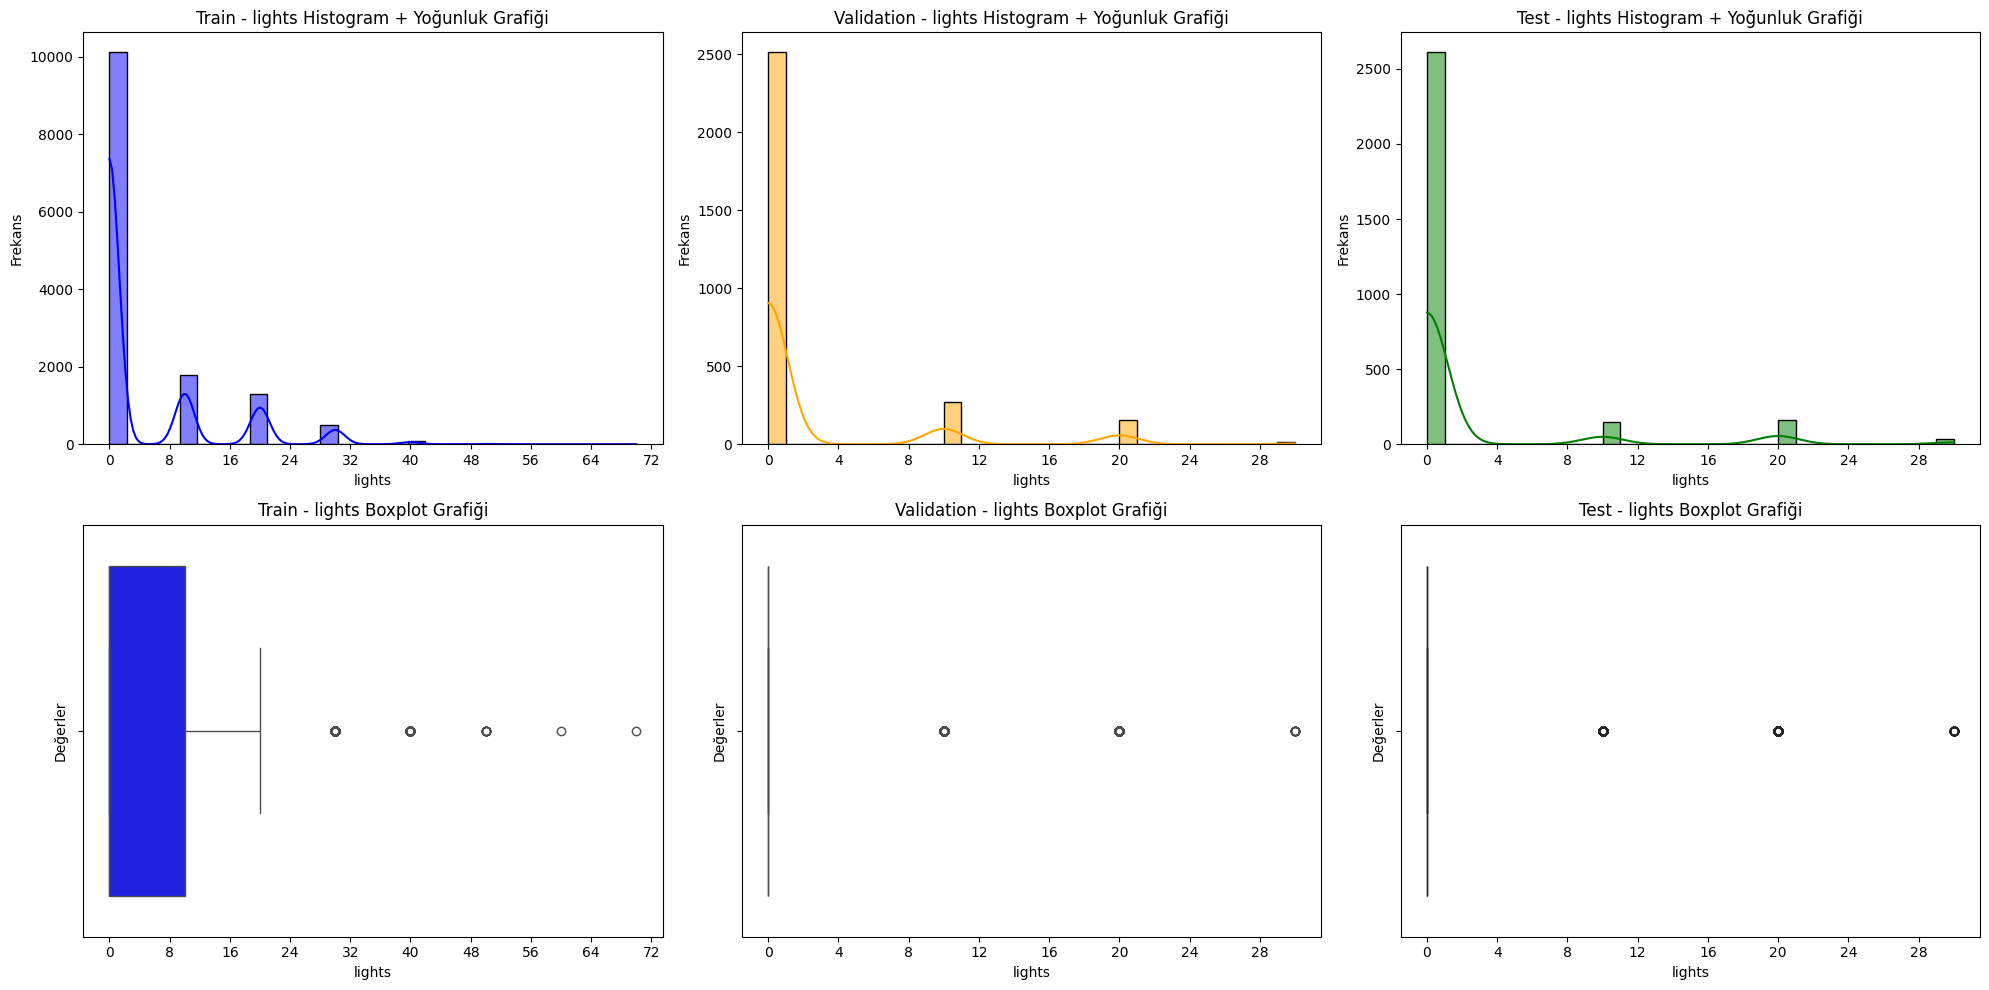

In [154]:
variable = "lights"
stats_table(datasets, labels, variable)
univariate_variable_analysis(variable)

Press_mm_hg Değişkeni İstatistik Özeti                        
                                           Train  Validation        Test
Ortalama                              755.119577  758.818773  754.107785
Medyan                                755.500000  758.800000  754.833333
Std Sapma                               8.029338    5.405954    4.618464
Varyans                                64.470265   29.224334   21.330211
Minimum                               729.300000  747.500000  744.100000
Maksimum                              772.300000  768.200000  762.100000

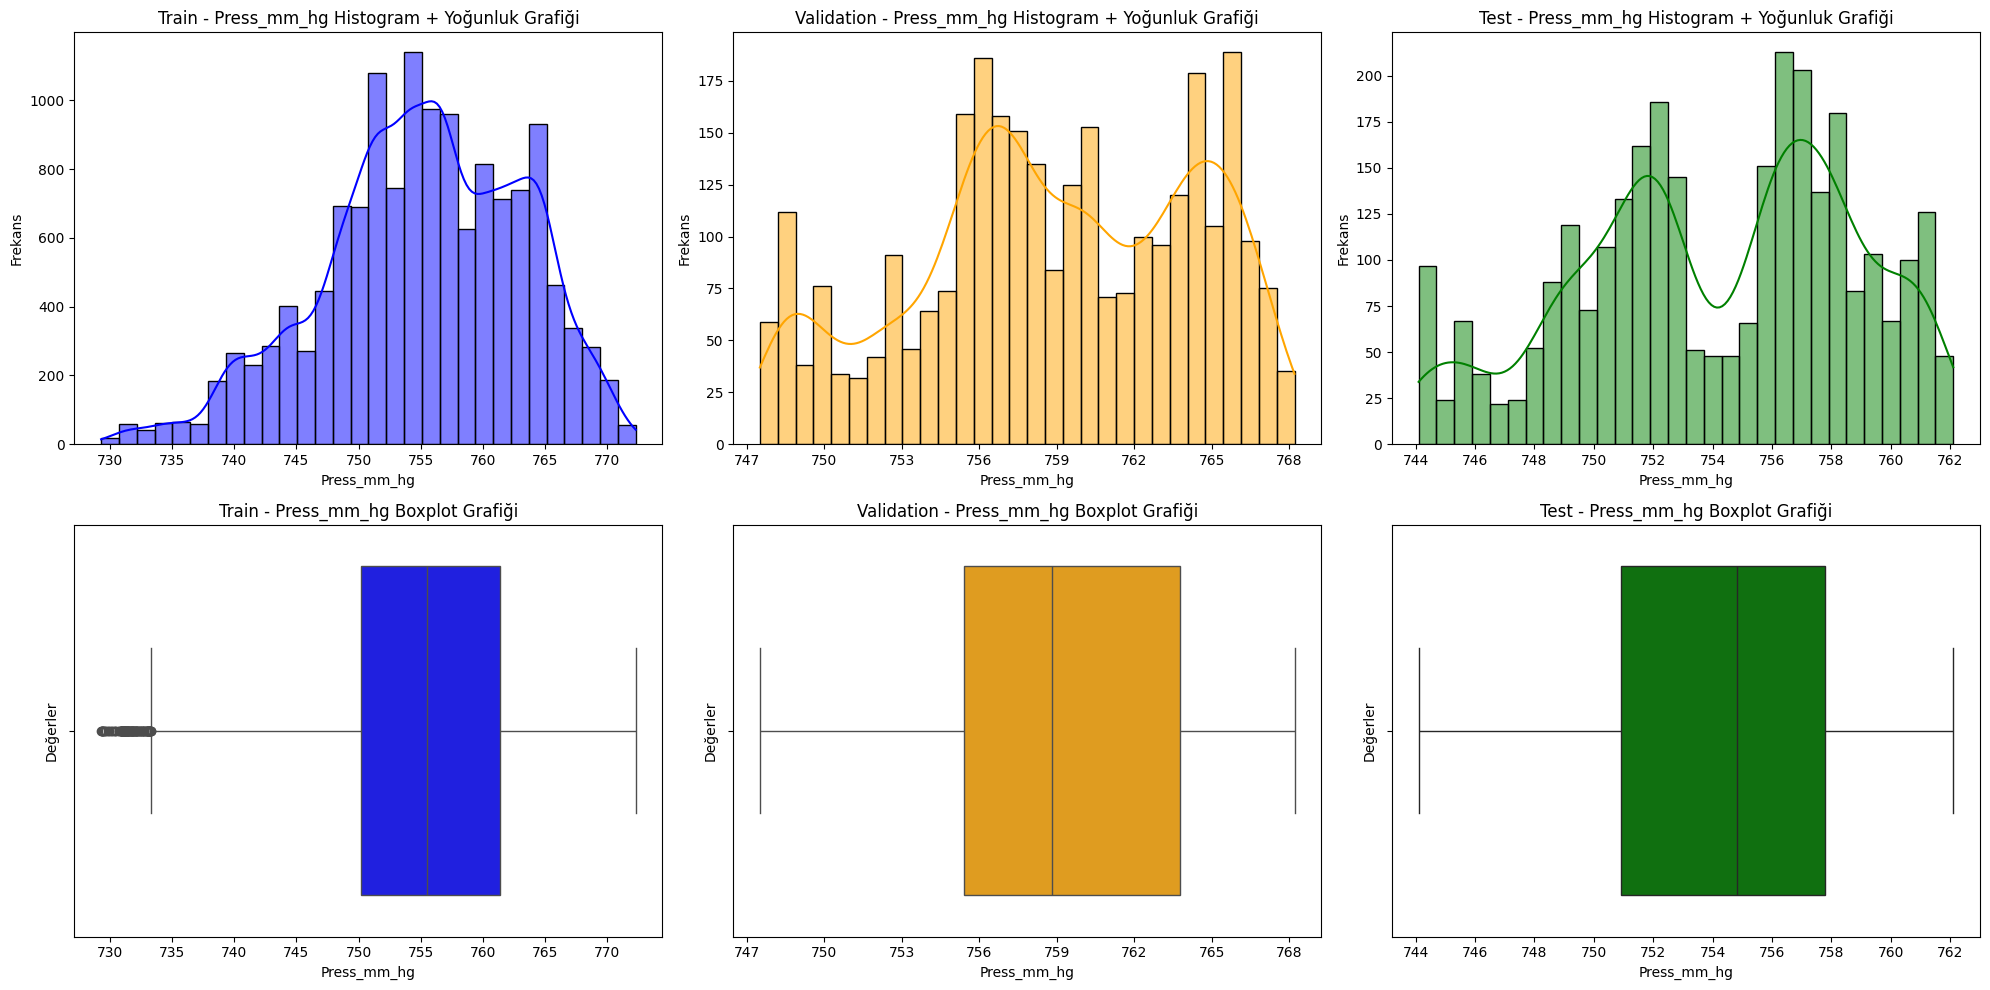

In [155]:
variable = "Press_mm_hg"
stats_table(datasets, labels, variable)
univariate_variable_analysis(variable)

Windspeed Değişkeni İstatistik Özeti                      
                                         Train Validation       Test
Ortalama                              4.358236   3.485586   3.107903
Medyan                                4.000000   3.333333   3.000000
Std Sapma                             2.646731   1.637992   1.742590
Varyans                               7.005183   2.683017   3.036619
Minimum                               0.000000   1.000000   0.000000
Maksimum                             14.000000   9.000000  10.000000

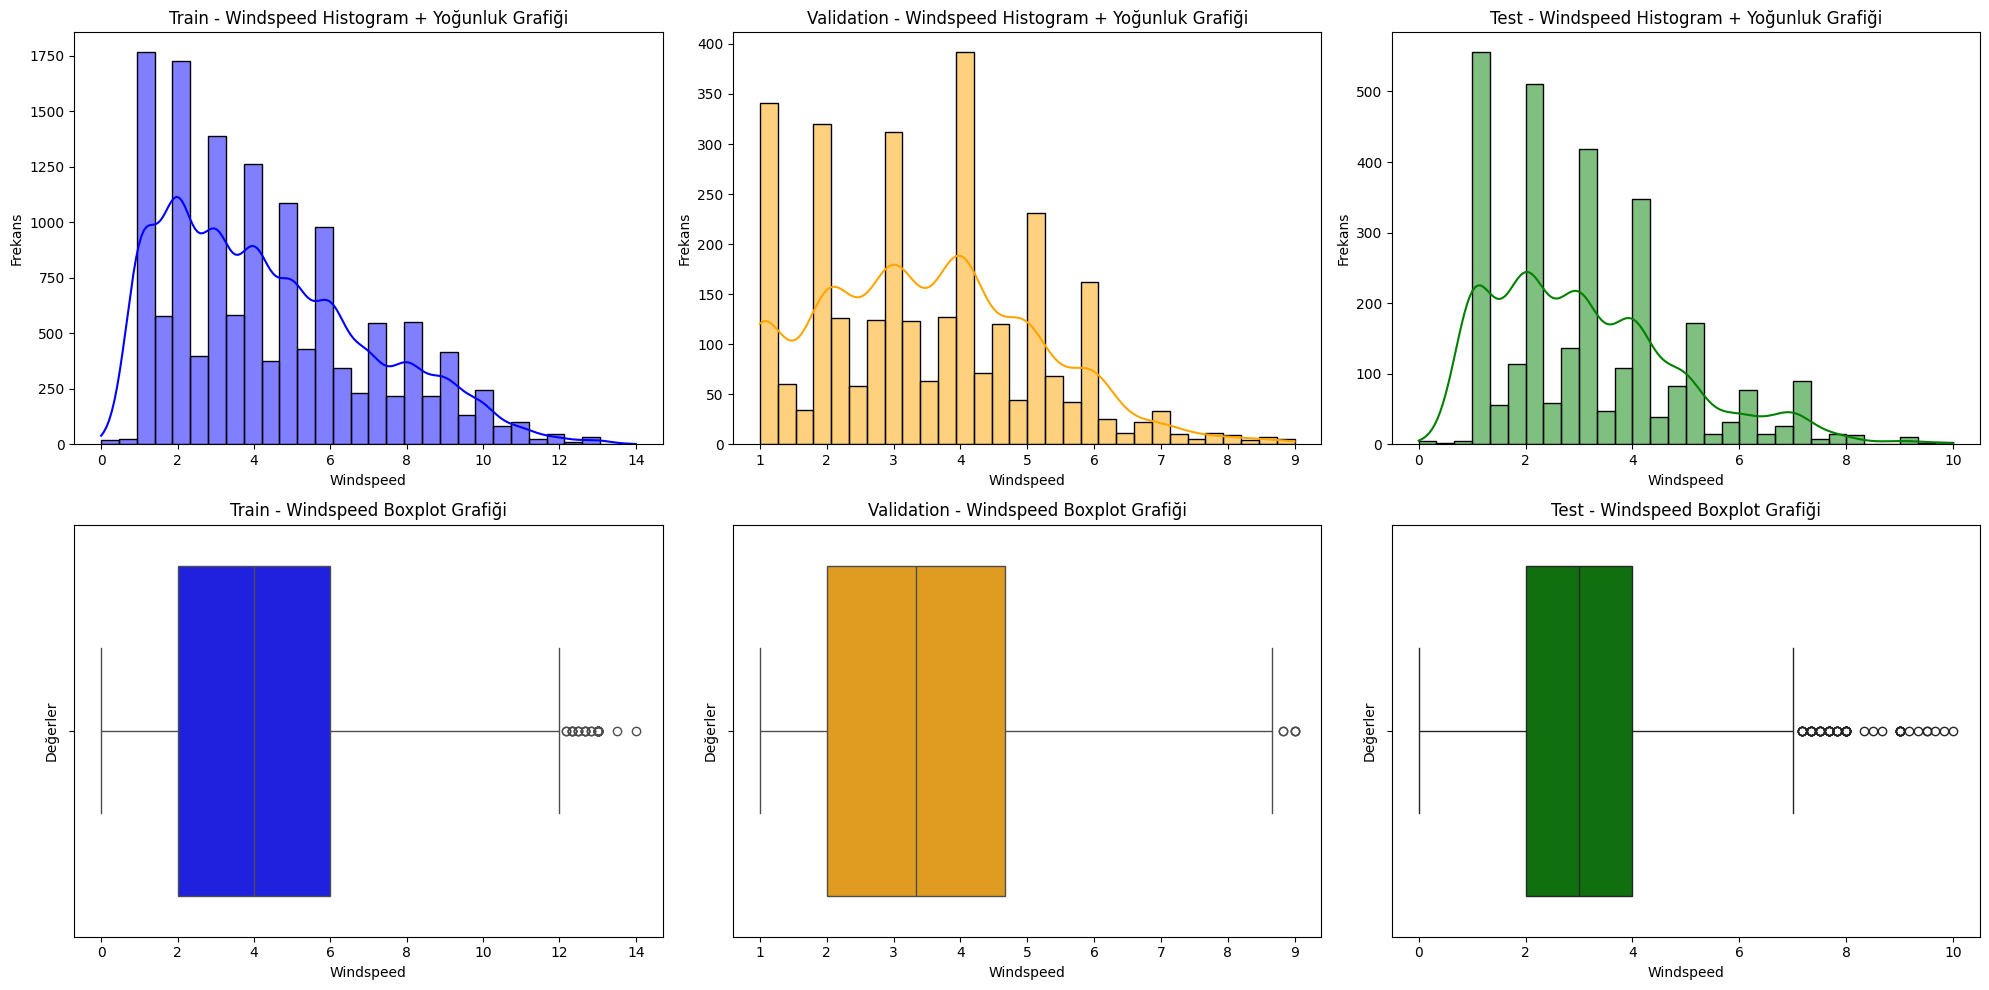

In [156]:
variable = "Windspeed"
stats_table(datasets, labels, variable)
univariate_variable_analysis(variable)

Visibility Değişkeni İstatistik Özeti                      
                                          Train Validation       Test
Ortalama                              38.892657  37.530856  36.509456
Medyan                                40.000000  40.000000  40.000000
Std Sapma                             12.922950   7.107136   9.602838
Varyans                              167.002643  50.511388  92.214500
Minimum                                1.000000  20.000000   1.000000
Maksimum                              66.000000  65.000000  65.000000

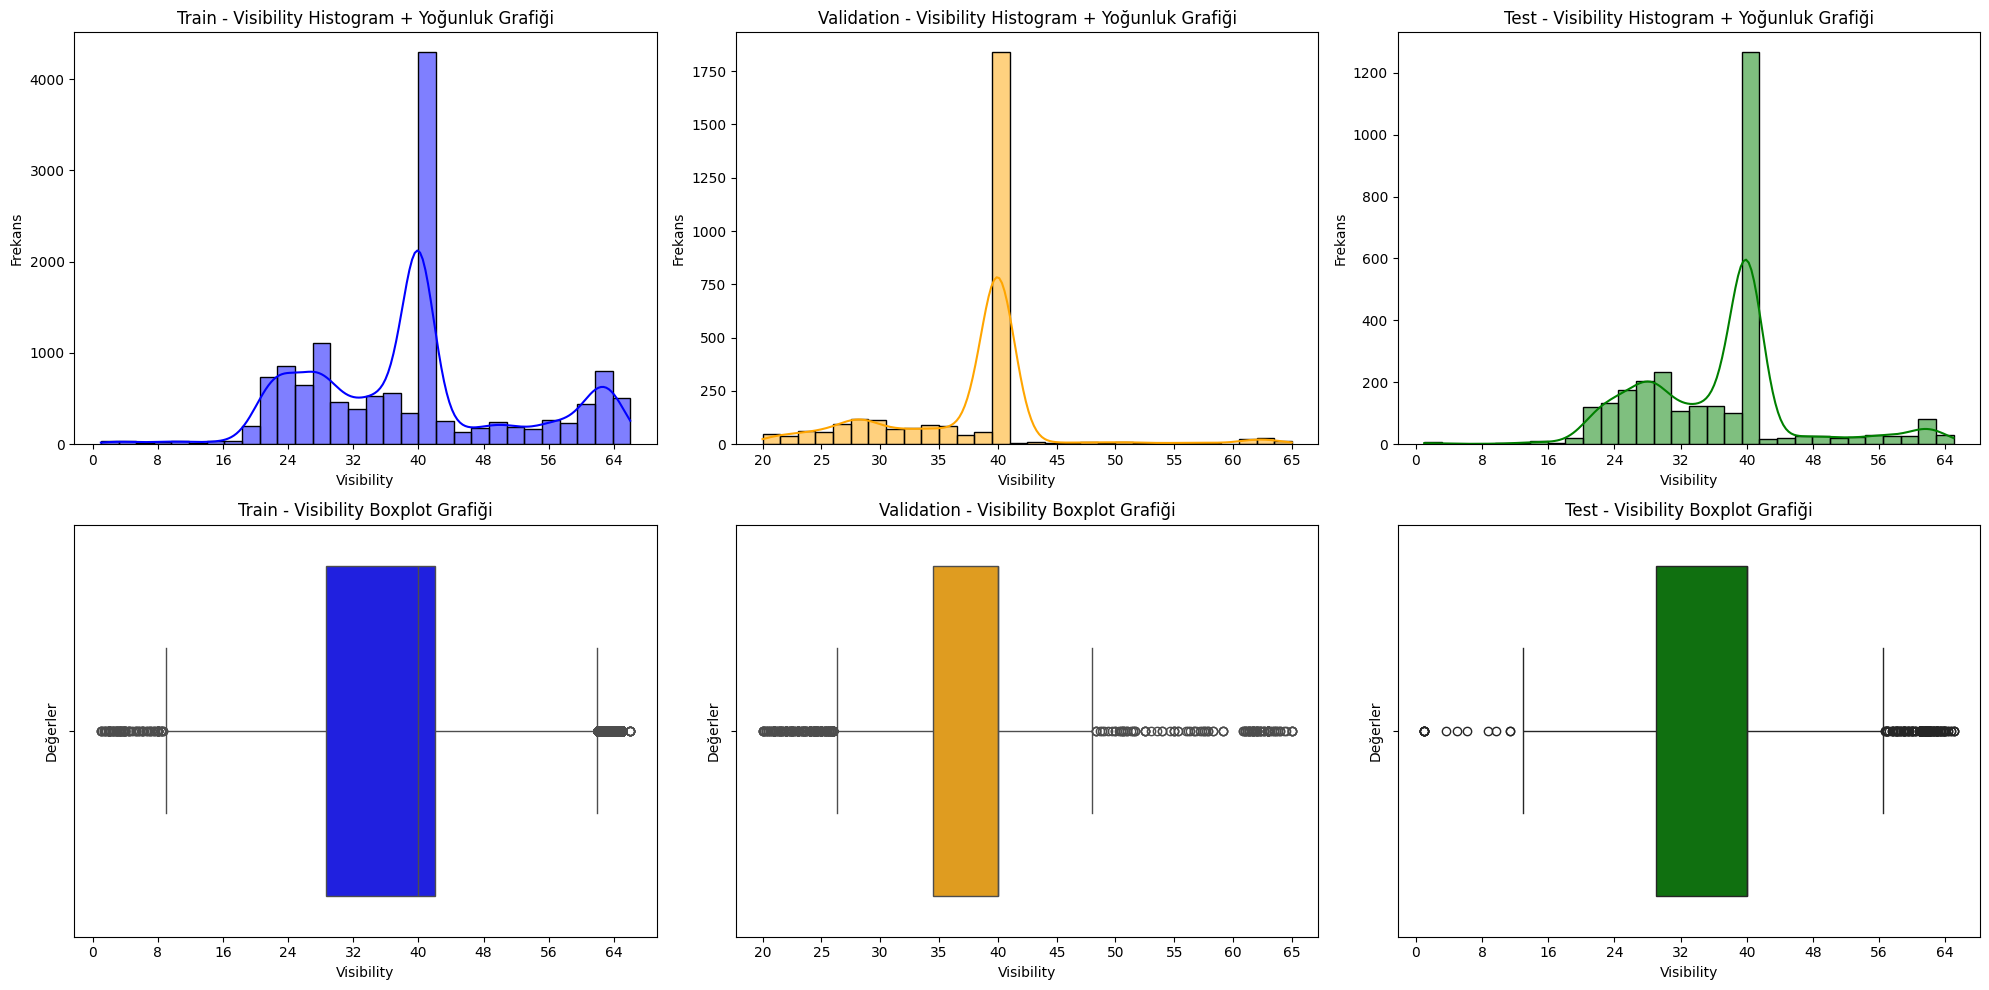

In [157]:
variable = "Visibility"
stats_table(datasets, labels, variable)
univariate_variable_analysis(variable)

#### Diğer Değişkenler

rv1 Değişkeni İstatistik Özeti                        
                                   Train  Validation        Test
Ortalama                       24.997152   24.881764   25.051727
Medyan                         24.858659   24.855067   25.311644
Std Sapma                      14.542283   14.393211   14.390259
Varyans                       211.477983  207.164530  207.079565
Minimum                         0.005322    0.013989    0.013539
Maksimum                       49.996530   49.981674   49.981667

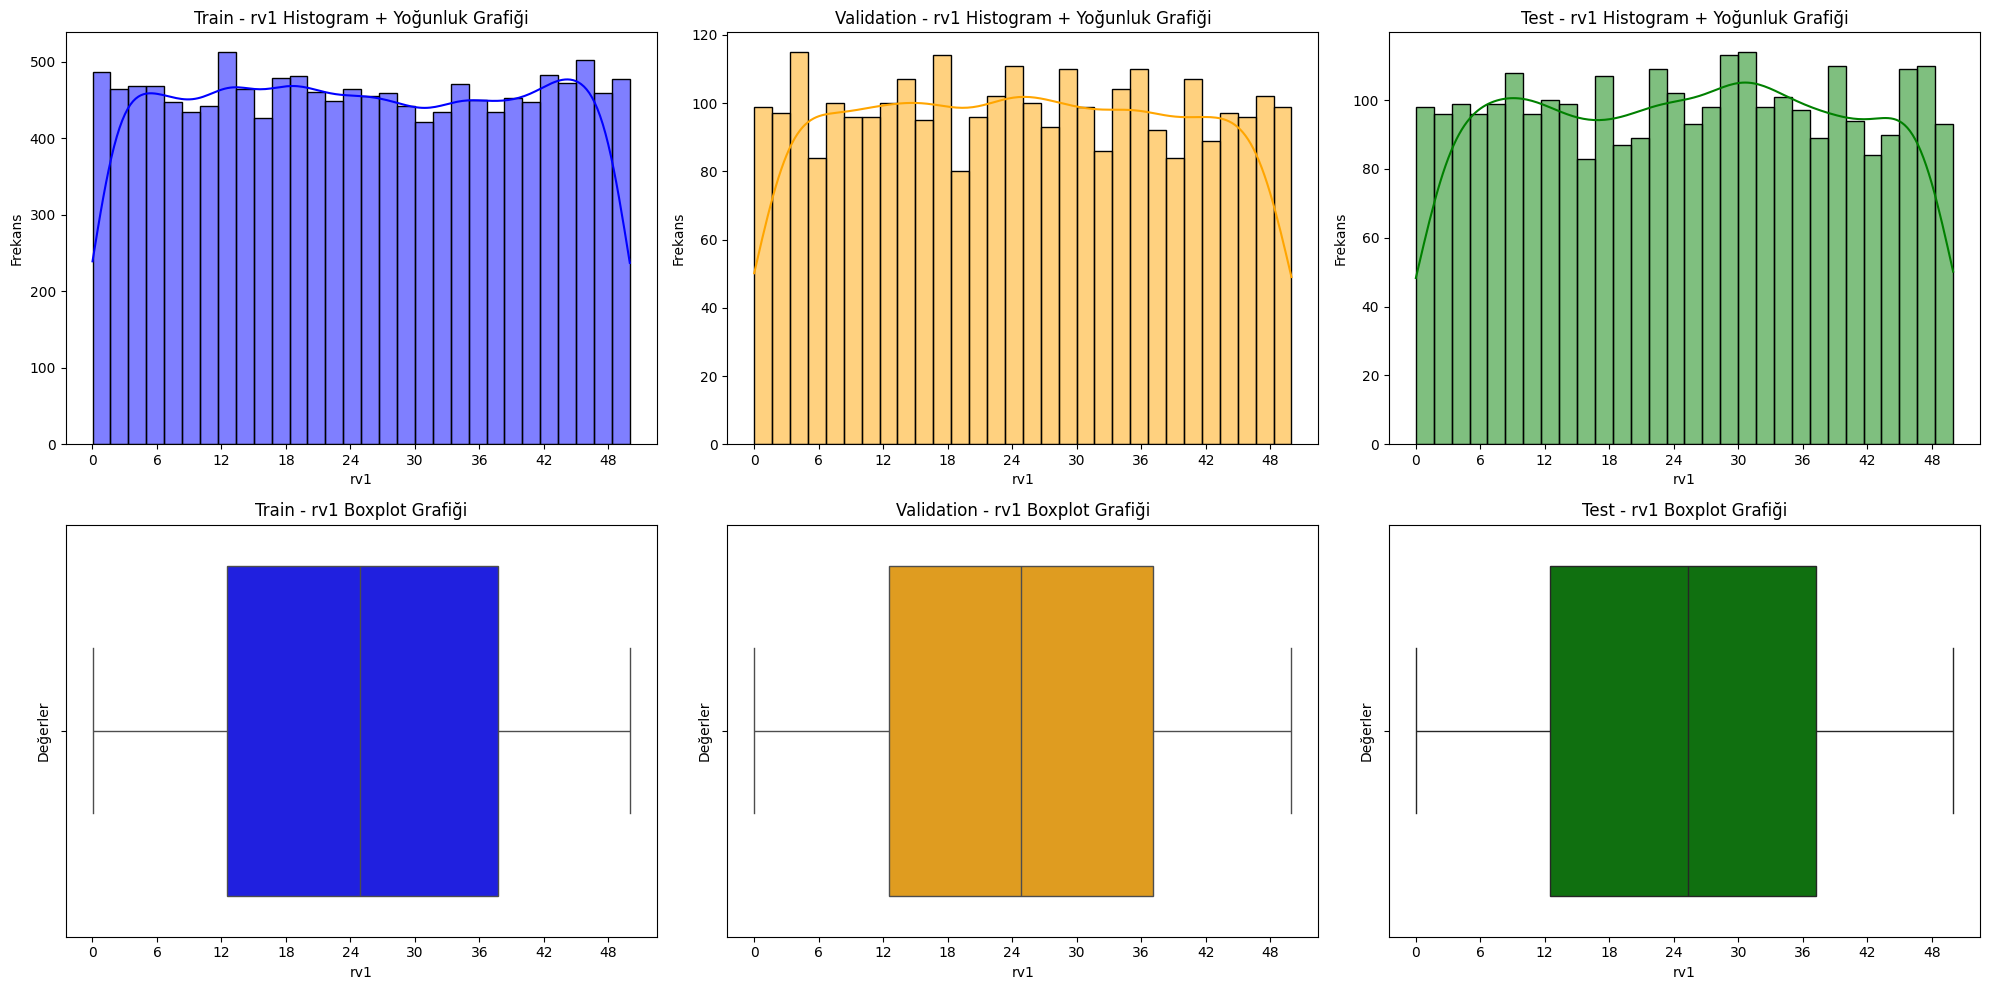

In [158]:
variable = "rv1"
stats_table(datasets, labels, variable)
univariate_variable_analysis(variable)

rv2 Değişkeni İstatistik Özeti                        
                                   Train  Validation        Test
Ortalama                       24.997152   24.881764   25.051727
Medyan                         24.858659   24.855067   25.311644
Std Sapma                      14.542283   14.393211   14.390259
Varyans                       211.477983  207.164530  207.079565
Minimum                         0.005322    0.013989    0.013539
Maksimum                       49.996530   49.981674   49.981667

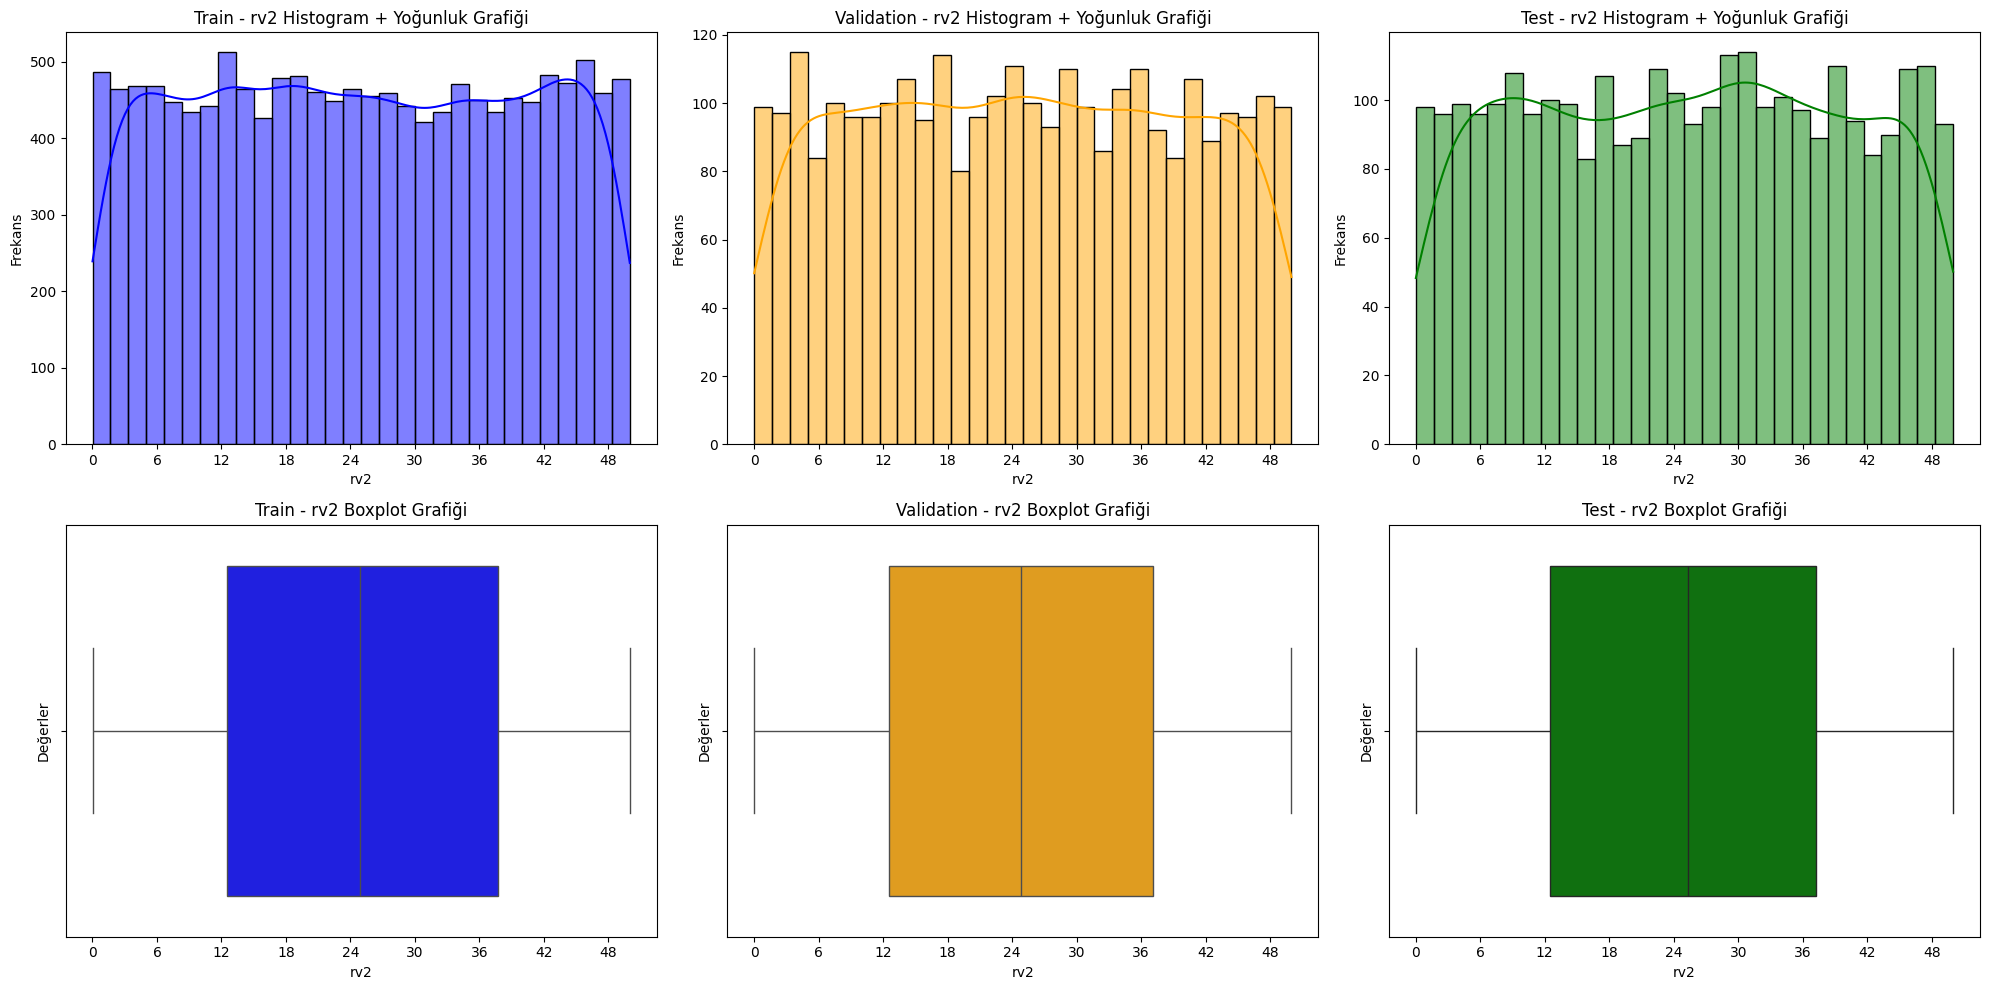

In [159]:
variable = "rv2"
stats_table(datasets, labels, variable)
univariate_variable_analysis(variable)

#### Hedef Değişken

Appliances Değişkeni İstatistik Özeti                          
                                          Train   Validation         Test
Ortalama                              98.775156    93.422297    96.926714
Medyan                                60.000000    60.000000    60.000000
Std Sapma                            106.857292    92.254684    90.888693
Varyans                            11418.480825  8510.926708  8260.754425
Minimum                               10.000000    20.000000    20.000000
Maksimum                            1080.000000   870.000000   850.000000

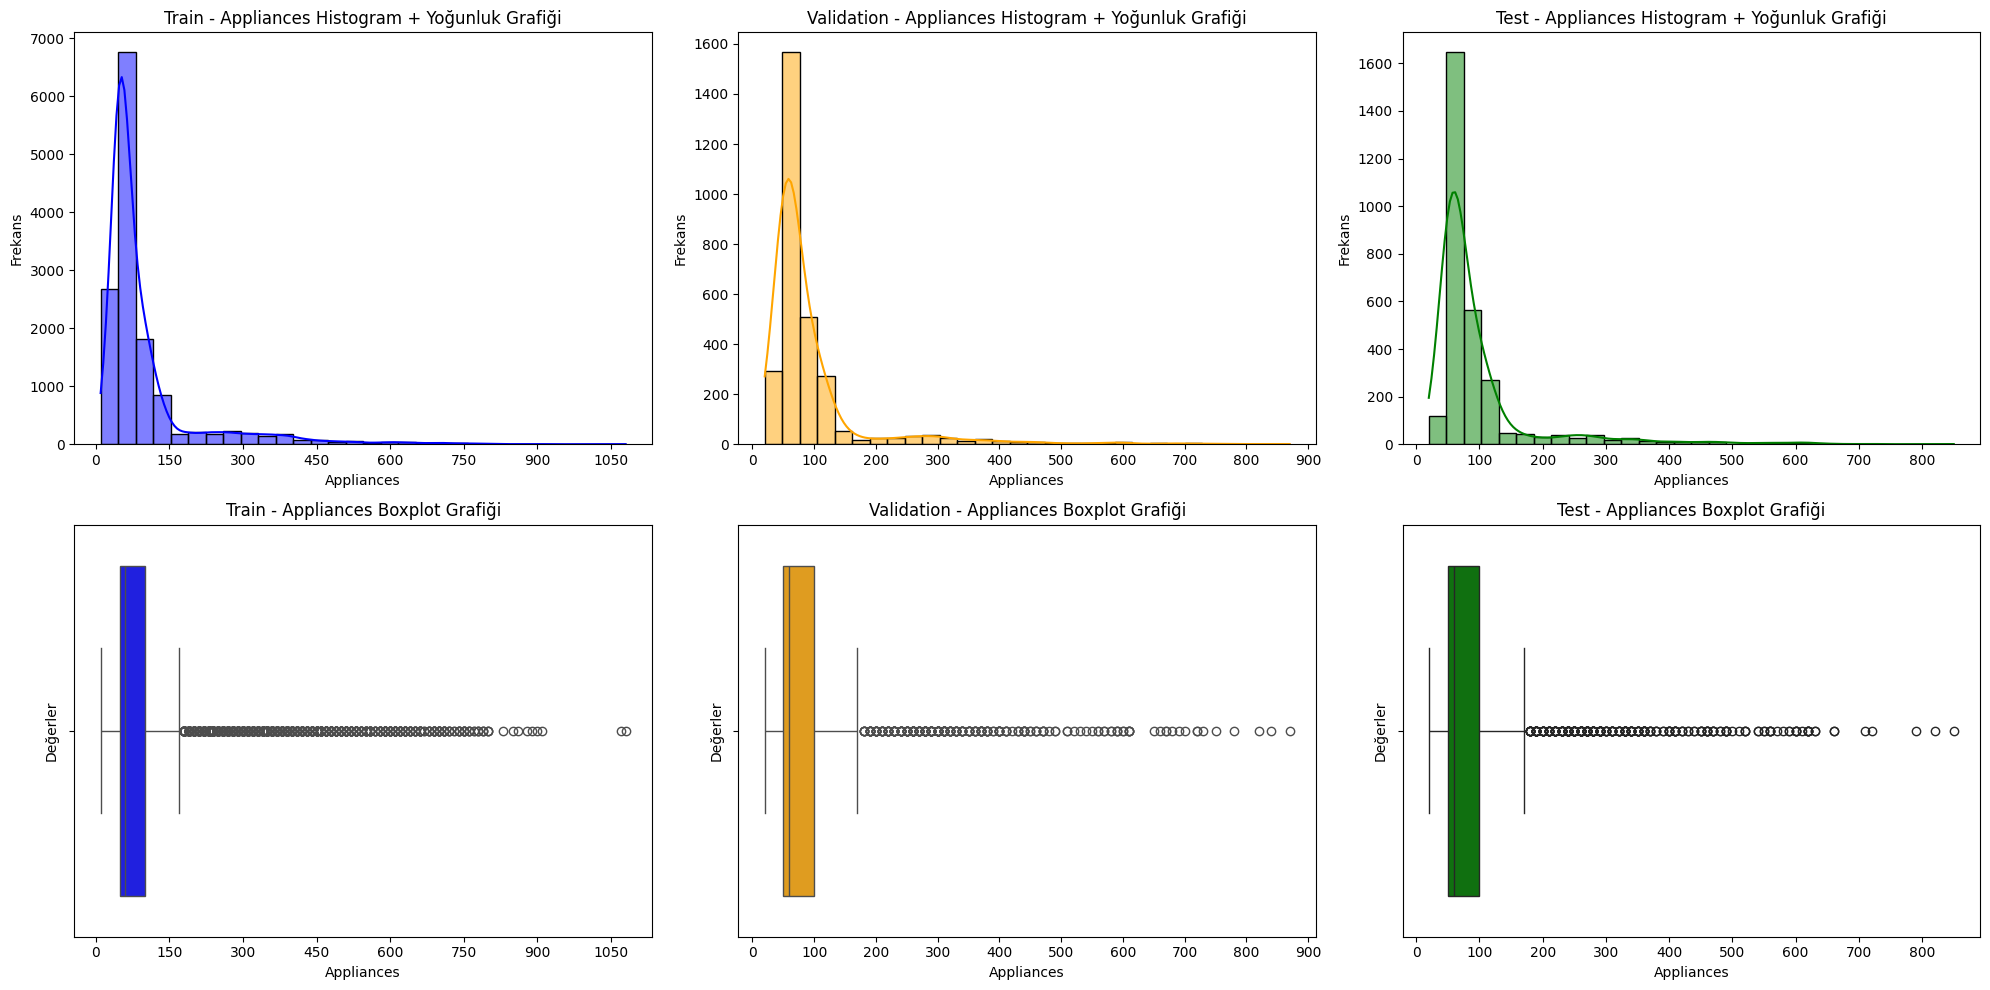

In [160]:
variable = "Appliances"
stats_table(datasets, labels, variable)
univariate_variable_analysis(variable)